## Importing nessesary libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
import random
import math

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [5]:
root_dir = "archive(8)/train"
test_dir = "archive(8)/test"

In [6]:
train2 = os.listdir("archive(8)/train")

In [7]:
test = os.listdir("archive(8)/test")
test

['Acne and Rosacea Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis Photos',
 'Bullous Disease Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Herpes HPV and other STDs Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Seborrheic Keratoses and other Benign Tumors',
 'Systemic Disease',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Urticaria Hives',
 'Vascular Tumors',
 'Vasculitis Photos',
 'Warts Molluscum and other Viral Infections']

In [8]:
train2

['Acne and Rosacea Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis Photos',
 'Bullous Disease Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Herpes HPV and other STDs Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Seborrheic Keratoses and other Benign Tumors',
 'Systemic Disease',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Urticaria Hives',
 'Vascular Tumors',
 'Vasculitis Photos',
 'Warts Molluscum and other Viral Infections']

In [9]:
# About the training part of the dataset extracted, gives an insight of how many images each
# class/folder holds
for dirpath, dirnames, filenames in os.walk('archive(8)'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'archive(8)'.
There are 23 directories and 0 images in 'archive(8)\test'.
There are 0 directories and 312 images in 'archive(8)\test\Acne and Rosacea Photos'.
There are 0 directories and 288 images in 'archive(8)\test\Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions'.
There are 0 directories and 123 images in 'archive(8)\test\Atopic Dermatitis Photos'.
There are 0 directories and 113 images in 'archive(8)\test\Bullous Disease Photos'.
There are 0 directories and 73 images in 'archive(8)\test\Cellulitis Impetigo and other Bacterial Infections'.
There are 0 directories and 309 images in 'archive(8)\test\Eczema Photos'.
There are 0 directories and 101 images in 'archive(8)\test\Exanthems and Drug Eruptions'.
There are 0 directories and 60 images in 'archive(8)\test\Hair Loss Photos Alopecia and other Hair Diseases'.
There are 0 directories and 102 images in 'archive(8)\test\Herpes HPV and other STDs Photos'.
There are 0 directories

## Performing Data Cleaning

In [10]:
# Creating a Dataframe which contains images path and label/class attached to it
# Initialize empty lists to store image paths and labels
image_paths = []
labels = []

# Iterate through each class/category folder
for class_folder in os.listdir(root_dir):
    class_path = os.path.join(root_dir, class_folder)
    if os.path.isdir(class_path):  # Ensure it's a directory
        # Iterate through each image in the class folder
        for image_file in os.listdir(class_path):
            # Construct the path to the image file
            image_path = os.path.join(class_path, image_file)
            # Append the image path to the list
            image_paths.append(image_path)
            # Append the corresponding label to the list
            labels.append(class_folder)

# Create a DataFrame from the lists of image paths and labels
df = pd.DataFrame({'image_path': image_paths, 'label': labels})



In [11]:
# Creating a Dataframe which contains images path and label/class attached to it
# Initialize empty lists to store image paths and labels
image_paths = []
labels = []

# Iterate through each class/category folder
for class_folder in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_folder)
    if os.path.isdir(class_path):  # Ensure it's a directory
        # Iterate through each image in the class folder
        for image_file in os.listdir(class_path):
            # Construct the path to the image file
            image_path = os.path.join(class_path, image_file)
            # Append the image path to the list
            image_paths.append(image_path)
            # Append the corresponding label to the list
            labels.append(class_folder)

# Create a DataFrame from the lists of image paths and labels
df_test = pd.DataFrame({'image_path': image_paths, 'label': labels})



In [12]:
print(df_test.head())

                                          image_path                    label
0  archive(8)/test\Acne and Rosacea Photos\07Peri...  Acne and Rosacea Photos
1  archive(8)/test\Acne and Rosacea Photos\07Rhin...  Acne and Rosacea Photos
2  archive(8)/test\Acne and Rosacea Photos\07rhno...  Acne and Rosacea Photos
3  archive(8)/test\Acne and Rosacea Photos\07Rosa...  Acne and Rosacea Photos
4  archive(8)/test\Acne and Rosacea Photos\07Rosa...  Acne and Rosacea Photos


In [13]:
# Display the first few rows of the DataFrame
print(df.head())

                                          image_path                    label
0  archive(8)/train\Acne and Rosacea Photos\07Acn...  Acne and Rosacea Photos
1  archive(8)/train\Acne and Rosacea Photos\07Acn...  Acne and Rosacea Photos
2  archive(8)/train\Acne and Rosacea Photos\07Acn...  Acne and Rosacea Photos
3  archive(8)/train\Acne and Rosacea Photos\07Per...  Acne and Rosacea Photos
4  archive(8)/train\Acne and Rosacea Photos\07Per...  Acne and Rosacea Photos


In [14]:
# Getting the shape of the dataframe formed
df.shape
# Gives insight of how many images are there in the dataset

(15557, 2)

In [15]:
# Removing duplicates, if any
df.drop_duplicates(subset=['image_path'], inplace=True)

In [16]:
df.shape
# Thus getting there are no duplicate images in the dataset

(15557, 2)

In [17]:
# Standardizing file formats (assuming we're converting all images to JPEG)
for index, row in df.iterrows():
    image_path = row['image_path']
    image = Image.open(image_path)
    if image.format != 'JPEG':
        new_image_path = image_path.replace(image.format, 'jpg')
        image.convert('RGB').save(new_image_path, 'JPEG')
        df.at[index, 'image_path'] = new_image_path


In [ ]:
# Image resizing is achieved using the ImageDataGenerator preprocessing step, which further uses 
# flow_from_directory() which generates batches of resized images and passes it further to the model

<!-- Check class distribution: You can visualize the distribution of classes to ensure that your dataset is balanced or identify any class imbalances. -->
    
    Sample image visualization: Display a few sample images from each class to get a visual understanding of the data.
    
    Image size distribution: Check the distribution of image sizes (height and width) to understand the variability in your dataset.
    
    Image pixel intensity distribution: Visualize the distribution of pixel intensities to understand the range of values in your images.
    
        Image augmentation visualization: Visualize a few examples of augmented images to understand how data augmentation techniques (such as rotation, zoom, etc.) affect the appearance of images.

    Color channel distribution: For color images, visualize the distribution of pixel intensities for each color channel (red, green, blue) to understand the color distribution in your dataset.

    Image aspect ratio distribution: Check the distribution of aspect ratios (width/height) of images to understand the aspect ratio variability.

    Correlation between image properties and labels: Explore whether there's any correlation between certain image properties (e.g., size, aspect ratio) and the corresponding labels.

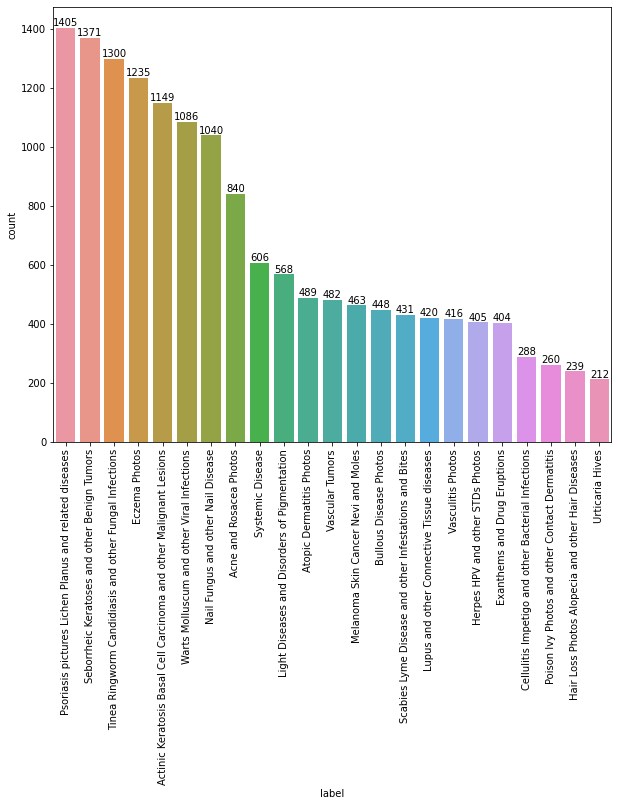

In [25]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x=df['label'],
                   order=df['label'].value_counts(ascending=False).index);

abs_values = df['label'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAmoAAAMmCAYAAABFP63cAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAAsTAAALEwEAmpwYAADtxUlEQVR4nOzdeXyU1fXH8c8B3NACIqBIRERUNiEqitYWF4p7UXFFrCi0+tO6t6ittYqtda91q1ZFFndxKaiIuOFaRUBAXKGIBUQWBUVQET2/P+4zYRImYZn7TCbk+3698krmmcm9T5LJPGfuvedcc3dEREREpPjUqe4TEBEREZHcFKiJiIiIFCkFaiIiIiJFSoGaiIiISJFSoCYiIiJSpBSoiYiIiBSpetV9Amlo0qSJt2rVqrpPQ0RERGS1JkyYsNDdm+a6b70M1Fq1asX48eOr+zREREREVsvMPqnsPk19ioiIiBQpBWoiIiIiRUqBmoiIiEiRUqAmIiIiUqQUqImIiIgUKQVqIiIiIkVKgZqIiIhIkVKgJiIiIlKkFKiJiIiIFKn1NlDr168fzZo1o2PHjqvcd/3112NmLFy4EAB35+yzz6ZNmzZ06tSJiRMnlj22bt26lJaWUlpaSs+ePQt2/iIiIiLrbaB28sknM3r06FWOz5o1izFjxtCyZcuyY08//TTTpk1j2rRp3HHHHZx++ull922yySZMmjSJSZMmMXLkyIKcu4iIiAisx4Fat27daNy48SrHzzvvPK655hrMrOzYiBEjOOmkkzAz9txzTxYvXszcuXMLeboiIiIiq1hvA7VcRowYQYsWLejcuXO543PmzGGbbbYpu11SUsKcOXMA+Pbbb+nSpQt77rkn//73vwt5uiIiIlLL1avuEyiUZcuW8be//Y0xY8as1fd98skntGjRghkzZrD//vuz8847s/3226d0liIiIiIr1ZoRtf/+9798/PHHdO7cmVatWjF79mx23XVXPvvsM1q0aMGsWbPKHjt79mxatGgBUPa5devW7Lvvvrz99tvVcv4iIiJS+9SaQG3nnXdm/vz5zJw5k5kzZ1JSUsLEiRPZaqut6NmzJ8OGDcPdeeONN2jYsCHNmzdn0aJFfPfddwAsXLiQ1157jfbt21fzTyIiIiK1RWqBmpndbWbzzWxqjvt+Z2ZuZk2S22ZmN5nZdDObYma7Zj22r5lNSz76rmn/vXv3Zq+99uLDDz+kpKSEQYMGVfrYQw45hNatW9OmTRt+85vf8M9//hOA999/ny5dutC5c2f2228/LrroIgVqIiIiUjDm7uk0bNYN+BoY5u4ds45vA9wFtAV2c/eFZnYIcBZwCNAVuNHdu5pZY2A80AVwYELyPYuq6rtLly4+fvz4NH4sERERkajMbIK7d8l1X2ojau7+MvBFjrtuAC4gBF4ZhxMCOnf3N4BGZtYcOBB41t2/SIKzZ4GD0jpnERERkWJS0KxPMzscmOPuk7PrmAEtgFlZt2cnxyo7vsYW3Hbvup1sDk1PP7Hs6379+vHkk0/SrFkzpk4Ns7uXXHIJI0aMoE6dOjRr1owhQ4aw9dZbc+2113LfffcBsGLFCt5//30WLFhA48aNc7YjIiIiAgVMJjCz+sAfgT+n1P6pZjbezMYvWLAgjS7KybXzwYABA5gyZQqTJk3isMMO4/LLLy87ntnd4Morr2SfffYpK8Zb2Q4KIiIiIoXM+twe2A6YbGYzgRJgopltBcwBtsl6bElyrLLjq3D3O9y9i7t3adq0aQqnX16unQ8aNGhQ9vXSpUupMGoIwAMPPEDv3r2rbEdEREQECjj16e7vAM0yt5NgrUuSTDASONPMHiQkE3zp7nPN7Bngb2a2efJtBwB/KNQ5r4uLL76YYcOG0bBhQ1588cVy9y1btozRo0dzyy23VNPZiYiISE2SZnmOB4D/ADuZ2Wwz61/Fw0cBM4DpwJ3AGQDu/gXwF+Ct5OPy5FjRuuKKK5g1axZ9+vRZJSB74okn2HvvvTWCJiIiImsktRE1d++9mvtbZX3twG8redzdwN1RT64A+vTpwyGHHMLAgQPLjj344IPlpj1FREREqlJrdiYohGnTppV9PWLECNq2bVt2+8svv+Sll17i8MMPr45TExERkRqo1mzKHlvv3r0ZO3YsCxcupKSkhIEDBzJq1Cg+/PBD6tSpw7bbbsvtt99e9vjHH3+cAw44gE033XS17fTvX9UssYiIiNQWqe1MUJ2ydyZIq46aiIiISAzVsjOBiIiIiORHU595mnfbNVHb2/L0C6K2JyIiIjWXRtREREREipQCNREREZEipUBNREREpEgpUBMREREpUgrURERERIqUAjURERGRIqVATURERKRIKVATERERKVIK1ERERESKlAI1ERERkSKlQK2I9evXj2bNmtGxY8eyY5dccgmdOnWitLSUAw44gE8//RQAd+fss8+mTZs2dOrUiYkTJ5Z9z9ChQ9lhhx3YYYcdGDp0aMF/DhEREVk3CtSK2Mknn8zo0aPLHRswYABTpkxh0qRJHHbYYVx++eUAPP3000ybNo1p06Zxxx13cPrppwPwxRdfMHDgQN58803GjRvHwIEDWbRoUcF/FhEREVl7CtSKWLdu3WjcuHG5Yw0aNCj7eunSpZgZACNGjOCkk07CzNhzzz1ZvHgxc+fO5ZlnnqFHjx40btyYzTffnB49eqwS/ImIiEhxqlfdJyBr7+KLL2bYsGE0bNiQF198EYA5c+awzTbblD2mpKSEOXPmVHpcREREip9G1GqgK664glmzZtGnTx9uueWW6j4dERERSYkCtRqsT58+PProowC0aNGCWbNmld03e/ZsWrRoUelxERERKX4K1GqYadOmlX09YsQI2rZtC0DPnj0ZNmwY7s4bb7xBw4YNad68OQceeCBjxoxh0aJFLFq0iDFjxnDggQdW1+mLiIjIWtAatSLWu3dvxo4dy8KFCykpKWHgwIGMGjWKDz/8kDp16rDtttty++23A3DIIYcwatQo2rRpQ/369Rk8eDAAjRs35pJLLmH33XcH4M9//vMqCQoiIiJSnMzdq/scouvSpYuPHz8egAW33Rut3aann7jKsXm3XROtfYAtT78gansiIiJS3Mxsgrt3yXWfpj5FREREipSmPovczJuOiNpeq7P/HbU9ERERSY9G1ERERESKlAI1ERERkSKlQE1ERESkSClQExERESlSCtREREREipQCNREREZEipUBNREREpEgpUBMREREpUgrUarF+/frRrFkzOnbsWHZswIABtG3blk6dOnHkkUeyePFiAMaNG0dpaSmlpaV07tyZxx9/vOx7WrVqxc4770xpaSlduuTcAUNERETWgQK1Wuzkk09m9OjR5Y716NGDqVOnMmXKFHbccUeuvPJKADp27Mj48eOZNGkSo0eP5rTTTmPFihVl3/fiiy8yadIkMnusioiISP4UqNVi3bp1o3HjxuWOHXDAAdSrF3YW23PPPZk9ezYA9evXLzv+7bffYmaFPVkREZFaSIGaVOruu+/m4IMPLrv95ptv0qFDB3beeWduv/32ssDNzDjggAPYbbfduOOOO6rrdEVERNY72pRdcrriiiuoV68effr0KTvWtWtX3n33Xd5//3369u3LwQcfzMYbb8yrr75KixYtmD9/Pj169KBt27Z069atGs9eRERk/aARNVnFkCFDePLJJ7nvvvtyTnG2a9eOzTbbjKlTpwLQokULAJo1a8aRRx7JuHHjCnq+IiIi6ysFalLO6NGjueaaaxg5ciT169cvO/7xxx+XJQ988sknfPDBB7Rq1YqlS5eyZMkSAJYuXcqYMWPKZZGKiIjIutPUZy3Wu3dvxo4dy8KFCykpKWHgwIFceeWVfPfdd/To0QMICQW33347r776KldddRUbbLABderU4Z///CdNmjRhxowZHHnkkQCsWLGCE044gYMOOqg6fywREZH1hgK1WuyBBx5Y5Vj//v1zPvZXv/oVv/rVr1Y53rp1ayZPnhz93ERERERTnyIiIiJFSyNqwpv/OixaW11PezJaWyIiIrWdRtREREREipQCNREREZEipUBNREREpEgpUBMREREpUgrURERERIpUaoGamd1tZvPNbGrWsWvN7AMzm2Jmj5tZo6z7/mBm083sQzM7MOv4Qcmx6WZ2UVrnKyIiIlJs0hxRGwJULFH/LNDR3TsBHwF/ADCz9sDxQIfke/5pZnXNrC5wK3Aw0B7onTxWREREZL2XWqDm7i8DX1Q4NsbdVyQ33wBKkq8PBx509+/c/WNgOrBH8jHd3We4+3LgweSxIiIiIuu96lyj1g94Ovm6BTAr677ZybHKjouIiIis96olUDOzi4EVwH0R2zzVzMab2fgFCxbEalZERESk2hQ8UDOzk4HDgD7u7snhOcA2WQ8rSY5VdnwV7n6Hu3dx9y5NmzaNft4iIiIihVbQQM3MDgIuAHq6+7Ksu0YCx5vZRma2HbADMA54C9jBzLYzsw0JCQcjC3nOIiIiItUltU3ZzewBYF+giZnNBi4lZHluBDxrZgBvuPv/ufu7ZvYw8B5hSvS37v5D0s6ZwDNAXeBud383rXMWERERKSapBWru3jvH4UFVPP4K4Iocx0cBoyKemoiIiEiNoJ0JJDX9+vWjWbNmdOzYsezY8OHD6dChA3Xq1GH8+PGrfM///vc/NttsM6677rqyYzfeeCMdO3akQ4cO/OMf/yjEqYuIiBQFBWqSmpNPPpnRo0eXO9axY0cee+wxunXrlvN7zj//fA4++OCy21OnTuXOO+9k3LhxTJ48mSeffJLp06enet4iIiLFQoGapKZbt240bty43LF27dqx00475Xz8v//9b7bbbjs6dOhQduz999+na9eu1K9fn3r16rHPPvvw2GOPpXreIiIixUKBmhSFr7/+mquvvppLL7203PGOHTvyyiuv8Pnnn7Ns2TJGjRrFrFmzKmlFRERk/ZJaMoHI2rjssss477zz2Gyzzcodb9euHRdeeCEHHHAAm266KaWlpdStW7eazlJERKSwFKhJUXjzzTd55JFHuOCCC1i8eDF16tRh44035swzz6R///70798fgD/+8Y+UlJSspjUREZH1gwI1KQqvvPJK2deXXXYZm222GWeeeSYA8+fPp1mzZvzvf//jscce44033qiu0xQRESkoBWqSmt69ezN27FgWLlxISUkJAwcOpHHjxpx11lksWLCAQw89lNLSUp555pkq2znqqKP4/PPP2WCDDbj11ltp1KhRYX4AERGRaqZATVLzwAMP5Dx+5JFHVvl9l112Wbnb2aNtIiIitYmyPkVERESKlEbUJHVPDzokWlsH99duYiIiUntoRE1ERESkSClQExERESlSCtREREREipQCNREREZEipUBNREREpEgpUBMREREpUgrURERERIqUAjURERGRIqVATWqsfv360axZMzp27Fh27IsvvqBHjx7ssMMO9OjRg0WLFgHw5Zdf8stf/pLOnTvToUMHBg8eXPY9//vf/zjggANo164d7du3Z+bMmYX+UURERHJSoCY11sknn8zo0aPLHbvqqqvo3r0706ZNo3v37lx11VUA3HrrrbRv357JkyczduxYfve737F8+XIATjrpJAYMGMD777/PuHHjaNasWcF/FhERkVwUqEmN1a1bNxo3blzu2IgRI+jbty8Affv25d///jcAZsaSJUtwd77++msaN25MvXr1eO+991ixYgU9evQAYLPNNqN+/foF/TlEREQqo0BN1ivz5s2jefPmAGy11VbMmzcPgDPPPJP333+frbfemp133pkbb7yROnXq8NFHH9GoUSN69erFLrvswoABA/jhhx+q80cQEREpo0BN1ltmhpkB8Mwzz1BaWsqnn37KpEmTOPPMM/nqq69YsWIFr7zyCtdddx1vvfUWM2bMYMiQIdV74iIiIgkFarJe2XLLLZk7dy4Ac+fOLVtvNnjwYHr16oWZ0aZNG7bbbjs++OADSkpKKC0tpXXr1tSrV48jjjiCiRMnVuePICIiUkaBmqxXevbsydChQwEYOnQohx9+OAAtW7bk+eefB8L06Icffkjr1q3ZfffdWbx4MQsWLADghRdeoH379tVz8iIiIhXUq+4TEFlXvXv3ZuzYsSxcuJCSkhIGDhzIRRddxLHHHsugQYPYdtttefjhhwG45JJLOPnkk9l5551xd66++mqaNGkCwHXXXUf37t1xd3bbbTd+85vfVOePJSIiUkaBmtRYDzzwQM7jmZGzbFtvvTVjxozJ+fgePXowZcqUqOcmIiISg6Y+RURERIqURtSkxrtvyIFR2+tz8jNR2xMREVlXGlETERERKVIK1ERERESKlAI1ERERkSKlQE2kCv369aNZs2Z07Nix7NgXX3xBjx492GGHHejRoweLFi0q9z1vvfUW9erV45FHHik7NnToUHbYYQd22GGHsjpvIiIiq6NATaQKJ598MqNHjy537KqrrqJ79+5MmzaN7t27c9VVV5Xd98MPP3DhhRdywAEHlB374osvGDhwIG+++Sbjxo1j4MCBqwR3IiIiuShQE6lCt27daNy4cbljI0aMoG/fvgD07duXf//732X33XzzzRx11FFlW1dB2Ge0R48eNG7cmM0335wePXqsEvyJiIjkokBNZC3NmzeP5s2bA7DVVlsxb948AObMmcPjjz/O6aefXu7xc+bMYZtttim7XVJSwpw5cwp3wiIiUmMpUBPJg5lhZgCce+65XH311dSpo38rERGJQwVvRdbSlltuydy5c2nevDlz584tm+YcP348xx9/PAALFy5k1KhR1KtXjxYtWjB27Niy7589ezb77rtvNZy5iIjUNHrrL7KWevbsWZa5OXToUA4//HAAPv74Y2bOnMnMmTM5+uij+ec//8kRRxzBgQceyJgxY1i0aBGLFi1izJgxHHhg3N0URERk/aQRNZEq9O7dm7Fjx7Jw4UJKSkoYOHAgF110EcceeyyDBg1i22235eGHH66yjcaNG3PJJZew++67A/DnP/95lQQFERGRXBSoiVThgQceyHn8+eefr/L7hgwZUu52v3796NevX6zTEhGRWkKBmshq3HJv3GnKM0/Upu8iIrJmtEZNREREpEgpUBMREREpUgrURERERIqUAjURERGRIqVATURERKRIKVATERERKVIK1ERERESKVGqBmpndbWbzzWxq1rHGZvasmU1LPm+eHDczu8nMppvZFDPbNet7+iaPn2ZmfdM6XxEREZFik+aI2hDgoArHLgKed/cdgOeT2wAHAzskH6cCt0EI7IBLga7AHsClmeBOREREZH2XWqDm7i8DX1Q4fDgwNPl6KHBE1vFhHrwBNDKz5sCBwLPu/oW7LwKeZdXgT0RERGS9VOg1alu6+9zk68+ALZOvWwCzsh43OzlW2XERERGR9V61JRO4uwMeqz0zO9XMxpvZ+AULFsRqVkRERKTaFDpQm5dMaZJ8np8cnwNsk/W4kuRYZcdX4e53uHsXd+/StGnT6CcuIiIiUmiFDtRGApnMzb7AiKzjJyXZn3sCXyZTpM8AB5jZ5kkSwQHJMREREZH1Xr20GjazB4B9gSZmNpuQvXkV8LCZ9Qc+AY5NHj4KOASYDiwDTgFw9y/M7C/AW8njLnf3igkKIiIiIuul1AI1d+9dyV3dczzWgd9W0s7dwN0RT01ERESkRtDOBCIiIiJFSoGaiIiISJFSoCYiIiJSpBSoiYiIiBQpBWoiIiIiRUqBmoiIiEiRUqAmIiIiUqQUqImIiIgUKQVqIiIiIkVKgZqIiIhIkVKgJiIiIlKkFKiJiIiIFCkFaiIiIiJFSoGaiIiISJFSoCYiIiJSpBSoiYiIiBQpBWoiIiIiRUqBmoiIiEiRUqAmIiIiUqQUqImIiIgUKQVqIiIiIkVKgZqIiIhIkVKgJiIiIlKkFKiJiIiIFCkFaiIiIiJFSoGaiIiISJFSoCYiIiJSpBSoiYiIiBQpBWoiIiIiRUqBmoiIiEiRUqAmIiIiUqQUqImIiIgUKQVqIkXkhhtuoEOHDnTs2JHevXvz7bfflt139tlns9lmm5Xd/u677zjuuONo06YNXbt2ZebMmdVwxiIikiYFaiJFYs6cOdx0002MHz+eqVOn8sMPP/Dggw8CMH78eBYtWlTu8YMGDWLzzTdn+vTpnHfeeVx44YXVcdoiIpIiBWoiRWTFihV88803rFixgmXLlrH11lvzww8/MGDAAK655ppyjx0xYgR9+/YF4Oijj+b555/H3avjtEVEJCUK1ESKRIsWLfj9739Py5Ytad68OQ0bNuSAAw7glltuoWfPnjRv3rzc4+fMmcM222wDQL169WjYsCGff/55dZy6iIikRIGaSJFYtGgRI0aM4OOPP+bTTz9l6dKlDBs2jOHDh3PWWWdV9+mJiEg1UKAmUiSee+45tttuO5o2bcoGG2xAr169uPTSS5k+fTpt2rShVatWLFu2jDZt2gBhBG7WrFlAmDL98ssv2WKLLarzRxARkcgUqIkUiZYtW/LGG2+wbNky3J3nn3+e888/n88++4yZM2cyc+ZM6tevz/Tp0wHo2bMnQ4cOBeCRRx5h//33x8yq80cQEZHI6lX3CYhI0LVrV44++mh23XVX6tWrxy677MKpp55a6eP79+/Pr371K9q0aUPjxo3LMkRFRGT9oUBNpIgMHDiQgQMHVnr/119/Xfb1xhtvzPDhwwtxWiIiUk009SkiIiJSpDSiJlIELnn4oGht/eXY0dHaEhGR6qURNREREZEipUBNREREpEgpUBMREREpUgrURERERIqUAjURERGRIqVATURERKRIKVATERERKVLVEqiZ2Xlm9q6ZTTWzB8xsYzPbzszeNLPpZvaQmW2YPHaj5Pb05P5W1XHOIiIiIoVW8EDNzFoAZwNd3L0jUBc4HrgauMHd2wCLgP7Jt/QHFiXHb0geJyIiIrLeq66pz3rAJmZWD6gPzAX2Bx5J7h8KHJF8fXhym+T+7mZmhTtVERERkepR8EDN3ecA1wH/IwRoXwITgMXuviJ52GygRfJ1C2BW8r0rksdvUchzFhEREakO1TH1uTlhlGw7YGtgUyDvjQ7N7FQzG29m4xcsWJBvcyIiIiLVrjqmPn8BfOzuC9z9e+AxYG+gUTIVClACzEm+ngNsA5Dc3xD4vGKj7n6Hu3dx9y5NmzZN+2cQERERSV11BGr/A/Y0s/rJWrPuwHvAi8DRyWP6AiOSr0cmt0nuf8HdvYDnKyIiIlItqmON2puEpICJwDvJOdwBXAicb2bTCWvQBiXfMgjYIjl+PnBRoc9ZREREpDrUW/1D4nP3S4FLKxyeAeyR47HfAscU4rxEREREiol2JhAREREpUgrURERERIrUGgVqZvb8mhwTERERkXiqXKNmZhsTdg5oktQ/y+wI0ICVBWlFREREJAWrSyY4DTiXUJh2AisDta+AW9I7LRERERGpMlBz9xuBG83sLHe/uUDnJCIiIiKsYXkOd7/ZzH4KtMr+HncfltJ5iYiIiNR6axSomdk9wPbAJOCH5LADCtREREREUrKmBW+7AO21dZOIiIhI4axpHbWpwFZpnoiIiIiIlLemI2pNgPfMbBzwXeagu/dM5axEREREZI0DtcvSPAkRERERWdWaZn2+lPaJiIiIiEh5a5r1uYSQ5QmwIbABsNTdG6R1YiIiIiK13ZqOqP0k87WZGXA4sGdaJyUiIiIia571WcaDfwMHxj8dEREREclY06nPXlk36xDqqn2byhmJiIiICLDmWZ+/zPp6BTCTMP0pIiIiIilZ0zVqp6R9IiIiIiJS3hqtUTOzEjN73MzmJx+PmllJ2icnIiIiUputaTLBYGAksHXy8URyTERERERSsqaBWlN3H+zuK5KPIUDTFM9LREREpNZb00DtczM70czqJh8nAp+neWIiIiIitd2aBmr9gGOBz4C5wNHAySmdk4iIiIiw5uU5Lgf6uvsiADNrDFxHCOBEREREJAVrOqLWKROkAbj7F8Au6ZySiIiIiMCaB2p1zGzzzI1kRG1NR+NEREREZB2sabB1PfAfMxue3D4GuCKdUxIRERERWPOdCYaZ2Xhg/+RQL3d/L73TEhEREZE1nr5MAjMFZyIiIiIFsqZr1ERERESkwBSoiYiIiBQpBWoiIiIiRUqBmoiIiEiRUqAmIiIiUqQUqImIiIgUKQVqIiIiIkVKgZqIiIhIkVKgJiIiIlKkFKiJiIiIFCkFaiIiIiJFSoGaiIiISJFSoCZSiyxevJijjz6atm3b0q5dO/7zn//wxRdf0KNHD3bYYQd69OjBokWLyh4/duxYSktL6dChA/vss081nrmISO2kQE2kFjnnnHM46KCD+OCDD5g8eTLt2rXjqquuonv37kybNo3u3btz1VVXASGoO+OMMxg5ciTvvvsuw4cPr+azFxGpfRSoidQSX375JS+//DL9+/cHYMMNN6RRo0aMGDGCvn37AtC3b1/+/e9/A3D//ffTq1cvWrZsCUCzZs2q5bxFRGozBWoitcTHH39M06ZNOeWUU9hll1349a9/zdKlS5k3bx7NmzcHYKuttmLevHkAfPTRRyxatIh9992X3XbbjWHDhlXn6YuI1EoK1ERqiRUrVjBx4kROP/103n77bTbddNOyac4MM8PMyh4/YcIEnnrqKZ555hn+8pe/8NFHH1XHqYuI1FoK1ERqiZKSEkpKSujatSsARx99NBMnTmTLLbdk7ty5AMydO7dsirOkpIQDDzyQTTfdlCZNmtCtWzcmT55cbecvIlIbKVATqSW22morttlmGz788EMAnn/+edq3b0/Pnj0ZOnQoAEOHDuXwww8H4PDDD+fVV19lxYoVLFu2jDfffJN27dpV2/mLiNRG9ar7BESkcG6++Wb69OnD8uXLad26NYMHD+bHH3/k2GOPZdCgQWy77bY8/PDDALRr146DDjqITp06UadOHX7961/TsWPHav4JRERql2oJ1MysEXAX0BFwoB/wIfAQ0AqYCRzr7ossLJi5ETgEWAac7O4TC3/WIjVfaWkp48ePX+X4888/n/PxAwYMYMCAAWmfloiIVKK6pj5vBEa7e1ugM/A+cBHwvLvvADyf3AY4GNgh+TgVuK3wpysiIiJSeAUfUTOzhkA34GQAd18OLDezw4F9k4cNBcYCFwKHA8Pc3YE3zKyRmTV397kFPnWRGuvgkT2jtfV0z5HR2hIRkapVx4jadsACYLCZvW1md5nZpsCWWcHXZ8CWydctgFlZ3z87OSYiIiKyXquOQK0esCtwm7vvAixl5TQnAMnoma9No2Z2qpmNN7PxCxYsiHayIrLmWrVqxc4770xpaSldunQpO37zzTfTtm1bOnTowAUXXADA999/T9++fdl5551p164dV155ZXWdtohI0aqOZILZwGx3fzO5/QghUJuXmdI0s+bA/OT+OcA2Wd9fkhwrx93vAO4A6NKly1oFeSISz4svvkiTJk3K3R4xYgSTJ09mo402Yv788K89fPhwvvvuO9555x2WLVtG+/bt6d27N61ataqmMxcRKT4FH1Fz98+AWWa2U3KoO/AeMBLomxzrC4xIvh4JnGTBnsCXWp8mUnPcdtttXHTRRWy00UbAyj1DzYylS5eyYsUKvvnmGzbccEMaNGhQnacqIlJ0qivr8yzgPjObApQCfwOuAnqY2TTgF8ltgFHADGA6cCdwRsHPVkTWiJlxwAEHsNtuu3HHHXcAYc/QV155ha5du7LPPvvw1ltvAWFnhE033ZTmzZvTsmVLfv/739O4cePqPH0RkaJTLXXU3H0S0CXHXd1zPNaB36Z9TiKSv1dffZUWLVowf/58evToQdu2bVmxYgVffPEFb7zxBm+99RbHHnssM2bMYNy4cdStW5dPP/2URYsW8fOf/5xf/OIXtG7durp/DBGRoqEtpEQkmhYtQkJ2s2bNOPLIIxk3bhwlJSX06tULM2OPPfagTp06LFy4kPvvv5+DDjqIDTbYgGbNmrH33nvnLMYrIlKbKVATkSiWLl3KkiVLyr4eM2YMHTt25IgjjuDFF18EwjTo8uXLadKkCS1btuSFF14oe/wbb7xB27Ztq+38RUSKkfb6FJEo5s2bx5FHHgnAihUrOOGEEzjooINYvnw5/fr1o2PHjmy44YYMHToUM+O3v/0tp5xyCh06dMDdOeWUU+jUqVM1/xQiIsVFgZqIRNG6dWsmT568yvENN9yQe++9d5Xjm222GcOHDy/EqYmI1FgK1EQkb4c8fmnU9kYdOTBqeyIiNZXWqImIiIgUKQVqIiIiIkVKgZqIiIhIkVKgJiIiIlKkFKiJiIiIFCkFaiIiIiJFSoGaiIiISJFSoCYiIiJSpBSoiYiIiBQpBWoiIiIiRUqBmoiIiEiRUqAmIiIiUqQUqImIiIgUKQVqIlKj/PDDD+yyyy4cdthhADz//PPsuuuulJaW8rOf/Yzp06cD8Mknn9C9e3c6derEvvvuy+zZs6vztEVE1okCNRGpUW688UbatWtXdvv000/nvvvuY9KkSZxwwgn89a9/BeD3v/89J510ElOmTOHPf/4zf/jDH6rrlEVE1pkCNRGpMWbPns1TTz3Fr3/967JjZsZXX30FwJdffsnWW28NwHvvvcf+++8PwH777ceIESPWqI81HbH7+9//Tvv27enUqRPdu3fnk08+ifZziohkKFATkRrj3HPP5ZprrqFOnZUvXXfddReHHHIIJSUl3HPPPVx00UUAdO7cmcceewyAxx9/nCVLlvD555+vto81HbHbZZddGD9+PFOmTOHoo4/mggsuiPmjiogACtREpIZ48sknadasGbvttlu54zfccAOjRo1i9uzZnHLKKZx//vkAXHfddbz00kvssssuvPTSS7Ro0YK6detW2cfajNjtt99+1K9fH4A999xTa+BEJBX1qvsERETWxGuvvcbIkSMZNWoU3377LV999RWHHnooH3zwAV27dgXguOOO46CDDgJg6623LhtR+/rrr3n00Udp1KhRlX1kRuyWLFlSdiwzYrfJJpvQoEED3njjjVW+b9CgQRx88MGRflIRkZU0oiYiNcKVV17J7NmzmTlzJg8++CD7778/I0aM4Msvv+Sjjz4C4Nlnny2btly4cCE//vhj2ff269evyvbXdsQu495772X8+PEMGDAg1o8qIlJGI2oiUmPVq1ePO++8k6OOOoo6deqw+eabc/fddwMwduxY/vCHP2BmdOvWjVtvvbXKttZ2xA7gueee44orruCll15io402Su8HFZFaSyNqIlLj7Lvvvjz55JMAHHnkkbzzzjtMnjyZsWPH0rp1awCOPvpopk2bxkcffcRdd9212kBqbUfs3n77bU477TRGjhxJs2bN1ur8K2aWujsXX3wxO+64I+3ateOmm24CYMSIEXTq1InS0lK6dOnCq6++ulb9iEjNpxE1EZFKVDViN2DAAL7++muOOeYYAFq2bMnIkSPXqN1MZmkmSWHIkCHMmjWLDz74gDp16jB//nwAunfvTs+ePTEzpkyZwrHHHssHH3yQwk8qIsVKgZqIFL1DH7spantP9Tq7yvv33Xdf9t13XyCM2B155JGrPOa5555bp74zmaUXX3wxf//73wG47bbbuP/++8vKjmRG6DbbbLOy71u6dClmtk59ikjNpalPEZECylUL7r///S8PPfQQXbp04eCDD2batGll9z3++OO0bduWQw89tGw0T0RqD42oiYgAhz06JFpbTx51cu7jWZmlY8eOLTv+3XffsfHGGzN+/Hgee+wx+vXrxyuvvAKsHNF7+eWXueSSS9ZoJO+HH36gS5cutGjRomwtH8DZZ5/N3Xffzddffw3A//73P/r27cvixYv54YcfuOqqqzjkkEPW/QcXkeg0oiYiUiCZzNJWrVpx/PHH88ILL3DiiSdSUlJCr169gBCYTZkyZZXv7datGzNmzGDhwoWr7afi7goA48ePZ9GiReWO/fWvf+XYY4/l7bff5sEHH+SMM87I46cTkTQoUBMRKZBcmaX33nsvRxxxBC+++CIAL730EjvuuCMA06dPx90BmDhxIt999x1bbLFFlX3k2l3hhx9+YMCAAVxzzTXlHlvZrgsiUjw09SkiUs0uuugi+vTpww033MBmm23GXXfdBcCjjz7KsGHD2GCDDdhkk0146KGHVptQkGt3hVtuuYWePXvSvHnzco+97LLLOOCAA7j55ptZunTpOidIiEh6FKiJiFSD7MzSRo0a8dRTT63ymAsvvJALL7xwjdvMtQbu008/Zfjw4eXWxGU88MADnHzyyfzud7/jP//5D7/61a+YOnVquUQHEaleCtRERArgsEeGR2vryaOPyXk81+4KHTp0YKONNqJNmzYALFu2jDZt2jB9+nQGDRrE6NGjAdhrr7349ttvWbhw4WoL+FZMVujfvz/jx4/H3dlxxx0ZMmQIm222GS+//DLnnnsuU6ZM4cEHH+Too4+O9jsQqS30tklEZD2Raw3cokWL+Oyzz5g5cyYzZ86kfv36TJ8+HQhFep9//nkA3n//fb799luaNm262n4qJivccMMNTJ48mSlTptCyZUtuueWWsvaHDBnCCSeckMJPK1I7KFATEamlrr/+eu688046d+5M7969GTJkyGrXwOVKVmjQoAEQtsL65ptvytpo1aoVnTp10lSqSB703yMish7K3g81W6aGGkD79u157bXXmDx5MpMmTeKAAw5Ybbu5CvYCnHLKKWy11VZ88MEHnHXWWXmde8W9UPv06cNOO+1Ex44d6devH99//z0QAsOzzz6bNm3a0KlTJyZOnJhXvyLFSIGaiIiskexkhYoGDx7Mp59+Srt27XjooYfy6qfi1GqfPn344IMPeOedd/jmm2/KsmKffvpppk2bxrRp07jjjjs4/fTT17iPisHgLbfcQps2bTCzVWrVjR07ltLSUjp06MA+++yT188msraUTCAish44/JHRUdsbcfRBqxzLlaxw4okncu+99wJQt25djj/+eK655hpOOeWUdeo3116o2bsl7LHHHsyePTuc44gRnHTSSZgZe+65J4sXL2bu3LmrlCHJJRMMZurI7b333hx22GFlmbgZixcv5owzzmD06NG0bNmS+fPnr9PPJbKuNKImIiJrJFeywj333FOWnODujBw5krZt265zH5VNrQJ8//333HPPPRx0UAgi58yZwzbbbFN2f0lJCXPmzFltH7nW2e2yyy60atVqlcfef//99OrVi5YtWwKsNiNWJDYFaiIiss7cnb59+7Lzzjuz8847M3fuXP785z8D8NZbb1FSUsLw4cM57bTT6NChQ5VtVTW1CnDGGWfQrVs3fv7zn+d1zlUFgxV99NFHLFq0iH333ZfddtuNYcOG5dW3yNpSoCYiImstk6xQp04dXnvtNd555x2mTp3KfffdV5YFuvvuuzN79myWLl3K559/zrvvvltlm5XthQowcOBAFixYUDYdCtCiRQtmzZpVdnv27Nm0aNGiyj5WFwxWtGLFCiZMmMBTTz3FM888w1/+8hc++uij1X5fxTVwH3/8MV27dqVNmzYcd9xxLF++HIAhQ4bQtGlTSktLKS0tLVt/F6v9jEcffRQzY/z48WvUvhQPBWoiIlIUKtsL9a677uKZZ57hgQceKDcK1rNnT4YNG4a788Ybb9CwYcPVrk+rKhjMpaSkhAMPPJBNN92UJk2a0K1bNyZPnrzan6ViQsSFF17Ieeedx/Tp09l8880ZNGhQ2X3HHXcckyZNYtKkSeWmY2O1v2TJEm688Ua6du26Rm1LcVEygYiIrJFej/4nWluPHbXXGj/2//7v/9h2223Za6/wPb169eLPf/4zhxxyCKNGjaJNmzbUr1+fwYMHr7atK6+8kiuvvBII2ZzXXXddWTJELocffjhnnnkmK1asYPny5bz55pucd955VfZRMSHC3XnhhRe4//77Aejbty+XXXbZWmWp5tP+JZdcwoUXXsi11167Tv1J9VKgJiIiRSd7L9QVK1bkfIyZceutt0bp76abbuKaa67hs88+o1OnThxyyCHcddddtGvXjoMOOqiscO+vf/1rOnbsWGVbmTVwS5YsAeDzzz+nUaNG1KsXLrkVkx4effRRXn75ZXbccUduuOGGcgkS+bY/ceJEZs2axaGHHqpArYbS1KeIiNRK2UWBzz77bGbPns2KFSv49NNPy60VGzBgAO+99x5Tp07l3HPPrbLNtV0D98tf/pKZM2cyZcoUevToQd++faO1/+OPP3L++edz/fXXr9G5SHHSiJqIiBSF4x6bEa2th3q1jtbW2shVa+6cc85h8eLFrFixgnr16pVLethiiy3KvvfXv/41F1xwQbT2lyxZwtSpU8tGJj/77DN69uzJyJEj6dKlS2q/A4lLgZqIiNQKNz7+WbS2zjlyq5zHc62Bu++++zjmmGN45JFHOP744xk6dCiHH344QLkCvSNHjiyXIJBv+w0bNiy3y8K+++7LddddpyCthqm2qU8zq2tmb5vZk8nt7czsTTObbmYPmdmGyfGNktvTk/tbVdc5i4iIrIurr76av//977Rp04bPP/+c/v37A2FtXIcOHejcuTM33XQTQ4YMidq+1HzVOaJ2DvA+0CC5fTVwg7s/aGa3A/2B25LPi9y9jZkdnzzuuOo4YRERkTWVnRDRunVrxo0bt8pjskfI0mg/29ixY9epH6le1RKomVkJcChwBXC+mRmwP3BC8pChwGWEQO3w5GuAR4BbzMzc3Qt5ziIiIlUZMXzh6h+0Fg4/pknU9qRmqq4RtX8AFwA/SW5vASx290wO9mwgU166BTALwN1XmNmXyePj/keIiIgUuf8MXRCtrb36No3WlqSn4GvUzOwwYL67T4jc7qlmNt7Mxi9YEO+JLCIiIlJdqiOZYG+gp5nNBB4kTHneCDQys8wIXwmQqQY4B9gGILm/IfB5xUbd/Q537+LuXZo21bsEERERqfkKHqi5+x/cvcTdWwHHAy+4ex/gReDo5GF9gRHJ1yOT2yT3v6D1aSIiIlIbFNPOBBcSEgumE9agZXaUHQRskRw/H7ioms5PREREpKCqteCtu48FxiZfzwD2yPGYb4FjCnpiIiIiIkWgmEbURERERCSLAjURERGRIqVATURERKRIKVATERERKVIK1ERERESKlAI1ERERkSKlQE1ERESkSClQExERESlSCtREREREipQCNREREZEipUBNREREpEgpUBMREREpUgrURERERIqUAjURERGRIqVATURERKRIKVATERERKVIK1ERERESKlAI1ERERkSKlQE1ERETKzJo1i/3224/27dvToUMHbrzxRgAmTZrEnnvuSWlpKV26dGHcuHEAfPnll/zyl7+kc+fOdOjQgcGDB1fn6a936lX3CYiIiEjxqFevHtdffz277rorS5YsYbfddqNHjx5ccMEFXHrppRx88MGMGjWKCy64gLFjx3LrrbfSvn17nnjiCRYsWMBOO+1Enz592HDDDav7R1kvKFATERGRMs2bN6d58+YA/OQnP6Fdu3bMmTMHM+Orr74Cwija1ltvDYCZsWTJEtydr7/+msaNG1OvnsKLWPSbFBERkZxmzpzJ22+/TdeuXfnHP/7BgQceyO9//3t+/PFHXn/9dQDOPPNMevbsydZbb82SJUt46KGHqFNHK6ti0W9SREREVvH1119z1FFH8Y9//IMGDRpw2223ccMNNzBr1ixuuOEG+vfvD8AzzzxDaWkpn376KZMmTeLMM88sG3mT/ClQExERkXK+//57jjrqKPr06UOvXr0AGDp0aNnXxxxzTFkyweDBg+nVqxdmRps2bdhuu+344IMPqu3c1zcK1ERERKSMu9O/f3/atWvH+eefX3Z866235qWXXgLghRdeYIcddgCgZcuWPP/88wDMmzePDz/8kNatWxf+xNdTWqMmIiIiZV577TXuuecedt55Z0pLSwH429/+xp133sk555zDihUr2HjjjbnjjjsAuOSSSzj55JPZeeedcXeuvvpqmjRpUo0/wfpFgZqIiIiU+dnPfoa757xvwoQJqxzbeuutGTNmzBq3P2vWLE466STmzZuHmXHqqadyzjnnAHDzzTdz6623UrduXQ499FCuueYaAK688koGDRpE3bp1uemmmzjwwAPX4SermRSoiYiISMFUVqdt3rx5jBgxgsmTJ7PRRhsxf/58AN577z0efPBB3n33XT799FN+8Ytf8NFHH1G3bt1q/kkKQ4GaiIiIADD95nnR2mpz1pY5j1dWp+3OO+/koosuYqONNgKgWbNmAIwYMYLjjz+ejTbaiO222442bdowbtw49tprr2jnWsyUTCAiIiLVIrtO20cffcQrr7xC165d2WeffXjrrbcAmDNnDttss03Z95SUlDBnzpzqOuWC04iaiIiIFFzFOm0rVqzgiy++4I033uCtt97i2GOPZcaMGdV9mtVOI2oiIiJSULnqtJWUlJTVY9tjjz2oU6cOCxcupEWLFsyaNavse2fPnk2LFi2q69QLToGaiIiIFExlddqOOOIIXnzxRQA++ugjli9fTpMmTejZsycPPvgg3333HR9//DHTpk1jjz32qK7TLzgFaiIiIlIwmTptL7zwAqWlpZSWljJq1Cj69evHjBkz6NixI8cffzxDhw7FzOjQoQPHHnss7du356CDDior31GZWbNmsd9++9G+fXs6dOjAjTfeCIR6b506daK0tJQDDjiATz/9FIBFixZx5JFH0qlTJ/bYYw+mTp1akN/DmtIaNRERESmYquq03XvvvTmPX3zxxVx88cVr1H5l5T8GDBjAX/7yFwBuuukmLr/8cm6//Xb+9re/UVpayuOPP84HH3zAb3/727KdFoqBRtRERERkvdG8eXN23XVXoHz5jwYNGpQ9ZunSpZgZEOq07b///gC0bduWmTNnMm9evDIl+dKImoiIiBTEZ9dPi9reVr/bocr7s8t/QBiZGzZsGA0bNixbD9e5c2cee+wxfv7znzNu3Dg++eQTZs+ezZZb5q4DV2gaURMREZH1TsXyHwBXXHEFs2bNok+fPtxyyy0AXHTRRSxevJjS0lJuvvlmdtlll6La9UAjaiIiIrJeyVX+I1ufPn045JBDGDhwIA0aNGDw4MFAyEjdbrvtaN26daFPuVIaURMREZH1RmXlP6ZNWzntOmLECNq2bQvA4sWLWb58OQB33XUX3bp1K7eerbppRE1ERETWG5nyHzvvvDOlpaUA/O1vf2PQoEF8+OGH1KlTh2233Zbbb78dgPfff5++ffuWlQIZNGhQNZ79qhSoiYiIyHqjsvIfhxxySM7H77XXXnz00Udr1cesWbM46aSTmDdvHmbGqaeeyjnnnMPw4cO57LLLeP/99xk3bhxdunQB4Nlnn+Wiiy5i+fLlbLjhhlx77bVlmaaro0BNRERE1gvzbnwjantbnrNnzuOV1Wrr2LEjjz32GKeddlq5xzdp0oQnnniCrbfemqlTp3LggQeu8cbyCtRERERE1kLz5s1p3rw5UL5WW48ePXI+fpdddin7ukOHDnzzzTd89913bLTRRqvtS8kEIiIiIuuoYq221Xn00UfZdddd1yhIA42oiYiIiKyTXLXaqvLuu+9y4YUXMmbMmDXuQyNqIiIiImtpdbXaKpo9ezZHHnkkw4YNY/vtt1/jfhSoiYiIiKyFymq1VWbx4sUceuihXHXVVey9995r1ZcCNREREZG1kKnV9sILL1BaWkppaSmjRo3i8ccfp6SkhP/85z8ceuihHHjggQDccsstTJ8+ncsvv7zs8fPnz1+jvrRGTURERGQtVFarDeDII49c5dif/vQn/vSnP61TXwUP1MxsG2AYsCXgwB3ufqOZNQYeAloBM4Fj3X2RmRlwI3AIsAw42d0nFvq8RURERObf8nS0tpqdefBqH1MdU58rgN+5e3tgT+C3ZtYeuAh43t13AJ5PbgMcDOyQfJwK3Fb4UxYREREpvIIHau4+NzMi5u5LgPeBFsDhwNDkYUOBI5KvDweGefAG0MjMmhf2rEVEREQKr1qTCcysFbAL8CawpbvPTe76jDA1CiGIm5X1bbOTYyIiIiLrtWoL1MxsM+BR4Fx3/yr7Pg8r9HKv0qu8vVPNbLyZjV+wYEHEMxURERGpHtUSqJnZBoQg7T53fyw5PC8zpZl8zuStzgG2yfr2kuRYOe5+h7t3cfcuTZs2Te/kRURERAqk4IFaksU5CHjf3f+edddIoG/ydV9gRNbxkyzYE/gya4pUREREZL1VHXXU9gZ+BbxjZpOSY38ErgIeNrP+wCfAscl9owilOaYTynOcUtCzFREREakmBQ/U3P1VwCq5u3uOxzvw21RPSkRERKQIaQspERERkSKlQE1ERESkSClQExERESlSCtREREREipQCNREREZEipUBNREREpEgpUBMREREpUgrURERERIqUAjURERGRIqVATURERKRIKVATERERKVIK1ERERESKlAI1ERERkSKlQE1ERESkSClQExERESlSCtREREREipQCNREREZEipUBNREREpEgpUBMREREpUgrURERERIqUAjURERGRIqVATURERKRIKVATERERKVIK1ERERESKlAI1ERERkSKlQE1ERESkSClQExERESlSCtREREREipQCNREREZEipUBNREREpEgpUBMREREpUgrURERERIqUAjURERGRIqVATURERKRIKVATERERKVIK1ERERESKlAI1ERERkSKlQE1ERESkSClQExERESlSCtREREREipQCNREREZEipUBNREREpEgpUBMREREpUgrURERERIqUAjURERGRIqVATURERKRIKVATERERKVIK1ERERESKlAI1ERERkSKlQE1ERESkSNWYQM3MDjKzD81supldVN3nIyIiIpK2GhGomVld4FbgYKA90NvM2lfvWYmIiIikq0YEasAewHR3n+Huy4EHgcOr+ZxEREREUlVTArUWwKys27OTYyIiIiLrLXP36j6H1TKzo4GD3P3Xye1fAV3d/cysx5wKnJrc3An4cC27aQIsjHC6ar94+1D71d+H2q/+PtR+9fdR09svRB+1rf1t3b1prjvqxTmf1M0Btsm6XZIcK+PudwB3rGsHZjbe3bus6/er/eLvQ+1Xfx9qv/r7UPvV30dNb78Qfaj9lWrK1OdbwA5mtp2ZbQgcD4ys5nMSERERSVWNGFFz9xVmdibwDFAXuNvd363m0xIRERFJVY0I1ADcfRQwKsUu1nnaVO3XmD7UfvX3ofarvw+1X/191PT2C9GH2k/UiGQCERERkdqopqxRExEREal1FKiJiIiIFKlaG6iZ2aZmVif5ekcz62lmG0Rs/xgz+0ny9Z/M7DEz27UGtX+OmTWwYJCZTTSzA2K1n/SxvZltlHy9r5mdbWaNYvaR1VcdM2sQuc36ZnaJmd2Z3N7BzA6L2H5Bfj9m9jMzOyX5uqmZbRe7j7QU4nmatrT/zgV4rUu1/Qp9Rf8/ztHH5mbWKc0+YjOzvc1s0+TrE83s72a2beQ+avQ1J+3zr9BX3OeQu9fKD2ACUJ+ww8FMYDhwX8T2pySffwaMBQ4F3qxB7U9OPh8IPAZ0ACZG/htMIiS0tAE+Aq4FRkVs/36gAbAp8B5hR4sBEdt/CLgAmJrcrg9Mqim/n6SPS4EngI+S21sDr0VsvxcwDfgS+ApYAnwVsf1Un6fANclzaAPgeWABcGLkv0Ha/wdpv9al3X6q/8dJH2OTPhoDHwNvAn+vKc8jYApgQGfgbeC3wEuRf0c1+ppTgPNP7TlUa0fUCIkUywgXkn+6+zGEJ0YsPySfDwXucPengA1rUPuWfD4EuMdDORSr4vHr4kd3XwEcCdzs7gOA5hHbb+/uXwFHAE8D2wG/itj+9u5+DfA9QPJ8ivk7Svv3Q9J2T2ApgLt/CvwkYvvXAD3dvaG7N3D3n7h7zBGRtJ+nByTPocMIQUgbYEDE9iH9v3Par3Vpt5/2/zFAw6SPXsAwd+8K/CJi+2k/j1Z4iBYOB25x91uJ+38MNf+ak/b5p/YcqtWBmpntBfQBnkqO1Y3Y/hwz+xdwHDAqmdqI+ftOu/0JZjaG8E/zTDJk/GPE9gG+N7PeQF/gyeRYzCmTDZIpmCOAke7+PRAzzXm5mW2SadPMtge+i9h+2r8fgOXJC3zmZ9g0cvvz3P39yG1mS/t5mvl9HwoMd/cvI7adkfbfOe3XurTbT/v/GKCemTUHjmXl3yBq+8nntJ5HS8zsD8CJwFPJVHTs14qafs1J+/zTew7FGvaraR/APoTdDS5MbrcGborYfn1CZL1Dcrs54V1VTWm/DrAr0Ci5vQXQKfLfoD1wE9A7ub1d5u8Rqf2zCVuNjSK8M9sWeCVi+z2AlwjTGPcR3invW1N+P0mbvwf+BcwAfgP8BzgrYvs3EqaIeyfP115Ar4jtp/o8Ba4EPiBMJ20ANCXidEkh/s4FeK1Lu/1U/4+TPo4hTB/elvUzPBqx/avSfB4BWwHnAz9PbrcETor8O6rR15wCnH9qz6FaX0fNzOp7GLaP2WZd4F13bxuz3Ur62ZKswsXu/r+I7fcEuiU3X3L3J2K1XV3MrJ6HaaZY7W0B7Em4gLzh7lE3+bWwZdqOyc0PPYwmRGVmPYADCD/DM+7+bMS2B+c47O7eL2IfqTxPk1GJPQkX2C/d/YdkxPEn7v5ZjD6y+toEaOnuH8Zst0IfmwG4+9cptR/9tbSKvqL+HxeCmTVm5fOoPtAg9vMobWlcc8ysrbt/UNnCfnefmE/7Ffr6GSFQG2xmTYHN3P3jWO2npdYGaslQ/SDCH6qlmXUGTnP3MyK1P4IwMhEtcKrQ/lmEheDzWDk87O4eJdPEzK4CdieMFEEYEXnL3f8Yo/2kj72BywjvkOsRAgV399aR2t8IOApoRfkXlssjtb83IXlgqZmdSHg3eKO7fxKp/X2BoYSROgO2Afq6+8sx2k/62BT4Nrl47ATsBDydRkCYhrSfp2b2trvvEqOtKvr4JXAdsKG7b2dmpcDl7t4zUvs7A8MIi5yNMAJ8kkfahq8Ar6VbAn8Dtnb3g82sPbCXuw+K0X7SRwlwM7B3cugV4Bx3nx2p/Q2A08l6QwHcHuv/zMx6AVcDzQh/48xrabT1oGldc8zsDnc/1cxezHG3u/v++bSf1c+lQBdgJ3ff0cy2JkxD772ab13T9ncEbgO2dPeOSdZnT3f/a96Nxxr2q2kfhIyMbYC3s45Njdj+y4QMt+cJ0wIjCesrYrU/Hdgixd/PFKBO1u26JFkzEfv4ADiY8OKyReYjYvujWZmZ+bvMR+TfUSbTaiKRM60I2XQ7Zd3eEZgQ+W+QnbH3MfEz9kqAx4H5ycejQEnkv0Fqz1NCAHUUyZvaND6Sv0HDFF+LXgf2y7q9L/B6xPbTfi19mrDuJ5MVWA94J/Lf4FnglKTtesDJwLMR27+L8KZr/+RjMHBXxPanA+1i/k4q6SPNa87Ga3Isj/YnJa/Xb2cdi/la8RKwRxr/BzVmr880uPsss3JJJT9U9th1cEnEtnKZRSh5kKZGwBfJ1w1TaP9Ld386hXYzStz9oBTbX+HubmaHA7e6+yAz6x+x/Q08ayrM3T9KoT6Vufuy5Lxvc/drzGxSxPYHE8orHJPcPjE51iNiH41I73l6GmHtzw9m9g0pjFQA37v7lxVei2Iuot7U3ctGK9x9bOykkZRfS5u4+8PJYnncfYWZxWwfoKm7Z0/TDzGzcyO2v7u7d866/YKZTY7YftpJO5D+Ned1wqzE6o6tq+XJ63VaiVP13X1chf+DKNPztTlQm2VmPwU8ufidA0R7orv7S8mQ/e7JoXHuPj9W+4TF32PN7CmyMg3d/e+R2r8SeDsZjjbCkP0fIrWd8aKZXUuomZP9M8Rak/C6me3s7u9Eaq+i7EyrbilkWo03s7uAe5PbfYDxEduH8hl7mSAzZsZe2hfAVJ+n7h67xEEu75rZCUBdM9uBsHj+9YjtzzCzS4B7ktsnEl4/Ykn1tRRYmqwFzVxg9yR+wPB5snzhgeR2b+DziO3/YGbbu/t/AcysNXGD2fFm9hDwb8q/lj4WsY9UrjlmthVhRH8TM9uFlSU5GhBG+2N5OMn6bGRmvwH6AXdGbH9hkvmfeZ4eDcyN0XBtXqPWhJCR9gvCE2MMYU1ClH9OMzuWULhybNL+zwlFGh+J1P6luY67+8AY7Sd9NKd8oBl7AXXaaxLeI9Qr+pjwwpIZDYm1jm8r4ATCmqhXzKwlIetzWKT2NyJMp/4sOfQKYeRueYz2kz66ETI/X3P3q5MLyLnufnak9p8njKBlXwBPcffuMdpP+kj7eZqdrDDW3aOm3icLyy8mK6ED+Iu7fxup/c2BgYTnkROeR5e5++JI7ed6LT3b3b+o8hvXvP1dCevHOgJTCRmTR7v7lBjtJ31sm/SxF+F39DphjfGsSO13J/wfzGBl5mo/d38hUvuFSNpJ5ZpjZn0JU81dKP9GdAkwJGawmXLiVGvgDuCnwCLCdaePR1izXGsDtbQlw9o9MqNoSYbJcxWGv2P0k0oml5k9X/FimutYMbNKtlCJ8Y9TCGZ2jrvfuLpjxaySC+DZHinJJu3naSXJCuPdPfbocmrM7Bh3H766Y3m0v7e7v7a6Y3n2UY+Q6GKkkP2c9s+QvOmC8DMAfAjg7jHrLhZEiteco9z90ZhtVmg/1cQpM6vrKzPD67j7khjtQi0O1MzsGuCvwDeEReedgPPc/d4qv3HN23/H3XfOul2HsBh25yq+bW3a70iYymicHFpIhEwuM9uYMNz8ImHRcfYw9GiPWHLEzBoSsoiyM6Eu94jFIJMMtJ8nN19x92jrQpIpmJuBdoQK13WBr909yjopM5vo7rtWOPa2R8xCTN5AXECoJL9x5nisUc20FOp5amZTgFJ3/zG5XZewWDjvUVkze4IqCrd6vKzPXM+jVY4VcfvHEP6mS8zsT4Q1S3+NuERiffgdpZq1mvSR1jXnRHe/18x+R47/h1jLecxsAuFasDnwKmH0brm794nU/v9YmcD2gkcMrmrzGrUD3P0CMzuSUP6gFyFTM0qgBow2s2dYOeVzHCF7KZY7gPMzi4QtlHK4kzDsmo/TgHMJez5mvxB+BdySZ9sV3U2Yyjg2uf0rwvRArxiNm9k5hCKumaHzey2kgt8co33C7+N4QqZkF+AkVtY8W2cWqtSfAGxnZiOz7mrAykXzsdxHeGE5DPg/QnX8Bfk2amYXJIkJN5P7xTffqdVCPk8bkU6ywnUR21qFmR1MqPLewsxuyrqrAREWOSdrG38KNDWz8yu0H3Od4yXuPtxCDazuhN/bbUDXfBtO+2co4PqrQiTtpHXNySzq3yzHfTFHktJOnGpLeB39LTDIzJ4EHnT3V/NtuDYHaqts6WHlszXy4u4DzOwoVr7DucPdH4/WQUqZXMm02o1mdlbEgKYy27v7UVm3B0b+x+kPdHX3pQBmdjWh8n60n8vdp2eGvIHBZvY2+S9mf52wCLUJcH3W8SWEchQxbeEhW/Ucd38JeMnM3orQbmYxeezkB6Cgz9NcyQoXxWg4+X0DYOkUNv6U8PvvSSgBkrEEOC9C+xsSLq71KL+v5FfA0RHaz8jeo/FOd3/KzPKvTRWk/TMcSFh/VQJkjwwtAaLVpCT9pB1I75rzr+TL53JNP+fbfvnm0kuc8lDs+WFC0sLmhHWbL8XoozYHak+a2QeEqc/TkymgKIt3M9z9UTN7luT3bGaNYy2wJf1Mrn+Z2dlkLaIG/hV5bcg3ZvazzDuO5J/ym4jtG+Uzq35g5TvaGJYlF9hJyVT6XCLsHZesofsE2MvKZw6/7/GrsWf+nnPN7FDCxb1xFY9fI75yd4BludZH5dt+llSfp+7+gJmNZeXf4MIUkhX2pUJhYzPr63kWNk6m+Seb2f1Ju1EDwazAfkjK6z4zezT2AK62iHs0VvwZYq+/cvehwNC011+RftYqpH/NuZlVS3HkOrauziG8iX7c3d+1sPg/V0LbOjOzfQizZwcR3iQdW/V3rGG7tXWNGoTAiZS29DCz0wiZVt8SaiLFrrqfnckFKzO5FkVq/y5CqYmhyaFfAT+4+69jtJ/0UZq035Dw+/kCODnWOrJkKqMvoeAqhE2dh7j7PyK1vy2hSveGhBGKhsA/3X16pPaPIUzzjCWFzOGkj8MIz51tCC+KDYCB7j6yym9c8/bTXptTiOdpJ1bd3SJmJtoE4ARPauZZqHD+gLvvFqn9fQg7E8yEeDtcmNk/3P3cytbaRVxjV59w4XvH3adZyPLd2d3HxGg/6SPX+qu+7j41UvuNgD+T0npcSzlpJ+kjlWtO1vTzucANWXc1AI70yAl4aTGzmYS9XB8mFLdfGq3tWh6odSRsiJy9iDpWaYVphG1Oou79WChmNrniP0iuY5H6agDg7l+l0PauZL2wuPvbkdtPbY9GK1DmcBqy1kcdS1gDl9EAaO/ue0TqJ9XnqZndTUg0epfy2+bELHswpWJyQq5jebSfSiBoZru5+4QkEFxF9tRuDGbWjPKv1TGDkNeBiyusv/qbu+e7/irT/qOE9bjZbyg6u3uU9bg1WfL82ZewRvb2rLuWAE+4+7RI/aSaOGVmDdK4hkEtnvq0UBNmX0KgNoqwldGrhHeeMfwXiL5BcaHexZJigUZbmeVzfoXjQJQCig3c/atkxHRm8pG5L9r0s2Xt0UhY+F9KxD0aCSne2UWSPyfSlE+Gpbc/XdrrozLSLiS6p7u3j9heLmkXNk5lhwt3n5B8jhqQVWShjt31hMSR+UBLwvZzHSJ2k/buDamsx7X0k3ZSv+YUcAo91cQp4K+WY517jL9BrQ3UCAtFOxNS7U9J1gLFyviEMBf+upm9Sfkqzvn+0TLrA1LNGAMGEHYOyC7QeEqktjMvgGlVfb+f8M84gfIvLJbcjjL9TNhQfg/C1CTuPsnMtovUNuTOHB4VsX0IWVsDgH8BuPuUZE1TXoFa9vqoyOsaK0rzeQrwHzNr7+7vRWyzotMJmWKZ14ZXgH9GbD+VQNDCLgoXE5Ys/J3wXPo54U1qf3ePFWz+BdiTMJq8i5ntR1gfFVPa66/SWo+batJOolDXnGUWdqpJq1RQ2olTE6p8VB5qc6D2jbv/aGYrkqm3+YS1G7H8C3gBeIeI+/Zl3sUSajutUgyVsPYhRj/PJy/EZQUaPVJxRk+yfDziLgoV2j8s+RwzaMol1x6N0dYSePqZw5Di/nSJVmZ2JasuMYgSLKf5PE0MIwRrn5HC7hZQVvT075TPCowprUBwMOH304CwMfu5wJGEYO1WIpTPSHzv7p+bWR0zq+PuL5rZPyK1ndGPsP4qs/bwleRYLP8HDLNQO7JsPW6+jXoBknYKdc0hpRGvLKkmTnlIHElFrV2jZmb/JKRHHw/8DvgamOTuUd6NW+TCpDnaL0Qx1J+y6iLqWFPDWPpFh9OuWj8IeJ5QruEowoVwA3f/vxjtF4KZPQ2cSShRs6uF/en6u/vBkdp/lVDU+Abgl4TRrjru/ucY7Sd9pPY8NbPphE3Zy73hijFFY6GYbqViBoNpMLNJ7l6afD3d3dvkui9CP88REoGuArYgvKnePdb6sUJKaz1uJdeDaEk7VfQR7ZpjZhPcfbfs9Zlm9pa77766713D9lNJnKpsSjgjxlKYWjui5u5nJF/ebmajCRmfMWtUPW1mpwJPUH7qM6/1UVZ5MdSfELEYqpndA2wPTGLlmh8n3ho+SKnosK2sWt/EQqZSdpHJFvm0XcFZhKmf7wjTk88QpmmiMLNewNVAM8LPkBnNaRCrD8JIyx1AWzObQ9ifLua00ibJqJclwc1lyeL2KIFaAZ6nC/J9Ia/Cj4RzvZ/wOhGzNE2ZZJrtMsK0cHYwm++oZvZMQcXAI9osAnA44XdzLmHatiFwecT2M2s1f8+qAX+sheYbEd7MtQLqZa3HzevnsJSLGid9FOSaQ0ojXhm+co/eL4H9YrXLyilhI0z/R8s4z6i1gZqF/5Q+QGt3v9zMWprZHu4+LlIXvZPP2cVPY6yPKlQx1C6E7Lw0h1zTKjqcXbV+AisDtahV6z0UOLwYuNjC1kKbeqSNtBPXAL909/dX+8h15O4zgF9YCvvTJb6zsH3aNDM7E5hD7grk6yrt5+nbyZq9im+48i7P4e6lZtaW8FpxP/Be8nmMx62XN4iQwDGBuIkWbZNRQQO2zxohNOKtA8Xdl1ooP7GDuw+1UK4j5s4HEHYXuR24i7i/o4wRhABhAlnPowgKkbRTqGvOX5Op4d+xcsQrWuKRpZQ45eULV3+dRnJNbZ76vI3wrm9/d2+XjLyMiTXMmjYL2W2fZgIDC2UitnT3mZHaH06owzM3RnuV9HEVYUrjG8Ki/EbAk+4eZW2LpVy1PrmA/x/hhf0twgvLje5+baT2X3P3mJW5c/VxDmGt0RLCu8FdgYs8Uo0qM9udsNi2EWG0sQFwjbu/Gan9VJ+nZjY4x2H3iOU5svo6jrC26+pYz6Gk3Tdj/U9VaHfbqu6PMT2c9PMb4FSgsbtvn6xJvD3WEoakjwkeqW5dJe1PdfeOKba/ASFAbksYEPjQ3ZdH7iPVa07azOwlksSpzHRt7L9L7OnmjFo7okbYWmhXC1v+4O6LLFSZj8LMTsp1POIar4cpv8faD4R3hXkFmlnz7T8B3jOzcZQfSYhVegJ3vyhZp5YpOryMMM0Ry49m1sjdFwOZgo293T1WRl17D2VA+hD2cb2I8K42r4tsMuUJIVvvIeDfRB7NydLP3W80swMJ639+RcjyilVMtJW7v0VYA3oKlC1yzitQK9TzNNaa1cqYWQvCOtkjgUWEEYQoCSMWaghCyIq9lrBQPvt3lNem5rECsTXwW8IbuTeTfqdZqKmWNwslfACeMLMzCL/7aEtVsrxuZju7+zuR2quoByGB7b+EgG07MzvN3WPuL53KNSfDQsb8Waw6/RzrmpNK4lTWcwigboXlNlGeQ7U5UPs+ma5yKCuGF3NdRfaTd2PCZsITibd2pl72OyZ3Xx4p0Ew7BbtMMoVxBqEu0qmEqcqdgCer+r618Bt3vzVzIwnGf0O80gcbJO9kjwBucffvzSzGEPUvs75eBhyQddtZmZkWQ+YF5RBgmIetVWJus/UHwov56o6trYI8T5MRtVy1o/IeUUve4f+EcAE8hZVb/mxocer9XV/hdpesrx2IVfYgbd8lr28AmFk94mVXVyypMCDr67yXqpjZO0k79YBTLJSRSSN7+O/Afp7simJm2wNPEd5AxpLWNSfj34Rp+ieIey3OWJj8XjLX/KMJU7r5ypSByrxuZr8BilIOqjYHajcR3j01M7MrCHXV/hSrcXc/K/u2hS1EHozVPrDAzHpmFjqb2eGEbU/y4u4vmdkRQBvCli3P5NtmFQYTnuSZd2lzCBfwWIFa3WQRe+Yfsy6hOG0s/yIkQUwGXk6mgvLO5sqM4phZE09/Z4sJZjYG2A74g5n9hAgvkmkvci7g8zT7ubgxYeTr00htb0t4IT+N8EYlI0q9P3ePuWC6Or1kZn8ENjGzHoQ3d0+s5nvWiKdfwuewlNvPWOLlt66bQVjOEFMq15ws37r7Tat/2DpLJXGqAM+h2rtGDSBZyNud8ML4fJqLtpORl6nuvtNqH7xm7W1PqDvTgvCiPhs4yfPcZ9JC2ZIOhAWk3QlbeETLZKzQ13h372JZKd4Wd/ufawkXw38lh04DZrn772K0X0mf9fJdCG4hjXwwIQvqR+BYd389xvnl6KsOUArMcPfFZrYF0CLfDGgz65y0eznlMzyXAC96/vsDFux5WqHfOsCrXgNKQ5hZV8KFaXtCeZF+ab7GpSX5nfcnjCwbIbv6rhgJJMl6t2tJAn7g9+4+J992s9rfmLCONdP+oMiJIpl+biO81j1MuB4cA/wPeA7iLJdI65qT1f4JwA6EZRfRpuhz9JNW4lRqam2gljzpZrv7dxb2detEmPpZnGe7vdz9MStfW6UOoeDnw+5+UT7t5+hvMwB3/zpSe1MJe9BlNqp/Ja1Fthb21+sOvJasF9yesAdhrH0g6xCCs8yi42cJL/B5ZXVZJVtgZXj+W2BNIQRnHyQX22vcPed+inn00TZpP+fC11gvjma2gaewM0Ehn6cV+t0JeMqzaoYVKzMbT5hmfpmQFfhrdz8wYvuZab2cIk7rZffZGCjJ941EVnuvEJajZH5He3nE/TeTNabfE+p3HQx84u7nxGo/q59cSS8ZUZNfYl9zstq9krBG9r+U31c3VomUVBOn0lSbpz4fBbqYWRvCiMtIQmr8IXm2+yfCGqLsNTQrCP+gs/Nsu4yFLa/+Bmzt7gebWXvCi8ygPJtenglk3H1Z5PVKFV1KKHS7jZndR6jAf3Ksxj3sPDEEeMHjbpqe9hZYK9z9AwB3fzOZjoztfMJ0W8V1TBB3/dIeZnYZK2t4Zdbm5LtuI9XnqZn9zd3/aGZLKB+MfAZcGLOvFNVx92eTr4eb2R+qfPTay0zr/Tb5nNlqqE/MTsxsLCGIqkdYKjHfzF539xilG37i7ncmX19rZlFHbwgJRzsDWCiQHav8UzlpJ71AqtecjGMI5bKiZqtmSTtxKjW1OVD70d1XWMiwu8Xdb7YkAzQGT3mjYmAI4d3Bxcntjwjbb+T7T5OpjQTl6yOlsXXOs8kL455J++cQpmmisLCZ87VE3jTdU94Ci7Bu8vzKbuc7Ype0cWryOe11TGnX8IJ0nqcHAX9097SC8UJoZCsziFe5ne90mCdZn2bWw8tXp78o+b+ONXvQ0EN29a8Jsx6X2mp2dVgLG5vZLqxcCL5J9u0II8tlo8nJ9SbP5nKzFJNesgwhnWtOxlRCGZ/5kdqrKO3EqdBJyEjO3i7vf/m2WZsDte8tVFw+iZVZdhtEaLdtJS8isQOdJu7+cOZdcvIiEONC2C5CG2vM3T8nZCcBoQ4NIQs0hktJadN0CxtDn0moWwShVtgt7j42QvN3Un60ruLtKJL1aCdQ/me43+OVJIBQeiVm5llG2s/TVdLss8X4HVn5tP40+niJ8hnE2bdjZg+bme3t7q8lN35KWO4RSz0zaw4cy8ogIZa5lN9j9bOs2zFGljubWSbByAiB4FcQfZeRNJNeMtK65mQ0Aj6wsFF6GiWhUkmcykgGBq4nVC+YT5hFeJ+wljYvtTlQO4WwyPMKd/84uYDfs5rvWRMfU/7FMS1LkwttJqNxT0Ll67x44WojVSbmO5xUNk23sL3JLYSF8pcTznlX4G4zO9PdR+XTfoojdWXMrB3wAmFh9tuEn2F34I9mtn9m6jWCmlrDqy3ld7Uo1z1xKu9np/W3JNRRM8IF63+EC8o6K8R0WKI/4bmf2XB8EXE3NL+c8Dx91d3fslB4dVqMhtMeUXb32DsoVNbPo9m3zewB4NXI3aRyzclyacS2cunPysSpZcnPEvN/5C+E2aHn3H2X5M18lO34am0yQVos5c3Ys/rZlbDNRkfCkHFT4OhYi2yri5n9z92jjKhZSpumJ2tmznH3yRWOdwJujr3wPw1m9gghueXhCsePAk5w96Mi9fNijsPRFginpVD/x0lfdwKPZwJ8C6VNjnD30wrRfyxJoIa7x7x4yzpII+klzWuOhdJJ77p729U+eO3bLlTiVKaKwWRgl2SNdJQqBrVuRM3MHnb3YyvLWIowNflant9fJTM7xt2HE9617kMoEGuELUOiZ9elwcpnxJa7i7DIM5bsTdPvJ7wrz2tft8RWFYM0AHefkiy4rQl2dvejKx5090fN7G+xOinAGrj1wZ7u/pvMDXd/2sKOHTWCpbfh+AXufo2Z3Uzu1+qz82l/fZJm0kshrjkesrc/NLOWMdZ0VVCoxKnFSUbsy8B9ZjYfWBqj4Vo3omZmzd19rlWyT10RTP1VyZK9xCylPcUKwcyqHHHKNxHDzO5x91+Z2TnufmM+bVXSfqX7AlZ1XzGp6vkT87lVgEyx7L42B7aJ9A7/ZHcfkv9ZrVFfzxDKN9ybHOoDdPOIpTTSZGajWbnheNmaJXfPdWFcm3Z/6e5PmFnfXPe7+9B82l9fJAvit0khwMm0X5Brjpm9DOxCyIwtC3AirlFLlYX6bN8Sgtg+QEPgvmQddn5t17ZAraYzs2cJ7wJ2J7y4lxPrSW2hEOSVhPpv2RksMdbmpMrM3gN+Qdg+ZV8qrDPKd5G2mS0mvGta5S7gZ+6+eT7tV+jrUMJi1Oy/QV4jFUm7sym/iLrsLuBcd98m3z6Sfp4myRRz984Wtv9525OSBRHaH0uF0g2Eunw5a9wVoySp4FKgW3LoZWBgrKQOC3Xmfge0dPffJP/bO7l7lB1ALOUNxwvBzPYGJrn7UjM7kbDm9MZYb9yTi/g3yXTYjoQ1kE/HGpEys3di/U/laLtQ15ycb+DzfeOetF2IxKnU1Mapz4pDxOVEzMJJy6GEF5F7yD2UG8tgwsXjBmA/wqLLmJlcabqdsDatNasuCI+xELyqjeOj7UFpZrcD9Qm//7sI25zFqsNUVSbpXZH6gPQzxRp6eqUbCiK5WEQvgpols1XbXsnt2Fu1pbLheBVLJIDoIy23ETI0OxOC2rsIhXBjrTd9Gfh5Muo7BngLOI54Necmmtnu7v5WpPayFeSa42FbuG2BHdz9ueQNRt7JGGknTpnZq+7+sxyxRbTM3lo7omZmfyGkZt/DyqHK5u7+5yq/ce36+CnJuo3MMXePsim7mTV19wUx2qqk/Qnuvlv2O7WaMq2XYWa3ufvp1X0e68rMprh7p6zPmxHehf+8us9tTSUjXkcBzybTJ3sCV8dKuEjWmh4ADCWM2r2V+X1FaLsucLa735BvW6vpZ0fg96z6WhGrInvaW7W9R9gi6WMibjieNcLSC9iKlVPDvYF5HqfgbaavzPTen4E57j4o8hKATPtnAZska+8muXtppPY/IPwNPiFMG0ave1mAa85vCGvJGrv79snI7+3u3n0137q6dguSOJWmWjeilqVnhReq25JsjSiBmpndQyjeOomV6zac8C4ths0tbCbfihRe3IHvLGzBNM3MziS8C98sUttAuUWqVR5bV+5+enKx3ZLyv6NU1nKk4Jvk8zIz2xr4HGhejeezLs4n7PqxvZm9RpIpFrH9NEs3/GCh1mKqgRphdOt2wihOzNHGjOVmtgkryypsT1aplAgOjthWmcyUl5ld7+5dsu56wsL2WDEtSUZ9TwS6Ja99MepqZpiZ7UUYEOifHItZuqMQ6xnTvub8llD38s2k3WkWisfmK/XEKUsxaxVqd6C21Mz6AA8SXsB6EylDI9GFsH1IWkOWab+4n0OYdjubUB9mfyDnot48/IHwc6zu2DpJAszLgHlk7R1H2Ne1JnjSzBoRdleYSDj3mNOSqXP3icnISCrZyUlQPzzr9gzCCF4sr5nZLYQK7NkLnGNuNbTC3W+L2F5FaW/VltmhoFxF9og2NbPWyd8WCzUvN13N96yt4whrmPq7+2dm1pLwfxfLuYTXtsc9VMRvDeQqXbNWkqm7F9z9EzPbzt0/zrqvF2GELZa0rznfuftyS7KGk/WsMa6fVV3Xo1zzPd2s1Vo99dkKuJHwouWEshrnuvvMSO0PJ0ybzI3RXo72a9Q0ZDYLdaIOIVQafyjrrgaE4DbWpuzTga4xsm6qm4USCBt7DatRlbzTPJRV34Xnu3F9QUo3WAHqwFnYC3U+8DjliwJHW+icLKbObNX2hrsvjNh2zors7p53Rfak/YOAO4AZhPPfFjjVa8Bm2mnLnp6tOFUbc+o2aS/Va46FkjSLCbsFnQWcAbzn7nntRmGFS5xKLWu11o6oJQFZVYvC89UEeM/MxpHOdhhPmNkZpPTibmZdCDXIMptpZ9qPMRr1KTCekK03Iev4EsK+kLHMIm7lbKBwi5xt1Wy9lmb281jZekkffwOucffFye3Ngd+5+58idfEEIWX9HSJu10LI2oLwPEqNF6YOXGakekB218TZ/SA7o/EpCxmNfzSzaBmNpFiRHcDdRyfrlTLTSh+4e5Sp24IsBA/lRc4hjCpDeO7eFGm9slXyda7b+Ur1mkMoTN6f8FpxGjCKODMIhUqcuiRiW+XU2hG1tFmKqcZJ+x/nOOweqXyGmX1IuHCUu8BGfHHHzDaIOQ2Wo/1BhBfHpyj/wpLvaE6qdeCy+nmIEMie5O4dk8Dt9VgLkJM+yhaYZx2LuYg6ysL+KtpPdZ1j0l4qJVIKxUIWbGfClP9gwibax0ZM6EitIntNlwRp5xLWak6Esu3mrgX+4e55bVtY4BG1VK85SR9Nk0ZTS1qoiWrtiFraYl2sq2g/yubiVVjg7iNT7mOPZNonM2qXeRcb6x//f8nHhslHFGn/bbNs7+7HJQva8bA/Xex3yXXNbKPMCEWy6HyjiO0/bWYHpDhNlfY6xzRLpGT305FVaxbGSjxa4e5uZocDt3rIaOy/2u9ac4stpYrshWJJkezVHVsHpwNHVlhS80KScfgg+e8v3drMRhJeOzNfk9yOeo1I65qTvKZdCpxJUgLKQgmfm2vYG6I9CVtstSNcb+oCS2OMyipQS0mOoXQI03DjCVNLM9ax3V5V3e/uj61LuzlcamZ3EeqRZY9GxWofwjv786hQ0TwWT2lzc0t/G7KMtLP1AO4DnjezwcntUwilLmJ5A3g8yaL7nkhTSlnrHFuY2U1ZdzUAVuTTdgU/9ZUlUgaa2fWEQsrRmNmlhMLM7QnTPQcTNtSOFailndF4OCFD+TxWVmSvMRfYRLn1dMlC9hjrsRrkWvfs7jPNLEbNzuzlOxVrOEap6ViAa855hLXiu2eSIZJki9vM7DxPuTxORLcAxxPeJHYhrLXbMUbDtS5QM7MqK5bnOy2W5R/AbMIek0b4A25PGP6+m/DCvC5+WcV9DsQKpE4hrAnZgPIZkzEDtS/dPepFDwqyhixTnPSwPNtZnVSz9QDc/epkaixTq+gv7v5MxC7+Tii0+o7HXWdRqHWOhSiRcjRhavJtdz/FwrZb967me9ZGqhmN7p4ZPfuRuEE+UDbi0gdo7e6XJ+e/lbvnPbKZBLB/BDYxs68yh4HlhASGfH2zjvetkQKN7qd9zfkV0CM7wcXdZyTrKccQoTxO8ubkaK9QSy02d59uZnXd/QdgsJm9TRjhz0utW6OWvHuFsHZpd0KNJwhPxnHuHmURbK41GpYUOKwJ6zfM7EN332n1j8yrj6sIw8OPUX7ULq/SB4VaQ1YIaWbrFUKSCbWvu8dMJMhuv567xxxBq9j+JYTpjO7ArSQlUtw92sJhMxvn7nuY2QTCFOsSQtZkKjWZahozu40QBO7v7u2ShJcx7r57xD6udPe8L6g52l0GTM91FyHwjF1mpMaxKrYgq+q+dehnvJevxxdV8lr3C8ISic8IBfVPjnGtr3UjapnpsOSXuqu7L0luX0ZYdB7LMjM7FngkuX00IfsN4tSGSdvrZtbe3d9LsY+uyefsfx4n1GxbZ4UKxNJck5C0fyTwgrs/ldxuZGZHuPu/I7SderZbYgYw1sKenzETOh5292OBt80stelnd/9L8uWjZvYk6ZRIGW+hXt6dhNHBr4H/xGq8kufp1+7eMFYfKevqoar/2wDuvsjMoqw5NbO2HrYQGm5mqyy8z/dNI+F3LlVbvo73ra3nzOz3rFoTMVbW6q8Ia+zOJIzqb0Okmo61bkQtI8lq7JS1iHojYEqsUaRkjv1GwrSPE9bqnEeo8L+bu78ao5+0mNn7hKnaqNvCrE8sVEdfZU1CrHfmlmOLmVxZmsUsawS7nHzXD5pZc3efa2FvwFzt55WdXMC1oBX7bUVY1xRtv9K0n6cV+toc2Cby+b8J/BR4KwnYmhJG1PL+PzCzOz2UvkmlXp6ZjXH3A/JpY32XJA7kSj4xwhujKOsp085aNbNNgW8yswcWakhu5O7L8m67FgdqFxMKrj6eHDqCsB9YlC0larq0LoA5+qmxpQ9sZVmCshIUMQMpy1HawrL2Xo0lc3GlfL28mJX3U2NmV7v7has7tg7tDq7ibnf3fvm0X0gFeJ6OJawVrEcYEZwPvObuVa4HXov2+xDW2e1KWAN3NPAnj1iCJS2FemNVybrcTPLav9z921W/S2IyszeAX7j718ntzQhvKH6ab9u1buozw92vSKZjMhtcn+Lub+fbrqVcMb1Q7/Q9bEnyM2AHdx+cvIuNvddnQUofpGhZMgUzyUJV7bkk6eWRjDezvxPWRkHYC29CFY9fa2b2F0KCwgzKJ43E2hA87QtID6BiUHZwjmNrxd1Pyef7i0zaz9OG7v6Vmf0aGObulyYJKlG4+33J+r3uhFGWI9z9/dV82xopwOtpw6r6iDgyO4Owj+4Dye3jCGsddyRMqa9zmZHqGl2OxZJttir7OSKe/8aZIC1p92sLtS/zVmsDtUR94KtMIGIV9kpbR2lXTC9I1mcyZdWFkHQxmJD9eS8h8zCWVEofVBIclPF4u0OktiYhcRah2nVmm61nCcFaTMcS6rXFXAuSLZULiJmdTthipnWFoOAnhO3gojCzP+c6XlNGfRNpP0/rmVlzwnMpr+1+ckmyPJcRdrkoO+Zx9lRM+/W0ISE7PFf9w5hZ9D+tkFzxhJm95e67m9m7ebZdqEoDadkHeIHcP0fM819qZrtmZiPMbDciZPZC7Z76LAtE3H1HC6n3w909ZiBSY5nZJMK+ZRMzQ/e5puLy7ONNd++aDBn3IpQ+eNfd2+TZ7nqT9Zk2M3sUON3d56fU/lsVs/OyLyC+jvtBmllDYHPgSsLWMxlLIi4Oxsx+l3VzY8JF9/0YU59m1iAZiWqc6/7IP8cmhK3IPozVZlbbxxDeULzq7mck63Ovdfc4C6lX1is0wt9gO+DDdX3uFJJF3h2gin7eBw7MBK9JcPuMhyzZGrWutaYys90JRYw/JTxXtwKOc/e8Z0Fq84jakSSBCIC7f2pmle0HttbMbEfg96y6GXXMzZzTXN+13N09k1GXLJSM7ckk2+1awt/BibD3WtqBWLLwuLJ3OO7u3Su5b237aQpcwKp/42jPIUKg87aZTSWdPWk3yx79SC4gmSn0dR7F85B5+SXQO2m3GeF3tJmZbRZptAV3vz77tpldB8SqM3c/IfCbwMpApKxr4u31+UtC8dMNge3MrBS4PNbfOFkrNjzr9gwijthVXJOZZGeeEav9pM20Rk5j7yRSmd8Br5rZf5M+twPOSF63o9W2S/Oak9Z60wrtpXb+7v6WmbVl5Z6uH3qkLRJrc6CWdiAyHLidEHhEr7pfgPVdD5vZv4BGZvYboB9xN7BNvfSBhY2cr2TVrXnyvQD+PsexPQlBVcyRqfsI056HAf9H2Lw79h54Q4Grib9pekaqF5AkCPk7sDXhd78tYflBWqMt9YGSGA25+2HJ57S3g7sM2AMYm/Q3ycyi9Zm8ofgNq74pTSXhwt0nmlnX1T9yrWRnHZaNnEZot+K2VFsA3YD/xRhpyXD3UVZ+4/oPs9Z//iNGHwW45qSy3jQjrfOvYg3cjmYWZQ1cbZ76/D2wA+HJcSUhEHnA3W+q8hvXvP0J7h5jC5LK2p+Stb6rU5Jh8rS7/3y137zmffQADiBcYJ9x92djtZ3Vx09Z9QU+ytY5ZvYqobr/DYT1CacAddw957vndexjH8K0z8bAFR5xp4XMc8jKZ+utMpWYZx9R26ukj43IfQGJ0fZkQuLDc+6+i5ntB5zo7lH2srTy24TVJay3u9zdb4nRftLHSMIavhEeIZU/R/tvuPue2VNgMZcxmNnrwCtU2ArO3R+N1H529mgdwtZOjd39wBjtV9LnRoTXvH3zbOdJ4CJ3n5qs45tIWL+8PXCHu/8j33NN+jkp1/FYr6VJH6lcc7LWm25P+eLAPwFed/c++bSf1U9a5z8wSaDJlSnuMd6w1NoRNXe/LglEviIMVf45ciDyhJmdQSj/kT2lFGvdSapb21ioyD4k+3diZqe6e4xtVTLt3UP455zEyhd4J94eh5u4+/NmZh7KilxmIXss70DNzA4E/kT4217h7rnqMOUrM2w+Nxmy/xTIuZ4pD6+Y2ZWEHTpi7g5R2bvM7WO9y0x87+6fm1kdM6vj7i+a2T8itQ3ltwlbAczz+DshXE9IsrjKzN4irHN5MmJA+66ZnQDUTUZdzgZej9Q2QP2Y01M5ZC9JWQE8CUQJAqsQa+R0O3efmnx9CvCsu5+ULLN5jUijXYRddjI2JmTITiTeaymkd825n5BElup6U1I6f3fP1Iq83CskI8Yaua61gVrW3PezOY7F0Df5PCDrWLR1J6S0vivLWcDxZnZmVhDyf8TZ/y6jC9De0xvW/c7CHm/TzOxMQrHhvEuMJBfTpoTf/X+SY2ULhvMNcrL81cKi+d8RKss3IO4+lhDWaUKYus2IUZ6jUJlWi5N3xi8D95nZfHIXz1xXzQkJLpkdTH5iYceON2N1kKypfMlCgcz9CdOIdxP+3jGcRcjG/I4wcvcM8Jcqv2PtPGlmh7j7qIhtlvGs4sjJ//NmMUdlk3ZzjpxGaDp7jVJ3QqYz7r7EzKItNXD3s7JvJ9eGB2O1n0hrTfGXwJdmdiPwRdb/WgMz6xrxfy3ta+ajhFp/2R4hjADnpTZPfa6SjRNzOqCQkmH62Ou73gYOJ6y1e8Tdr7XI2UNmNhw4293nxmqzQvu7E9aZNCJcmBoQstHeyLPdsax8UV9lEXjkxf41VrJ2aVtgursvTqmPTQlbs2U27m4I3Ofun0dq/23CVnOZtax1gPEVXzsi9LMJIajNFHZ9suLFN1I/dYFN3f2r1T54zdtcAmxKSA7JBCbu8bZSu5/wJvEH4C3C//GN7h5tY3krX+A72siphVJBY4DZhOB7O3dfnPy9x3tKmatmtgEw1VParznFa07q/2tJ29HO30ICQQfgGsoPzDQABsT4G9e6ETUrXP2l+sD5hJT4U5Mph53c/clI7a9SvM/MvgTe8UilFtz9f8karNuSoGqTGO1maQK8Z2bjiJxxmFyQjnP33xP2ToxWwDTfdStrykJx0r8ShuxHA52A89z93oh9bAn8Ddja3Q82s/bAXu4+KM92+xOmMv5LyDQ81d1H5n/G5bn70qS/BmTV2YrIskd83f1HM4v6umlmDxMW+48GbgFe8oib2OcKdMwsWqDj7tGy5SvR3kMZkz6EKbKLCOvhogVqpDdy2p8wMvcLwuvR4uT4noT6lFFY+dqRdQgJVA9HarvSgrGRlzGk8r+W67yz7otx/jsRlkg0ovwMwhLC6Hjeat2ImhWu/tJDhBeTk9y9YxK4ve4V9m7Mo/2nCPuIZqYl9036244wV35Pnu3f6e6/ybr9W+B3HmlftKTNnPXOPFJ5DUsWUcdoqzpYstenhc3ZDyME/i+7e+eIfTxNuGBc7O6dkxfGtz3PbaoslPvYz90XWKirdZ+77xXhlCv2cxowkDCq9iOU7Ukbq7TFY4RsyduSQ2cQfq4jYrSf9HEgIRkienZ40n7medSHMFp3ETAh5uyBmfUkZDMCjI31hjRp+12glLCW6RZ3f8nMJkf+PyjYaE4aKryWrgA+cffZkdpOfbF80k8q/2sVzvuXlH9DF+X8k4GBCz2tLSjdvVZ/AM2AlpmPiO2OTz6/nXVscsT2nwG2zLq9ZXKsMWHIO9/2NyVkSGZuZ6ZMqv1vthY/w22ERfK/IhTU7QX0qu7zWovzn5p8vgs4KPZzKGnvreTz21nHJkVod2JVtyOe/zSgSYp/g2aEtT7zgXmEYKFZ5D7qExJT7khu7wAcFrH9dwk7iwwH9on9PAKuAp4nZM73I6z7vTJi+2cT1peOIgTi2wKvRP4bTMpxbEpaz6vI514XeDHlPuoAx6bcRyH+195O8fzHpdV2rZv6zLD06y8tT9YhZN6hbU/W9F4E27j7vKzb85NjX5hZjCJ7zxOG6zN7l21CWGuR9wazGcnalsr2gfydh8KZ+diYkNmTvWYsykJ2MzOgxN1n5dtWFZ40sw8IU5+nJ2u+Ym+uvNRCbafM83RPwt8gXyVmdlNltz3PPW+z/JewvVAqPCwjOD6t9hODCaPhmf+tOYSgKtao1L+AmcBk4OVkPVa0NWrAIUCpJ9O1ZjYUeBv4Q4zGPZRMyn4ufWKhDEtMM8zsbMqP5uT7+lMQ7v6Dmf1oZg094pqxCn38aGYXEGk6tZI+CvG/luYU4mtmdguh9mVZQpNHSC6rdVOfGZZ+/aUehHfJ7QkBzt7Aye4+NlL7/ySMAmYqgh9FWLA6gLAQOa8Xssx0yeqO5dnHXwjnfD/hnfLxhHIdEwnbGu0bq680mNk7nucU4Rr00Rj4Mnkxrg80cPfPIra/KyGjtCMwlZDtdoy7T86z3b5V3e/uUaqlm9kuhEDnTcqvc4wSCBZoneB4d+9i5eucRZ3ay9FnPY9UZiRZ67uvJ0tHkufsWI9Xp+0cwt94CWF0eRdCbbIxMdpP+mhGCAb3J1zMnwfO9QjrfZNpsbPd/YZ826qijxGE38uzlA8SYr0hwsyuAhayaiASZcmQmW1MWNNXceeAaIWTLcUtvSzsWFORe4TkstocqGVeHCcDuyTvGGKve9iCsGjUgDfcfWHEto0QnGX2Jn0NeNQj/UHN7DXgLC+/wewtHnGdUa7fd9Z6mnX+W5jZBe5+jZndTI53UBEv4kMJv5O3YrSXo/0NgNNZufbnJeB2j7QtSdLHRoRF5jsRnqcfEqa8Y47+piZJRHmVCjsrRAwEM8/HNNcJvk4o3fCau++ajL4/4O575Nnuie5+r5UvGFvG3f+eT/tZ/fQmTH++SHgOdSMEUg9Fan+yh/WTBwKnEQpM35PWBTcNZjYu37/natrP+cYo1v9B0sfHOQ67x1sPOhz4ADiBkIDRh7Cv7jl5tpudaNGNUMqnjMfbLi81tXbqkxTrLyULsn/wUIhzCtAV2IbwbiSKJCB7JPlIw7nAcDPL3mA29rD0MjM7lpU/w9GsnNrLJ+B8L/k8Po821kRXoI+ZfUJ47mQWssdapH0bYW3RP5Pbv0qO/TpS+wD/SS5472YOmNlEVq0HVKw2cPecgUgkmdfIQ4Hh7v5leI8U1aWE0bptzOw+ktH3CO1mtsVLNSvT3R+wULImU3T1wpijvqwsf3MIIUB71yL/EQowcpratFjSztBkaQTuHnubuUwfaW911sbdjzGzw5Of537Cjhf5ui7r6+srfdQ6yvFGyAnX+le9QgHcde6jFo+opVJ/ycK+mFcT1nb9hTAVOZEwLH23u1+dT/tZ/fRK+mlG+BkyQUKsIpmZEZ3oG8xmtd8auJGQverAG4SCrnOA3dz91XVs91bgfnePVm6lkn62zXXcwy4IMdrPNeIYZdTXzLYCWgD3Et7BZi58DQijdm0r+95iYmZ/I6y/eoIUdgBJpnuOIFzA9yCk4D/p7lH3mkxz9D0tZtbW3T+wrGLP2WIFIUnWXgtCRntnwuL5sR5xi760R07TmhZLAtZLgTMJC/6NkPV5s0fabDyrr7RLTo1z9z3M7GXCGsHPCAv0o1UaSIOZXZrjcGPgQOAyd8+/8LCnlKVQWz8IIxObE9aPLSXJSCNkdr0bsZ/pQLsUzv+CrK+PqXDf36r797uGP8M5hB0DZhKKEO6SYl8/A05Jvm5KKGgZq+2JwPZZt1sTKXuSsHPGi4R1Py8kX79IyJLNOzMWuDrXcyiF3//HOT5mRO6jMVA3+bo+sFWkdltW9RGpj/0IFdPfTT4eIawni9F2Jkv1xRwfL0T8/dchjPA2Sm5vAXSK/DdOPcM6jQ9C4PRs9utO8jrxDGFEMGZfDwEXZP2u6hMhQzyr/V8n185uhESO+cBp1f07zuPnaRzr9brWjajlyDQ0VlaXd89zRKqqBcEWsbK/mb3m7nuv/pFr3W7ZYsuKCy9jLcQs4BqybQnTtccTslYfIKz9+ShS+5cStsHayd13tLB/3PBYfxcz605YRD2DlWUJTvGI+4qa2VEeafPsCu2+Q5g+mhDjOVNJH3UIgWCUtVBV9NORkBSUvcA57z0UbeW2ReV2tiAE/M3cvW6e7R9KKKB7OSHoN0LA8yfgTI+05ZOZbewVtnTKdWwd2i3IiF3SV6ojp5ZeYem3gR5eYQQ2mQYdE+t6k7SZatKLmW3nOfbKrHisJol1za91a9Q8/Sram1jIRKsDbJh8nZma3LjK71w74y0U1f035ad88i09YZV8nev2uno/+ZzqGjIPU5BXA1cnf4e7CRuy53UBzHIkYUp7YtLfpxY2W47Cw4byO5A1/UwIDGMqsVDVfwlhH8JdiZNRNxpYBGxmZl8R+Q0RlJUMGEB4p5+KJBjflxCojQIOJiQv5B2oeYWMYTNrBVxIKIsTo3DmAOAIL5/BO8nMxhMyfWPtzfk6q65pzHVsbZ0PnErudUVO/vvRrmzM/aJknVomw3opYQu9WIaQFJZObn9EeN7mFagR1miuMk3uodD0Bnm2XVHaJafS2yszZN5e7WGnmoKwUEliUYy2al2gls3Mfgbs4O6DzawJ8JMI0ftcQn02CHPs2ZlVMRfYNiDUjzog61iMGmFeyde5bq9bB+5PJJ+jZSTlkiR1HEwYUetOqHp9WcQulru7m1nmhWvT1X3DmkheVI4lrMt52t2nmNlhwO2EkcFo75KBfu5+Y5JRtwUhYeEeQkmZdebuA4ABZjbC3WNe8Cp6zsx+T0olAwgJLp0JhTJPSUZGopXmAEiC8YsJySnXE0o5xFgPupXnKLOSPJ+2zLfxrHWOmTen2esc6+fbPjAFwPMsNbQWtgZ+YaFMREbeAXmiibs/bGZ/AHD3FWYWYyeK5et437q4jFWTXvLems9W7pXZ0Mpv99SASIMbSfD9sxhtVZQ1Mp6tMfApcFKMPmptoJY9bUV4p7Mh4QU4r2mrQr2ouHu0vSsr6Jw1ArJJ8jVEHBG08unSq/A806Ut1LDrTcgSG0eodn2qJ/tCRvSwmf0LaJQkkfQjjErlaxAhS3gccLOFzNvdgD+4+78jtJ8tO6NumEfOqHP3w5OgIJMR+KbHzUo7Lvn82+xuCet0YvgmGblbkYw8zif8bfKWTKlezMoNnft73G2kqnq+x/hfOJCQnVpC+TekS4A/Rmi/H2HqNnVpjpwm0ios3TnrNTpb7Bkc3H2MmU1gZdLLOblG89ZB6ntlJt42s5GE2qPZb+ryHdw4rMJtBz6Peb2pdWvUMsxsEsm0VdZ8+xSPuP9dmpJMqFzru6IVB0yLVbLHZ4bnudenmb1AKKL7qLtHGXquoq8ehFFNA55x92cjtDmVsFj6x+Td/WeEpIK8MpIr6SvVjDozO4aQHj+W8Dv6OTDA3dMqKxOVhcLSfySMyv6OkM09KcYbpWREZRbwFKGWXTn5rtU0s8VUqBmVuQv4mbtvnk/7Wf2ktc4xteKkOfp6h5Ujp50zI6fu3iNS+7kKSx/t7lNitF8IZva8u3df3bE82t/L3f8To61K2h+c47DXiGtmLQ7UMqnAEz0UmdyUUFOqpgRqR2Xd3JiwXurTWAvxpfqklcRRSV91CBtez3D3xcm7/haxLiAWCkr38KTCe7LI+bmIC5BTKRlgOUq8JGvIGkT83eQsUpqR79KAtN8QVejrUFatKJ9XeQgzW0Hu7cHSKEWUuR5MIGTKLiEUW41WpiZZilFWWDrS9HbqkjeL9QnZvPtSfop7dKzfUfLa8BugFVmzfTUhkEpbrZ36JL1pq0xtm1T3gaz4DtbMHiAM1dcYyUX1SlbNqCvqujkZll4tu7YWCiWTtLl9cjt2QV0I0wB3A5MIjX9O2B81ljpefhuezwmJNrEMJp19Mj8CrjOz5oT9DR9w97fzbLOctNdoxgzEqmJmtxMu5PsRylscTZi2z9c7MbMWV2O8mTUiXAMmEEZOY4/u7MHKIGRXM4uSPVwApxEKoG9N+N1kArWviDs1PYJQ4PY5coww58vMdiQUDN/S3TuaWSegp7v/NXZfsdXKEbVMIAW0JfK0VVYfqe8DWaG/nYCn3L1NofrMl5m9SijWeANhbcIphAv7n6v1xNaQmU0Hfunu76/2wWvXbs5CuhkeqaBu0tcvCL/3PQkBzmB3/zBi+9cSynQ8kBw6Dpji7hdGaj/tkgGplnhZH2SWjGR93oyQBPPzPNt9O+1ArRAjp0mb9xD2MZ7EyiDEa9IMiJmd5e43p9j+JI+4l3SO9l8iZEL/K+u1Yqq7d0yrz1hq5Yhakqk3KgmkogVnFUw0s909vX0gK9aD+4yQ2l+TbOKhBIUlwcdlydRD3oGahczJ51JO7pgXO0iDuIHYGvT1HCFzsiEhAeM5M5tFGFm4N9/pGXcfkIw8ZjKu7nD3x/M66fJSLRng6Zd4WR98k3xeZqGW4OdA8wjtDo/QxuqkPnKa6AK095o9MvKjmTVy98UAZrY50Nvd/1n1t62xJ83sEI9U3y+H+u4+rkKu1IqU+oqqVgZqiVQDKVLaB9LM6rn7Ck+/HlwhfJeskZpmZmcSpq02i9Gwh3TsH82sobvHyK4qYytTyNOqZVdQybq0EwmlOd4G7iMEVn0Ja1Lykvw+0vqdXEo6+2QC6Zd4Sd5QnO3uN8RqczX91QE2c/dcmYLr6slk2vBaQk1BJ0yB5sXdY9SSW10fNwI3Zo2c3p0E/rFHTqcS9kueG6k9IOcb9nJiruMDfuPut2a1vShZNhQrUDsH+KOZLQcybxBjrkVcmLyRy7ypO5rIf4+01MqpTwAz+wBoA6SyoXZl01f5jpZY+Z0Dbnb3s/JprzqZ2e6E4reNCPuiNgSucfc3IrU/gpDZ+yzl07HzzabLlT2U1XzNWfxqZo8TFjjfAwxx97lZ941399gFdqOzFPbJtNwlXkZ4/BIvZQvZY7eb1f79wP8RptzeIiwCv9Hdr43U/kbu/l3ma8J6028zx2qarJHTTp7/7hCZUkQ/ISTtjKP8m7q8ShFl9fMXQtBxD5TtX9085jISS3YbyYwKJm8yprh7h1h9pMnC3tJ3ENazLiJsN3eiu8+szvNaE7U5UEslkKrQR3ZB3aaEd7J5FdStsBanYOnrNVFlWXWxFnGb2d5eYeP3XMeKmZnt5xG3pCqkrNGuTNbZ+4QstLynM6ywJV5uADZg1aK9sTY1n+Rhw/E+JDtPELb2ivWmdJXXoZr22lTJyOkD7j4iz3YLknmba11mzLWaSXvXErax+1dy6DRglrv/LmIfPQl7fUIoExRlw/cKfWxKWAu9JHbbaam1U59prwOyVQvqbkCEgrpE2h2gOlkoOlipWO8y3X1oMo3RMuYC+Sw3s+qWJ7mOrRXLXem6TIwLbDKaOSsTpJnZScBRhBHmyzxeZf/sPjcHtomxSNvMWhA2k59LmK41QuHJ65Pg89N82nf3aNsTrYHS5HN2OYuYWyRtYGE7oSOAW9z9e0t208iHpb8zQaafVPbJTNpOtTh2JhAzs6srJtCY2dVArMzcpUkg/iDhudObOEWNs11ICM5OT24/S4Qp7gwL+63uTlh6AXBO8sb3D5Ha34jwGtcKqJdZq+Z5lpEphFo7opY2S6mgrpktA6aTlG1IvoZ0SjekwswWEAp9PgC8ycoXeCDqu8xfEoqtbuju25lZKXB5voGgme1FGD4/l5CxmtEAODLfd7FZo72Zavv3JJ/7QNiXMJ/2kz4mAr9w9y/MrBvhBf4sQtDQzt2PzrePpJ+xQE/Cm8IJhMr+r7n7+Xm2O4RQePYfFY6fDezm7lXWKKtNkt/JhcBk4FCgJSFRJN+szL6E9YBdCFOqmf/jJYRp9CjrEs3saZJ9Mj0Uo61HKEybd1Z9oUZOKxl1jFZg3UKm6o2EgQAHXgPOrQnTehkWShCVuvuPye26hL9zrN/RaMJuEBPIKv/h7rn2ki0qCtRSYikV1K1syjYj7ZHCGJJ/wMw72U6EyuwPuPu7kfuZQBiVGOsR07GT6Yx9Cet+bs+6awnwhLtPy6f9rH7KprmzjkWZUsqeFrFQomCBu1+W3I6WJp/5Gczs14TRtEsjvWH5wCsptGlmH7r7TrnuK0ZpjhhV0We9GFPESVup7EyQ1f5b7r57hWUfqZZyiMXMTgfOIGxp9t+su35CeMNyYrWc2DqwlOteJoHavpnRfDNrTHjtjhWo1YhSHLnU2qnPAkiloG5NCMRWx8N+hqOB0clwdG9grJkNdPeYBRS/d/cvrXw69o/5NpqM+L1kZkPc/RMLdaNw96/zbbsCy17zZmY/JV6x2LpZF+vuwKlZ98V8XahnofTBsYR9LWP5por7clWzL2ZDSEaMktsfEdarRQnUzKyyBeWxpnxKLOyDuoTwGrcrcJG7j4nUflr7ZBbC/cDThAAneyR8SczlBVaYqv6DWVn3cj+SupcR27+SsB/ni4TR2W6U/53l63Uz29nd34nYZkHUukDNCpTO7O7XJesfviKsU/uzRyyoW9MlAdqhhCCtFXATELO+FsC7ZnYCISjZATgbeD1i+z8xs7eBxgBmthDo6+5TI7Xfn1AuoCHhhWsRIeCP4QFCsLmQEPS8AmBmbYh7ERwIPAO86u5vWci8ijHi2NBWlknJZoQp6Jqkibs/bGZ/AHD3FRb2AY0le63SxoS1fDHr//Vz9xvN7EBgC0KZl3uAWIHa74CRhB06XiPZJzNS26nyUBroS6C3mXUm7HUL4f8t5jrQVKv6J1Krewng7g8kSyV2Tw5d6O6f5dtu1prfesApZjaDkHlbY5YL1bpAzZP6Y1ZJOnPkvp4lvYK6NZaZDSNsTjwKGBgxsKnoLMIoxXeEwOQZQhmQWO4Azs9akL8vK9O/8+buE4DOSaCWedGPwt2vMLPnCc/5Mb5yDUQdwu8tb8kU9zbZL4TuPoOwoDdfLxF2s8gl10bkxSzVEaOKa3DM7DrC/0IsmSHrQ4Bh7v6uVRjGzoe7T0iWG9S4fTIzknWCp7KynuC9ZnaHx6v0X79iskIKUql7mQT4P3H3RzyUBxqZHD/azL6MMMBxWL7nWN1q7Ro1Szmd2dLbBzJzARzm7n3ybas6mNmPrHyXn/0EjL7ZcpoK8Bwql6WUOV4TspQyLOUaYesDM9uVkC3ckVAYtSlwtEfcwqhCf5sDb3mk7eYs1BVsAWwHdCbs2jDW3XeL1P4UQrLLQ+7+39U9vhglP8NenmSTxlqznNX+X4HXPb2q/plM8eh1L5NR0iPcfUGF400Ia373yqf9rPbucfdfre5YMap1I2pZ0k5nvoYU9oGEsqr725rZhu6+PHb7aXP3mOsaKmVhE97fs2qgE6vswQwzu4SVWZknAjMitQ1hOiOTpVQji4cCr5nZLaRUI2x94O4T0xwxsvLlXuoSAsGYwX5/QrbwDHdflowOnhKx/V8S9oh9OHmT9xDwsLv/L2IfaTPKT0n+QIVs9zxlqvp/R6jqH/1Nr6/cxedr4v59N6oYpCX9LUwC2ljKFeZNBjyivJlIW20O1E4gpDPfyMp05hMitp/KPpBZZhAugiMpfwH8e4p91jTDCVmZd5HOuo1+hDVYjxGeQ68Qbw0ZQIm7HxSxvepQmnxOq0ZYjWdmvwXuy2Q9m9nmZhZzD8XsqZ8VhNemmHscOiET8DDC33lTsrIC8248rIe6BrgmWWt6CWG2oibttzoYeNPCTiAQatpFy+r1FLcUTEa2fktYI3s3YauwnxOyWH/n7tOr+PY10SBXFrKF2n+b5Nk2ydrPPxLq/X3FygB5OWGpStGrtVOfacla4LwPYW+3f5PCPpAWCuquwt0Hxmh/fWBmE2JNv1QHM7sDuLkmZinJmstVasJylGbJs4/shewvx5xWNbPbCNnU+7t7u2RqdYy7776ab12bPrYljKodR3jT9VDFtXfFLpni/lly8xWPvPl78nvfgfKlM/Jer2lmY4DxhJIi3QlB5xOE51Mfd983z/avArYEzsyaGt6MMIiyMNbaOzO70iMVzy20WhuopZXObAXeB9LM6rt7TStHkCoL9XcgZHnOJ2STZgfL0avup8HM3iPsR/sxNSxLKcNSrhGWNRq1OLm9ORBzNCp1lvIeimZ2DuG1LvMm8Ugg2kJ2W1krsiy4jLxW803Czi7DCQFazOUF6wULdQrPAUqASYS9b/8TY5lH5m+ZJIh84u4ts+7Lu56dhQLGfwV+TdgZBUJR5kHAJZGXAaS+RVUaanOg9jphqqpileIohRst5X0gLVTHH0TYP7Rl8o75NHc/I0b7aUsuRs+5+34ptP0xYTom1xoQ90gFGtNmBdiPNm2WYlX5pP3UR6PSZinvoViAhexvEjKd30oCtqaEEbUofwMz28nT2QJuvZEE+7sDb3jY17Ut8Dd3z1XCZm3bLiuybRUKble8nWc/mxDemAJMd/eqaiWuS/tXAnuwcouq3oTn7B9j9pOG2rxGLe105lT2gczyD+BAklRmd59sYSugGiFJiPjRzBp6xLITSdvbAZjZxu7+bfZ9ZhZt7UzaMgGZmTUj4pqfAku7RlhdM7MKo1EbRmy/EFLdQ5H0F7JnaiA2M7MrCDXO/pRvo2Z2orvfCxxqZodWvF/rccv51t2/NTPMbCN3/8DMYu3O0TpZC21ZX5Pc3i5SHySBWZrLPA6l/BZVQwn7BCtQK2JPmtkhsdOZbeU+kE3NLHs/wwZEXvzq7rOsfLmitAodpuVr4B0ze5byCRFnR2r/dVYNjHMdWytmdjNVF02Ocv7JMP31wNaEKdxtCenxUabECiTtqvKjgYcs7AICIeAZHbH91CUXjtuSjzSkspDdzLZz94/d/T4LhU+7Ey7eR0RKpMpk/OVaKF87p4IqN9vMGhHWRD9rZotYOY2Yr8Ozvr6uwn0Vbxe7RqwsNNywGs9jrdTmQC2tdOYNCUUA61H+BeYr4lbTnmVhSyFPsmPOIW618UJ4jJXrZqIxs60IdZ02MbNdWDl60ACoH6GL8cnnvQnZbg8lt48B3ovQfsZfCGtNnvOwX+Z+hBIgNcn5pFtVPu3RqNSZ2d7AZYRAvB4rX4uiTNG7+98tVHzPLGQ/JdJC9keA3czseXfvDnwQoc0y7p4Jvp/LtYwkZl9pscLthHNk8uVlFrZgakikNywetsxLVbL+rcTdZ6XYTdpbVKWm1q5RS5uZbesp7gOZpEzfCPyC8KQbA5zj7p/H7CdtybqEljHXoJhZX+BkoAsrgyoIexEOiZh5+wbws0xaeRIwv+Lue0Zqf7y7dzGzycAu7v5jzEXahZKsS6uxVeXTZmYfAOex6nrZvP6Xs5Jqcso3qeb/2zvvMMmqan2/3wwgyQFMqCioCAgqGQQEJYheVFAUA0G9iAEDgl4T6pVgAHMAA0kEARVEfgoKouSg5OSIXBXELKJkUNL3+2Ptmq7u6ekJtU9Vna71Pk8/0+cUvc6mw6l11l7r+xT2aScRSfIXJolfZWtysj6omr1R/UDzcMKxXcV+aTog6bpavatTXOMJjFlUXeoKFlX9YJQrao2NMxca9YG0fSvxx95aJG1PlM6XAJ4qaV3gQNs79BLX9jHAMZJeWWs4ZB6sQFTpOm94y5Zztbi9JPrnA8dLuoW6osyNocl9OAFWl9SzTI2kE22/WuPFXOfQpslY4A7bpzcQ9wrGD9V0vk8qn/dasXstsY06cfegCv1sI+kDO0x4wPpaeQDLRG2MKyVt5DFh3eq4y6KqTYxsojavcWbqCXE26gOphuRF+sz+xBTOuQC2r1aYdtfiLEmfZ2wc+zwiEazVI3Uwc5fS968UG6I35D6i2rIrsZ3RFvuojg/n44jf+bPL8VZEn2CvVc29y7+t9/EDzimTn99nvIxMT+4NnaGapihV8E9JurahRLNfbST9oGknnEYpQzqfsv3eBi/zHGBXSTcT35vWyRE1xchufTY5zlziN+0D2ai8SD+Q9Avbm2i8/tK1FWUDTia8E48pp14HrFPrZ1yu8XjiBgNwSVtK6f1CIZb5hvIk29l6+KbtF1W8xuOJhN/EuH2rfgYl0Z+I3aMGlkJgdZ70mgh2XadRT9pOG0mNWINC0lOIVpXnMuaEs4/t31eKvwxwX2mPWB14BnB6zTaDzv26VrxJ4rdejqgpRraiRrPjzNC8D2TT8iL9YLakXQiJhdUIgdqLK8Zf1fYru44PkHR1xfgQWzD/IP6WVpe0esXt8+nAkztJWuHvhJhlFUpl/KNExU7AIZIOtP2NWtdoGjegJViYSrm/po1X0560R0p6lceLGn+nZrLfNCUhe9n8/rseOB/YonxvzgQuI1wcarbHXFWkOU5i/JR+lZ7f0tO9ObCa7aPLrtGyvcZtulezH4xyotbkODM07wPZiLxIn9kL+DBxc/828BNi0rEW90na3PaFMGdSrJqIoqRPETfD2YSFDsTPOhO1Mc6S9BPi5wvx/fpZxfjvIwYt/glQpEAuJjwJW4NCJ+yZjO+X7aki1WACOJGmPWkf00nSAGzfptAWbA19aFWR7Xsl7QF81fanG3goXRL4J+MTfFNpcl9hi7ghMXh0NOFGcRxRheyF7l7NlQnPUhFSHX+gohZcU4xsotbkOHOJfxtRIapK17i3aEZepG84rK8+XD6aYE/gWEkdvZzbgDdUjP9yYA3bTVQRgGamYvuJ7XdK2pGxPsHDbZ8y1dcsJP8kpnk73FXOtQZJXydkY7YipEV2Ai6tGP/1k523fWylS1ws6dluzpP2YUkr2/4DzNkia1vPzg+Ih/Wf0Yzepcrwxa7AHuVcbd3O3WvGm4QdgfWAK8v1/iKp5yEVjwmgHwGc0iluSNqOuIcPPSObqHXTD52YWtiuPl01KEovxXuZ+ymzypaM7WuAdSTNKsd31ojbxY3EU18jiVpTU7H9ojQgz7b9DEK5vgl+S4i5/oB4834ZcG1nSrCWRETDbGZ77dKfeYCkzwE1m/O7zdGXJIRprwRqJWqbA/+tsG5rwpP2w8CFks4rsbcA3lIpdr9oulVlH2BfIhGZXYayJut9XGTK/fprwIq2nyVpbWKa9eOVLnG/bUvqiGMvM78vWEg2sf3mzoHt0yV9uvI1GiETtZaiMZHJKc8NOScBXyeqCI25KjSQoHW4F7ha0lmMn9arVUndn7mnYoe+TN/BYRN2Q3c1pAF+Vz46/KD826YHms52/L2SnkhUBJ9QK7jtvbqPS8vHd2rFB7arGGsubJ9RBiM6jez7FHmiNtFoq0opNpzXdXwj9Xd0jiBaDQ4r17hW0gmEoXoNTlQ4jCwv6c1Eq9ARlWID/EXSR4jtVIjq418qxm+MTNRahsKrchngMaVxtFt1f6WBLWzReNB2U7Y5/eCHNKvJ84DtOzTeJqxtWz4rEEMjlzK+AblKVdD2AQBqSFi6T5xWkqfPEJUu06y7wj1U6MvpatK+a8r/sPfrCPgv4Gm2D5S0sqSNbVfbHu4DTTnhACBpQ8Kz8imM352oKW2xtO1LJ9yPHqwV3PZnJW1LyK+sAXzU9k9rxSckUfZjrLp/fjk39IxsotbUOLOa94F8K1HmfiJlL79wJ3Boj7H7QtcN/lRJbyf+cLorUkM/hQNzhHWbpOmp2H7wv00Gl/QsYrK6W1j69bZnN3ndmtjuDNCcLOk0YEnX0/pD0qmM3ZNmELZnJ1YIPVFQt5sagrodvkoM62xN6AjeBZzM+C3doaYPLSvHE9Wu6xgbbKrNrZJWZcy3dyfCbaEaJTGrmZx1x/4XY/qLrWKUddSuIHodViA0bS4j9sh7GmdW2BfBPHwgbe/ZS/yu6+xl+5AasfpN6WWZ5w3ePXocat6q+J0L1JpSWo3wj1uL8dN6Vd6gJC1N9Oe8kPhe/QT4mO1/14jfLyStyHjbllsqxr4Y+LDHC0t/0nYVYekmkbQbcQ/+1oTzrwMesn1Cpes8v+vwQeBm23+qEbsfqNhFabzeYhut1BpzwpF0oe3N5/9f9nSNpzEm2n4bcBOwW0UtuFcAnyJEskX9qmOjPdFNMsqJWuePfy9gqc44s+11K8Vv2gdyCWKqsTNNdy5wWK8VwX4iacmJScdk5xYh7tHl00lV8W1XUbOXdCFRSv8CocS/OzDD6d83B0mvJrb0zmWsEfx9tr9XKX6jwtJNIukSYJuJ27Wl2n++7Q0auOZjgH+6RTf+8n3ajBAzXr9IXZzZSdragObhhFMrSZC0DbGNN7FftspD6YRrLUPc56pueUv6LbC97etrxu2Kfw3REz1RJP6KJq5Xk5Hd+qT5ceamfSC/SkwcfrUcv46YyHlTxWs0zcXARPX0yc4tFJ0xcoUq/lqeoIrfS+wJLGX7LElyqGfvXyq1VRK1Nj8BdvFhYKNOFa28yf4MqJKo0bywdJMsPllPne17yoNdT0jahLA5+xehT/gt4DHADEmvt11Njqhhvky0RzxO0icI+ZKPDHZJC83ejDnhbKXihFMx/u5E+87ijNd0rJaoaYIDRadXzZUcKIC/N5WkFVrbEz3Kido+NDvO3LQP5EYTqgZnlyeGoUdh+bMSsJSk9Rg/ELF0xUs1qooP/EfSDOA3kt4J/JkKStpd9GUqtmFmTNjq/CfRJ1WLyYSlm9Z7qsVSkpaxPc7zUaEdtUSF+IcSDebLEVXl7Wz/oiQJ36aibmST2D6+PABtQ9wrXt7wG3oTNO2Es5HtmvEmoxEHiq5WlcslfZcQoW+iKtjanuiRTdSaHmd2WGCczpgP5Adc14PwIUmr2v4dzOkfaMub+YuA/ya2Abp1ru4i3lhq0bQq/t5EYvkuomKxFXUFdVv7BNjFGZP8DGpKFLxg4oCOpFcRSe6wcxTwPUl7lopsxxPyK+W1XlnM9pkl7oG2fwFQkoQK4efSymuS3xADU4uV6zYp+dIETTvhXCxpLdu/qhhzIk05UGzf9fm9RE9uh5pVwc69+X0T4tcaemmMUe5RO4dJpjNrbitJWglYhfHbVrWaR7chbDZuJJ4yVwF27zRVtwFJr3TDJvLlaW2Lcni+66riN4qk/YFbaOETYDflZ9BpdL6g5s+g02s6v3PDiqQ9icp+pxJ7N3BwjQS9+/sw8XtS83ukEBveq6nEqfQR70dUxB+ivqBuXynDHcsBZ9i+v1LM64FViQb/JkSHkXQ4cIgbcqCQ9FzbF83v3Cgyyolad6PuksTe+4O2318p/qQ+kK6oKl96Bjrl7hvcoJVRE5QnzI8yNhBxHqG8X02aoM2U6diJ9DwV209K4/G/HeK3axC/rzVkcLYDXgy8mrHJaojt87Vsb9xL/H5Ttjup2aAt6SFCM03AUkS1gnK8pO2e++DKdc4nrH8a0corTebPcfFzTeZGYas1F51KbY+xryOKGosRU6s30kAy2I+HLoWcz8Qp/VoOHY0xylufEyc9LlKIctbi5TTsA1liX9tU/D5wFPBL4s0WYiDiaGBKeY0Fpelx76Zx8ahrOecDWxRpgjOAy4kHmJ5kcAhF8cuBHYiemQ53Ef2nraL2BF2JWdXrcQoa1coD/kj0RiXzwPbNkjYHVittN4+lXr9slSn5eVGG+jYDHqti/VaYRcUBP4Xp+5ZEovZjwlHjQupZqTXGyCZqGhNdhWhu3oAoR9eiUR/IacKqtl/ZdXyApKsrxv80DY57N42kdwDH2769HK8A7Gz7q1N+4XAh2/dK2gP4WkcGp9egDh/XaySd0F2dk7QF8AngHb1eI1kwbJ9XKjqr2f6ZQv+vZpJ4I3CupB8xvgWgDT6ufaEkIRsSFeujifee4wg9z57o6p/8lu3XTbjut4gH7F5YgkgqF2O89dudxIRvLXYC1gGusr27Qt/xuPl8zVAwsoka41W1HyT29veY8isWjqZ9IKcD90na3PaFEP0IjPke1qDRcW+Foe/HiTWfAawNvNt2rT/+N9v+SufA9m0KD7xWJWpNyuDYfqBMDu9CiErfREVJgmT+lN/JtxDuEKsSE91fJ6Y0a/CH8rEEdaZh+4akrwAn9KHPakdi+/lKANt/6WynV+SZ3QdlkKRnrb/OYJ+kb5bKYFN2cB0nogclzSL6f59c+RqNMLKJWh+2lRrxgVSYE88T21dO9fqQsSdwrKROJfM26k5NNj3u/ULb75e0I/B7Ysv2fOo9pc2UJJdG0nJjbNUbFQ3J4Cg05nYuH7cSfWqyvVWvsQeBpM2YWy9v6LdkCu8ANgYuAbD9G0mPqxXcxc+1pfwf8FmFhuOJwLdtX9XAde63bUmde8UytQJL2peYxl9K0p2MySndTzgV1OKRkq5ivB3cG2z/slL8y0tf9BFEoeZu4OeVYjfKyA4TQDtvjmVaFaIZckPgGuIPZ23gctubDmpti0p5usH2nZXjHj3Jadt+Y6X4v7T9LElHAt+zfYYqquJL+gwxzXtYOfVW4I+2/6dG/DYj6WFCM20P278t525s06BFh7J9tCqhWN+R2HFbqu+SLrH9HBWLJ0mLAVdWbDJvvfBz2Rp+bflYipCr+bbt/6sU/71Eo/+2hK3dG4lKXjWbQUkH2d63VrxJ4vfNDk4hgzPLdit6vEc2UWv65qjmfSC/D+zXGZUu0yz72665p59MgaSDiaGR+4iKwvLAabafM8WXLUz8GcSW0gvKqZ8CR9huynS5GpK+aHsfjTcEn0OvE4GSXk686T2X2Hb+DnBkGwcwirTCWm7pzbi0ANwOvB7YC3g74Wv84UrxW2v9Mxllq/4bwNo1Bz4kbUuXL7DD4Lwqknagy7bQ9mkVY7fWDq5pRjlRa/TmqIZ9ICXNtj2xZ2Cuc6OMpCWJvqhnMj5ZrlJRK9d4FHBHkZ9YmnhKqyls3H2tLYDX2h76RnlJG9i+QuMNwedQ+lJqXGcZ4GXEFujWxATXKS5Cr21A0knAuzzeRaM1lAeKPehKEoikucq9VdIVbsD3tJ+UKuN2xMPFNoT37bdt/2CQ61oYJB1EPJAeX07tTPivVhEpl3QK0WPXbQe3ge0da8RvM6OcqDV6c+zcXCRdZ/vZ3ecqxf82oVnU6YfaFVjW9s414k8Hys/410Sj+YHE9+h623tXiv/6yc7X3D4vT987ExImNwHfr7md0Q+KVAC2/9HwdVYgBgpeY7tWI3vjlHaGdQkdsu5eymqai21GLRZ+LlWunYGXED183wF+4Am2YRWu07gUkaRrgXU7Ff3SM3tVxS3uFQg7uM0Zs4M7wPZtNeK3mVFO1Bq9OZb99s0J8+mzCR/Ig13Jj61Ui97GWBn6fEL+4N814jeJxrzdJqVWs39Xz8y1ttdWGF1fYHuTSvG7E6YliSflK3vdfp5Ho/x7bU8qajmslDfYdxLyN53p6kNcz8R5WtB01bFpyrT2/oy5sHSShFptHq0VfpZ0NnACcHKTCYdCFLhRKaKSqG3ZSZDLbsK5tRK1flEGXbp3WIbeimyUE7Wmt2Q2Aq4n+pY+Roj3fcbFb2+U6WryfxwhdHh2Od4KuNh2FYFFSZfa3lihnP524G/ApU3d4MtE0Xfcox/edGiUVwhXbge8xfZN5dzTgK8R1jlfGOT6knpI+jXwbubuIRt5JwFJSxHT7asS4uTfsP1gA9e5yHbPmmnzucbOwMHE1LaIIsEHbX93yi8cEkp/3eeAJxIV2lWIHZahbxca2USt7UzyFAvUG1boB5LOJMav/1qOnwB80/aLKsV/E3Ay8Gzgm4So4v/aPmyqr+vheosDv+y1ajodGuXLmP22tm+dcP6xwJm21xvMyoYHSRfa3lzSXYwfuGiVg0Zn6rPB+IszfvfgXOAw92hD1g8U8kD3Ewr42wE312q9KPE7uxPPBx5Pc1JEnes9AdioHF7aVD9uE5ShlK2Bn5Wdlq2A3WzX1E9thJFN1CRtAhwCrEloU80E7mnRzbH1T7GSrre9ZtfxDGB297lhZsJE4wxiwvdE2x+sFL+1jfId6ZKFfS1pDxrTdHw1cf/8PuOThCqajgr5m8WBY8qp1wEP2X5TjfhNMqFHeTEiuanpXTmZBFEH1xycajuSLre9YUnY1nOI37ZiqnRkBW+BQ4mqxUmEHtnrgdUHuqKF4w7bpw96ET1ylqSfEJpCEB6QPxvgehaWz3Z9/iDxtPynWsFLw/EJwAldjfIfAIY+USOqCIvy2sghaQ/bR004d3CthL9BPjfheMOuz008XNRgowlvpmeXN9s2MKfqZ/tBSVP9twuN7d0hdlg8wf2g7LoMPaXXd54VI9fTE7xd4XpwPnC8pFuIgbyhZ5Qrap3s+tpOM2Sn+XzQa1sQFBpejT3F9otSut+iHJ5v+5RBriepg6SHmPwmKGBJ24v3eUlDi6QfE56ux5fjrwBLtaUaIulptm+c37ke4l8JvMr27zqxCYHpapWpppjwdyBC7PZeKm9vS7py4vdjsnPDiKSOG81ziV2JTs/bqwg9vj0rXWcZ4N/E935Xwtv7+DbsQo1yonY+ISR6JNFk/lfgv2uVQdWwD6TGHAq6sVuk1t12JuktArgDuBz4n1pvVMn0pjSc/5AQQf0v4PaafUxNM48koaYU0TaE0fiNxJvsKsDuLgr2o4zCR3czwqqte0BnFrBjjfezMt05T2rJpEj6BbB5Z9ii9pR+mxnlrc/XERWpdxK9Xk8GXlkxfqM+kG6pp2E3TWv/FJ2flzC39czna8QHvgj8idieFLGVvioh2vgNYMtK10mmIRPeAN9ENIJfBBwg6VG13gCbQtIzCDHp5SZI7syiS/6gV2yfpXB66Qzp3GD7P1N9zbDQhyRnCWJIajGg24T9TqCWS80VxAOpgJUJT2YRigZ/AGoNOa1A/O50vifLlnM9MR2Gdka2otY0atgHslzjJcytut8ajaqmtX/KltK/geuAObZLrmTyPNnPU9LVttdtS5NqMjiKPljnDbDzb4eh1wmT9DLCQm0HoiLY4S5CpubiHuPvRrxHfWvC+c4wwQm9xO8HE37GTwD+wtjPudrPWNIqtm+uEWuKaxxBDDP9uBxvB7zc9lsrxd+dUDLolv/Y3/YxU33dKDByiZqk65i6cbGWynLTPpBfB5YmtMeOJJ6eLm3DqHGHprV/uvsPG4r/c2K74Xvl1E7Ae2xv0knYmrp2kgwLkja1/fMG4l4CbGP77gnnlyH6WVtlK9VkD7T6YFzfPcE61bker/F4oPMeeUlN+Y+i9DDb9l3l+JGEjeQlta7RFKOYqE2p7l7zqUTjfSCXAR5Z6xdPY2r7nX+XBU63vcV8v3hIkPQlGtT+kfQp4Kym5CxKU/OXgE2J5P8XxDb6nwmPugubuG4yPVCIYv+xc09QWJK9EriZqCQM9dZnB0lPIqSOOg9dFwB79zoBPVUzfNMPYU3QZHO/+mBcXyb0L2C8beHzXEn3slxjJebWBj2/UuyrgPVdkp4iB3V5GwYuRq5HzfbNCkHRpwPX2f5JE9dRGHS/ndjTfwuhhrwGcFqlS9xX/r1X0hOBfxKl9TYxi5iAemHXOROTrDX4BXBK+YN8gMo9CWVYYPt5vDzSSdo8Bi3m0Ia+kD5wGDHQhKTnEarvexHWdodTr8eoaY4m+jRfVY53K+e27THuUpKW8QRfzFIJWaLH2NONB21/reFr7AzsR3iuQvRcV/OWLg/WrwFmM9aq4nKdKpdwV2XKoaPWihyoFYusiaSvEn1dFwMfk7Sx7Y81cKmjiaebzcrxnwnNtlqJ2mkKy6LPEM3rBo6oFLsvdDSAGuTzRLXruu4/0FooVPbfzNzbDa2QVWgS248EkPQxYqL6W4yNxbftgaIpZnZVzV4DHG77ZOBkSVcPblkLzeNsdwuvflPSPhXiHgV8T9KenZ0OSU8BvlJeG3oUVmodHjfhuOZg06mS3k6DxvUlVpPTyC8H1mhwUORGSe8ibOwgCimtmMwfuUSNaFBcp2xHLk2UcptI1Fa1/RqFPxq275XqqR12JZcnSzqN0Ka6o1b8fqAwlt+DuQciaiU6fyQsnZra3/8B8fvzM7q2G5Jx7DBhqOJrZZvmo4Na0BAxU9JiRY5gG6Ly3qFN9+ZbS+N/R7h6Z6LC3xO2PyvpbuD80toBcDdwcB+qR7XonsQ8YsJxTTpaZO/rOmeg2kBKH/rgbiQcKJpK1PYEvgx8hPjenMX4v7mhpU03g1rcb/shqJ88TbxO0Ufq7IevSkO/gOUJpBXj6hP4FvBr4EXAgUS1peYE6I3AuZJOZ/xTZq2n2KVtf6BSrOnKPZJ2JfxKTbyJt0INvA98GzhP0q1EK8MFAJKeTujxtYU3Ej1qXyB+xhcDVarltr8OfL1sd9JpBG8LtSbMF+A6/fABPonogzuSZh5M7wWulnQW4+/XVZwJbN9CSCi1jlEcJrgX+G3nkNC9+i1j/Uu1pj63JTL3tQjLn+cSgrrn1og/HehMQXUNRFQVOJS032TnK8pzfBy4uDOunsxN2ar6EvH7b0InbB/bvx/gsoaGMon2BMKo/p5ybnVgWbfMZSQZLJKeRbzfdO9OHFsxfjUR43nEf8Nk52vJc5S/q68BKzqks9YmKv4frxG/SUYxUevn1OejgU2IJPAXtm+tFXs6IOlS2xsrXCLeTjhEXDrs+lEdSsP8MsTTX/VhhSRJkgWhPJRuSSRqPwa2Ay60XW0gRdL+wC002AfXJJLOI7aGD+vIpHT0Tge7svkzcolav1AY4l5t+57Sv7E+8KVaiWDT8fuBpDcBJwPPBr5JKFH/r+3DKsU/h0kmD2tqCyVTkwMXSS+Uie1N3KN47nSn6IOuA1xlex1JKwLH2e518rb7GjdNctq1HqwV7hMHMXdVsFb8y2xv1K1n1xa9y1HsUesXXwPWkbQO8B5iSulY4PkNxP8fom+gZvzGsX1k+fR8Kja9dvHers+XJDSqHqwVvEgqzEUt3Z9pQg5cJItMkVD4CtCIUGy/kLQ3oQRwF3GvXg/4YEWNx/vK9+pBSbOIyteTK8UG+tIHdzQh//EFQsh9d2BGxfi3ll7xTt/4TsRE+tCTiVpzPGjbCpuVr9g+SlJN14Du+Ic2EL/1TCL2eJGkSyteonvCaknCgeIKICt2Y+TAxTRlotTERCoO7Zwl6ZXA9xuc4G6aN9r+kqQXEf6VryOGqWolapcXuaYjiHvQ3UATbhFN9sEt5fB1VdkZ2l/SFdSbEH8HoU/4DEl/Bm4iBtiGnkzUmuMuSfsSf5BblBL+4g3E3w14XgPxW4/GGyLPADYAlqsV3/Y4sVtJTyaM2pMxTpP04hy4mDdloOAQYE1CyHUmcE8Leh07UhNrABsx5ve5PVDzgeitxK7EQ5Luo529oB11gRcD37I9u7Jc09vLp1+XdAYwy/a1teLDvPvgiJ2cGvynvI/9RtI7Ce3RZefzNQtMESh/gcIlaEabJohHtket9Hjtz5hdReePv9Z++OOBXYDLbF8gaWVgy1pPH03Hnw5ovCHyg8QT1IFuyNqp3Hhn216rifhtJAcu5o+kywnZgJOADYHXA6vb3negC1tAyjDQSzzeQ/FHtidtDRhFJB0NrAQ8leglmwmcW2uKUtIeto/qOp4JfKSmPEjTfXAKS7XrCV/sjxHONZ+x/YtK8R9NbK1uTrwvXEi8H/Ss+dc0o5yo/ZrwZZzojVbth1Z+kTcqh5cWHZeki6ZHyptE0iGMDSvMIKx/fm97t4EtKmkdki63vaG6/CvVoIF3bSTdAKxd9ByR9AjgWttrVIrfcbR4qu2Plcr1E2zXrNo1SqkUrQvcaPv2kjSsVKvqJekEIsHZA3gUMZx1nu33TvFlC3uNzpT+FUQP2V3A9bafUesaTSLpp0Q/dLdX6Za2XzC4VS0Yo7z1eYft05sKLunVhL3TuUQV4RBJ77P9vR7jXmh7c83tpdi6SkXTpXRJ7wCOt317OV4B2Nn2V2vEBy7v+vxB4Nu2L6oUe9pQvu+rMT4Zz4GLMe6VtAQh9vlposG5ZhN10xwLXCqp4wH5cqCK9lXhq4T349ZEpeVuwkZqo6m+aMgwcZ97KSHuvQxdfw89B7d3kfQa4DpCUHqXBu5FfemDa5AneLxd5MfL92zoGeWK2sFE+fn7jNeEqSIyqbDJ2bZTRSsyBT/zeDudkaYPpfS5Rq9rVCokfdL2h8rn29r+aS/xpjNFgmVv4EnA1YSu4M9TImWMou14C9Fj+m6ij/Krtn875RcOEZI2ILaUAM63fVXF2FfaXn+CrMI1bbqXSvoaJdm0vWZ5eDnTdpVks0hbHEMkamsCvwLeY/veGvEnud5TaKAPrkkkfZ7onTyxnNoJ2Lhm1bEpRrmi9pzy74Zd50y9ib0ZE7Y6/0nFp+QyZvwn2/+RtCWwNnBsp3rUEpoeKZ9ZJog649gziWbtXvkv4EPl808BmajNm72JyscvbG8l6RnAJwe8pqHCY9qH9wF9sRxqgKuJSuBiAJJWtv2HSrEfKH+7nb/jxxJJT5t4TifZBLB9W6mi1uJU4B2dqUli+OIywke5Om6ns8ibgX0Y2/qcQVjcvZUh340a2UTN9lYNX+IMST9hzKj4NUDNrdaTgQ0VvoCHE3pVJxBTRW2h6VL6GcB3JXUEdN9aziX949+2/y0JSY+w/WtJVXqXpguSXkps6U0cbBraN45uJO1FNGn/nej3FZFUVbHjI4y0TwEeJ+kTRCXkI5Vi94umk82Nbd8J8YsDfE7SqRXjN07Z9v848cByBvH7827bx035hQuI7UfO/78aTkZ563NF4sn+iba3k7QWsGn35EyFa7yCse2AC2yfMtV/v5CxO9sB7yPeDA9pUwPyRJoopZcG3rcAnWbRnwJH2u5JeFXSn4DPE29I7y6fz8H19KNaT+lb2p14kt0auA1Y3HabHigaRdJvgVcA17mFN+Sy/uc0OT1XKrHbEH9zZ9m+vqlrNYGkXYmH9Q2IRv+diKnMk3qM+37bny6fv6o7XneLRhvotKpI2pHo5XsPsY1ebYtb0g5AZxr5XNun1YrdJKOcqJ1OKCF/uPRHLUb0Sj27UvxPeYLQ52Tneoh/CaHZ9WFge9s3qSW+Zd0ojHGfwnh7oe83cJ1HAU+qkQhqHmbvHWqOxE8nJD2f6L86w/b9g17PsKCwOtvGdtu284A569/WdjXXj0muMRNYkfH3iVpbq32hK9kEOLtGstl5YJ/4+WTHNVA44WxRDi+wfU3F2L90mKUfCXzP9hk1exFLX/pGwPHl1M7A5W6BDM7Ibn0Cj7F9okI0FtsPSqppcbMtMDEp226Sc4vK7sCewCdKkvZUQum6NUj6BlHens3YNoCJAY8a8c8FdiB+z68AbpF0se139xI3E7FFw/Z5g17DkPJ+4McK0+juwaa2VGZvBM6V9CMaWH8ftlb7xdLEAJuBpSrF1Dw+n+y4twuFDdabGbs/HyfpcNuHVLrEaQrZrPuAt5Xt4X9Xig3RFrRu54FI0jHAVUAmakPMPUXLptMzsAlwR69BJb0NeDvwNEnd1ZtHAtXGpW3/CnhX1/FNRGN7m9jEzYrDLmf7zjJ5eKzt/Sb8TJJkGPgE0Z+5JHWGXfrNH8rHEjSz/r2BNZrcWm0aSR8FXkX0Fgs4WtJJtj/eY2jP4/PJjntlD2KL+x6IHSKip7hKomb7g6VP7Q7bD0m6B3hZjdhdLA/8q3xezaWmaUY5UXsPYXmyqqSLgMcSfQO9cgIxNHAQ8MGu83fZ/tfkX7LwlHHsg5hbLLYJc/Om+LmktUrS2QSLSXoC8GpiizhJhpEntq1loZs+VJj/SIWH6AGzK7CO7X/DnG24q4nm+V5YR9KdRPK3VPmcclxNp60rZveuU6e6WSe4tDhjlogA5wFfrxWfeL+8qmzVi+hV++DUXzIcjGyiZvvK0jOzBvFDu8H2AxXi3kHcVHYGkPQ44g9mWUnLVuyrOJrYDvgCoRK9O+0SyYQQyvy5pL8RWyadabdaWxoHAj8BLrR9maSnAb+pFDtZABS+eh0ZltWBZwCn1/hbm0b8WNILbdcy6O4rZYvq/YQURPdDY09SRxozfW90a7VP/IX43nS28h5BeFn2hO2ZvcZYCI4GLtF4YeNqw3fA1wgtwY4g+evKuTfVCG7726UdpqNd9wHbf6sRu2lGdpgAQNJmzN3IXksVf3tiGvCJhD7YKoTdRhVdG0lX2N5A0nWdAYjOuRrx+0GZFnsPIdI4p5G6S1dqKOl6A5mUlr2BNIrCbmYLYAVi6/8y4H7buw50YUOExvxQ7yf8UKFd8hxnAt8F3kv0zb4B+Eevg1PzGdqx7QN7id9PJP0/IkH4KbEluS0hvvonANvvmucXDxGS1me8kkFNYeO5BgdqDBOUNc8TVxK5b5KRrahJ+hawKlF+7pRzTSX7IqKkvQnhRrCepK2Ism4t/lPkJ34j6Z3E09myFeP3g3/Y/mFTwRVGyHM9idh+Y4+hW6vHMwBk+15JexBq+5+WdPWgFzVMtFnfqfBo20dJ2rsMjJwn6bJeg3a2VCfKTnTO9Rq/z5xSPjqcO6B1LDJlcv735aNzbvGK1fGHJK1q+3cl9tMYv9W6qHxuitdqitw3xsgmaoQjwVoN6hY9YPufkmZImmH7HElfrBh/b2KK6F2EWObWxJNsm7hKYSZ8KuO3NGrJc3Rr5CwJ7EhsQfRETn0uFJK0KdGjs0c518/tmlbQVn2nQueN+q+SXkL8jT2qYvx9gYl6Y5OdG0qKtMgLp0EV+UrCOeY2ok1leeBvkv4OvNn2FT3Gfx9wjqQbS/xVgF4fqqcUty99cUPPKCdqvwQeT9ieNMHtkpYFzgeOl3QLYZZbBdudJ9a7if60NrIUkaC9sOtcNXkO2yd3H0v6NmH63hMdkUlJhzB5xa4V2xh9Yh/iTfUU27PLU/I5g13ScDGJvtPekp7bBn2nwsclLQf8DzEBOIsQgu4JSdsRkgorSfpy10uzgMY022pTJhhXkbREy/UDf0rom/0EQNILgVcSvWtfZcyWcVG5EFiN6BsHuKHHeJOimFTYGtiFENZdsYnr1GTketQUthomtq/WJfoEuqs5O1S6zjKEHswMopqwHHB8ryPmkr5oe5+u/49x1Fr/dERhXfQj20/vMc72tk+VNGkF0/YxvcSfjkha2g0ZRLedIhnTre80kxDfbptOWFWKuOq6xFDQR7teugs4x/Ztg1jXoiDpWMIs/Yd0PbC3qZ+1ux+669y1ttdWcRXoMf5cAr2Tnesh/iZEcvZyouL7DuCHbfg9GsWK2mebvkC50Z5WSq4PAzXfuDuito3/fzSNpCcRT+DPLacuAPa2/adK8e8iktmOQObfqCA4bPvU8m8mZPOhbHseRfRPrlzefN9q++2DXdnQsTwt1HdqkqJ6f01pjxCwenmpyoR+n/ld+ZhBe3tc/yrpA8B3yvFrgL+X97tFdtWQ9HhgJUJeZD3GJD9mEe09PSHpk4SG3R8I7+0DCEeC1ty/R66i1kGh5P/XLl2bpYAVbf++UvyzgFcUuY5kEiT9lNCd6ySfuwG72t52cKtacIoswQeYW8tu6JtT+4XC6mwn4sl1vXKudVZnTSJpZ+BgYkt4jr6T7e8OdGFDQpFROpZoYhfRJ/UG2+cPcl2LQpsry5IeQ0hCdaY+LyKSnjuAlW3/dhHjvgH4b6Jv/PKul+4Cvtlrz3JpO/o/wnLxVNv/kXRjmzRHRzlRuxzYrNMzIGkJ4CLbG039lQsc/wfAesS+fnepu6f+JUnXMYXidJu2SyYrl1cqofdlHLspWYLphKRLbD9H0lVdiVo1/77pgkKYuXPvubQt+k79oEi87GL7hnK8OvDtlkkRzaks287K8iRIeuXEvuJKcWcScig7E16r5wAvAJ7sBv1pazKKW58dFutu7LR9f0nWavF9KjXFT+Cl5d93lH+7q1Fty7r/KWk3ohwN8YdUwyamX+PYjcgSTDP+WPQKXSas9gZ6NqOehswAbiXuyatLWr0tFSNJKwKfJBwWtpO0FrCp7VpiqIt3kjQA2//Xlmm9Lr4IvIjoUcP2NZKeN+VXDAl97Is+S9LnGZt+Pg84sNddKdsPAWcAZ0h6BPEeuhTwZ0ln2d6ll/j9YJQTtX9I2qGj4yXpZcSNsgq2jynbqSt332QqxL0ZQNK2nQpF4QOSrqQllhiFNxI9al8gbgAXU2GCdapx7Mo0LUswHdgT+BLRg/Jn4EzGHjIS5ngmvgaYzVivj4mJ8TbwTWLyr2PT9n9EpblWona5pCOB48rxrozfImsFtv8YA4dzqKER1g/61Rd9FKHG8Opy/Dri9+oVtS5g+z+E3+rJkmYRgwVDzygnansSshmHEn0PfwReXyu4wpngs4RJ8VMlrUs8HdR6+lAZ4b+oHGxGyyykStJZfUpV0pR/2BV12hqRJZhO2L6VeGNN5s3LCdPx/8zvPxxSHmP7REn7Ath+UFLNJORtRHLfaRu5gDGbobbQ2spylz7aura/1P2apL2JylcNVrX9yq7jA9SgOLbtO6kncN8oI5uoFfXjTYrWGbbvrnyJ/YGNKQrUtq8uGlK12AP4RkkURIgQ9iwO2E9KM/6bmdvGq9f/j+2neK2mTltHlPQOwm81mYCkTxMuHfcR2w9rA++2fdyUXzha3Eh4HLY1UbtH0qMp22JFBqHaEFVJYD9fPtrKdKgsv4H4f+jmvyc5t6jcJ2lz2xcCSHoucd8YeUYuUZO0m+3jNMGvsVOSrqhr84DtOyaUuhd5hHki5SlnnZKodczg28YPiKfjn1FxG8B2owLAkj46xcu2/bEmr98yXmj7/ZJ2JKb2XkFs6WWiNsa9wNVlUrxb07EtwsnvIXqvVpV0EfBYYtI3KbS5slymknchdoa6Lf8eyZikTA32BI7tKj78i0gER56RS9QI82OYXMumZjP+bEm7ADMlrUaU7S/uNWgfE81+sHSTE5LlD34/KjenMrnDxDJElfPRhKVXEnTuMS8BTprk4SWJJKcxz9umsX1lkdBYg3iDbaPOWSNoHu4lHVqSjF9MOPg8hvGDWncB19a6SNHNW6f0jnW2Jquh8Ic9w/Zdkj4CrA98vJYKQJOMXKJm+7Dy71x+jZL2qXipvYjm2v8QWmFnAodWiDtVotk2TpP0Yts/bij+N2igOdX2nJuVpEcS/Sa7E0KQU02cjiKnSfo1sYXxtrLd/e8Br2moaJPw5mR0vQHO7rwBSmrFG2Af6B56OIB4cGwVpZf4ZmBTSasAq9n+WRmWW4pI2HqmTGS+ktIK01V8OLBGfOB/bZ8kaXNCnuMzwNfo3fqqcUZWR20yJP3B9so9xjjS9psmOf9k4PQU+hxD4RywDJHMPkBxELA9q1L8RnTaSpxHEVs+uxLOE19yC6xIBkH5Xt3h8DxcGpiVOmFjlIr7QcwtnNwKQU6N2QhtTlSTPwt81HZPb4DzkoPoUHEwqy90awm2EUlvBt4CPMr2quX39uu2t6kU/wyit/EKulphuh+Me4x/le31JB0EXGf7hLb8TEauojYfauzJLCbpOOD1HvPuWxM4jQpbYhpvTjwXLSmlA2C76apgI82pkj5DVOUOB57dwCDKdOOJwAskLdl1rhXTVn3iaKLS8gViKGV32jXB3XlTfQlwhO0fSfp4hbgdOYhXAI9nrK9xZ+DvFeL3m7ZXRd5BDMhdAmD7N5IeVzH+k2z/V8V4E/mzpMMI8dtPlQpeK/7OsqLWRaWKmoDDgBWA1xJl1e8Cb+uaEuwlfscI/LnEE3jHZuZVwK9s79nrNZpG0jNs/1rzcBCotWVSJFGOIbwT5zSnll6IXuI+TFQBH2T8zbdqRXA6IGk/YEvid/XHwHbAhbaz2bwg6QrbG6jL9LpzbtBrWxAknUZMMm5L9P3cR7grVHGfkHS57Q3nd27YUUWD8UGgCS4jkhYDrnQlNxxJhwOH2L6uRrxJ4i8N/BdRTfuNwg3k2bbPbOJ6NRm5RE1jRt1zvQQsZbtKlbFUvtYDVgFebfsXNeJ2xf8FsLmLBUbR5rnA9iY1r9MEkg63/RZJ50zysl3ZK7Op5tRk/igsz9YBrrK9jkLF/ji3xM+1H0i6mPBP/B5wNpH0HGx7jYEubAFp+g1Q0vXAS2zfWI6fCvzY9po14jfJhPebpYkJX2jhQ12R2rmd0BvdC3g7URz48FRftwBxO7aIiwGrEXI1/2Hse1TNFlFh3bVFObyg14f2fjFyiVrTdE35iBhpvpIuYcNaW5OSbiBsWv5VjlcAftGWm3uTTJyInUjLJmNbjaRLbW+s8Gvcimg8vt72Mwa8tKFB0kbEPWJ5oj1iOeDTtR/umqZsg3X32P2hUtz/ItoMbiTuq6sQPpk/qRE/WTAkzSAm219I/Bx+AhzpHpOIMqAwT8owQ88oxHnfzJiO5o7A4bYPqRG/STJRq0zX1uSk1JrwkrQ7Iap7DvFH8zxg/zZNkEl6B3C87dvL8QrAzrZ7Uh0vW5NXA6cz9mQ2h8kmfpNmkPRV4ENEG8D/AHcDV7thrbukf0jagZh2fiJwC7Ay8Gvbz6x4jUcAneT+126vi0OrUfhhP4MoRtzgLr/sHmIuSWioPR24DjjKDZilS7qWKG7cU46XAX5es2LXFJmotRhJj2dstPiStk3SzWMqs+cpnFLe3pnYjrmCMH0/q9cnv6Q3JD2FmPispr3UZqbLVKOka4CtgZ+V3qWtgN1s71HxGpsxt4NJDqT0EYWf8deB3xEPv08lKpun9xj3u8TU/wVED+vNtvfucbmTXec6YCPb/y7HSwKXdfpCh5mc+mw3M4F/ED/H1SWtbrstRs4QYsDqJFCSZhLeqD1R+g6uAT5YbvA7A4dI+oDt1gqLtpEyXLMr8DTbB0paWdLGti8d9NqGgKZNrvvFA7b/KWmGpBm2z5H0xVrBJX0LWJWokncmTE1ODvebzwFb2f4tgKRVgR8ROxe9sFbXEM1RQFP3hqOBSySdUo5fTmhtDj0jm6iVsud9th+WtDpRzj3dLVHUlvQp4DXAbMasqUzY87SFnwDfLSPTAG8l/CCroBBXXQ94NvAnYlsm6S9fJX4/twYOJHrUTgY2GuSihgHbc8ysFeKhK9u+YYBLWlRuV3gmXwAcL+kWJnfvWFQ2JN7MsyI+WO7qJGmFG6kjdjvnPdf2g2rIucT25yWdSwzuAOxu+6pGLlaZkd36LM3NWxAyGhcBlwH3226FH1sZJli7zb0apdryVkIlGuCnRHNqT76fkt5IuBEsSUzSnWg7k7QB0JEk6N7SlnRNLemG6YCk7Ynq2hK2n1pkZQ5s0dbnMoQkxwyieroc0Xv6z0rxTwLeZfuvNeIli4akrxGDHCcSRYFXAX8gvJqx/f15f/WUcR9iLLEX4XZwL/UF0L9l+3XzOzeMjGxFjUhS75W0B/BV25+WdHW14NIxwN4TGuU/Z/uNlS5xI7A4XSbObaJsc84u039frxz+SMI66mbgRcALu5/S2vIGOE14oPysO9vbj2WsApwE+xNCoucC2L66SFC0Atv3aMxa6Jgi1zGz4iUeA/xK0qWMN63Pv+P+siQhNPz8cvwPIqnanvj7XqREzXbN35WpGDfcUu5LrdAqHOlETdKmxBNgp+m15i/M2p0kDcD2bZJqWlXcC1wt6SzG37xa4UzgsBO6QdLKtcb4u9iqcrxk0fkycArwOEmfAHYCPjLYJQ0dD3hus/rWbHWoy1qI6CVbiXj4qmItRCSyyYBp66S2pH2JyfOlJN3JmArA/YTsy9AzyonaPsC+wCkOM+GnEVIXtZghaQUX/0eF32HN7/cPy0ebWQGYXZ6U5/S09Pqk3N37kwwW28eXNoNtiBvky21fP58vGzVmS9qFGK5ZDXgXcPGA17QwNGotlH/Pw0Gp8u7F3NO3Q13ZtH0QcJCkg2zvO+j1LAoj26PWQdLStu+d/3+50HFfT2TxJxFvUDsBn7D9rdrXaiuSnj/Z+bwxTx/KZNifbP9H0pbA2sCx3dXmUadsFX6Y8UKiH+vICAw7at5aaBPgEGBNYip8JnBPrd6lZMEoMixHEVpnc9oX2nS/Lpp/zyuH57qCrWM/GNlErWx7HgUsa3vlor31Vttvr3iNtYhpN4Czbf+qYuzVgIMID8VuNfCn1bpGkvRK6fvckHgK/xFRBX6m7RcPcFlJRdSQtVBX/MsJweSTiN+l1wOrt7U60lY6CXmD8fci7OVuayj+QUTl9/hyamdCR+1DTVyvJqOcqF1CVLl+2DWN9kvbz+ox7izbd5atzrlwsXzqFUkXAvsBXyCaOXcHZtj+aI34/aCfT8oK+5NlnX6ffaVr6vP9hBzOITVEjacDkqZsXRj2LaUOashaqCv+5bY3lHRtp0qXv0P9p2zPrwacyfi+6Csrxf84kZBfSeib/aSmJIvCmWBd2w+X45mEB/HQOxOMco8atv84oYG3J1mIwgnASwlF/I7nZ/e/tSpeS9k+qwjG3gzsX3qBWpOoAYcyyZNyreCSTiCsSR4i5FdmSfqS7c/UukYyXx6QtDPxs92+nFt8gOsZJjYF/kg4Z1zCBKuztlDe+I4AjigPqE+qrHl2r8K66OpSvfsrIQWS9JdnA68jdom6tTu3nudXLAS2PyLpf4mEf3fgUEknEpZSv6txDcJPt1MsWa5SzMYZ5UTtjwrVektaHNibLvP0RcX2S8u/TY/X/6c8yf5G0juBPwPLNnzN6tj+raSZRTvtaElXEUMeNVirVDd3JdSzP0gk0Jmo9Y/diWT5E7ZvKg3J2acZPB7YltiC2YXYGv627dkDXdVCUkREdyDeT64AbpF0se13V7rE64jE7J3Au4EnA6+sFDtZcF5FOIz07O85L2xb0t+AvwEPEgNn35P0U9vv7zH8QcBVkrr9sT/YY8y+MMpbn48BvkSIrYoo5+5dUaSxY53zVNsfk7Qy8HhXss6RtBGRWC4PfAyYBXzG9i9qxO8Hks4nvv9HEn+YfwX+u5YYqqTZwLpElfNQ2+d1b58kybCgMB3fmXiIOMD2oQNe0gLTNUTwJuDJtvfLv7Pph6T/B7zFDYmHS9qbqLzfSrwn/D/bD3QKErZXrXCNJzDminKpW+KPPZIVtbI3/SU360LQbZ3zMSpZ5yiMZB9p+7Jy6m5g9zIO37b+q6aflA8Dfk/4fp5fRDnvqBg/mQeSTrT9aoUR8lxPg/kmHpQE7SVEkvYUxnTn2sRi5Q3w1cT0ajI9WR74taTLaEZ4+FHAK0orzxwcNo8vrXSNGUQi2Cp/7JFM1IrY6iqSlmiwjPuc0kR9VbnmbaXPole+TPhhTlSBfi6xt/+2CtdoFIU6/WO7pmD/DRwg6ZnUTaROtf3lruv+AajlDJFMzd7l31o32GmHpGOBZwE/JqpovxzwkhaVA4kBggttX1Y0KX8z4DUl9dmv4fiPAp5IOMqMo4b2olrsjz3KW5/HEtOGP2S82OrnK8W/BNiMGP9dvyQnZ/Y6qSTpCtuT2l5Imm37mZO9NkxI+g5h23X+hPNbAG+zvUul61xpe/0J5+b5/UvqI2l5YlIM4P9sZ0WzIOlhxu493Tfiqh6H04mc3p6+SHoDkUitQVSVv2P78orxW+uPPZIVtcLvyscM4JENxG/KOmfpKV5ryyTU0ycrN9u+QGH82xOSnkH4ui0n6RVdL82iS3MuaY6ypXcY8HLgJiL5WEXSKcCeTTYktwXbbfl7nRRJ73d4JB/C5NvbVezscnp7sEi6i8ktzao+UNg+BjimTA6/EviUwmJwtfl86YLSWn/skU3UbB/QcPymrHNukbTxxKGEMlzwjwrx+8FUiXEN6YY1iC235RmThIDoE3xzhfjJ/PkI8bN8su27ACQ9EvgK8L/lI2k3nftZtarHPMjp7QFiu4lCxlQ8HXgGsAoVlBi6HiRa6489yluf5zD5U2AVTZhyjZnAioz3RevJgFzSxsCJwDeJmxWMaZC91vYlvcTvB5J+BHzF9o8nnN8OeJft7SpcYybwAduf7DVWsvBI+iWwsSfYs0laFvhFr8LSyegwj+nta2pNhyfDQdHI25HY6fou4cN9e4W4b5jq9VLJG2pGtqIGvLfr8yWJUuuDtYIr7DD2A/5OlOw7grc9TbvZvrQka+8A/rucnk0MLzQyNt0A+wA/kvRqxiebm1Kp+bwMjLwcyERtMDw8MUkDsH23pNF8OpyGlDfBvYkqNkQF5Mu2j614mcmmt7NHbfrxO2BT27fWDGr7GEnrEpW62ZV2tvrKyFbUJkPSpbY3rhTrt0TyVEWXbbpReph2IabeIJLNE1zRiFrSF4jtt+8yfmCkiuVJMm8UBs5bMrna/jlZDWk/JUnbB3gPYfsjYH1iS/KLthsTNpa0mO1qD9bJ4JC0/lSv93q/Lm4HryOKAs8BDrJ9RC8x+83IJmoa78U5A9iAeBJcYx5fsrDxzwG2zZvJ4Cg/g4m45vZ2MjmSfk+MwE+WqNl2LSu1ZEBI+gXRbvH7CeefQkzsbVLpOpPa4tk+sEb8ZMGQtAzh1/uwpNWJPrLTbT/QY9zJ7tMder5fl63zjWzfK+nRwBm2e9Iz7TejvPXZ7cX5IDGZtkevQSW9p3x6I3Bu6cfqblysIv+RzB/bWw16DaOK7acMeg1J48yamKQB2P69pJrSIvd0fb4k0R7Ruu2racD5wBaSViCcfC4j5DR6Eo7vw336P502DNv/LBIvrWKUE7U1J26zle24XulMyNwM/AFYonwkA0DSSwipjjmyHPkkniRVuG8RX1sobH+u+1jSZwmB3aS/qFSl9iB0MD8t6epBL2oBeJqkH5bPBazadVzTWaExRjlRu5jop+jm55OcWyhsH1AmDo9t0qJK0oaEXcsqxM+xo2mT1jwFSV8ndOe2IrzjdgKqeK0mScKakq6d5LyAJre2lwae1GD8ZHIkaVOigtbZfZo5wPUsKC+bcPzZgayiB0YuUZP0eGAlYClJ6zHWQzOLqcVkF5g+WVQdD7wPuI4xO4xWMC//R+onm5vZXlthEH2ApM8ROkxJkvTOmv24yIT7xUzgsYRtVdJf9gH2JWQzZhersKn6y4YC2+cNeg29MnKJGvAiQtbiScDnGEvU7gQ+VPE6NwIXlRJrdYsq4B+2fzj//2wo6Zf/Y2f75V5JTwT+CTyhT9dOAEnfsv26+Z1L2sdE8+wG6b5fPAj8PYe0+k9JeM7rOr4RqCoWK2klxnaJOtcZei/Ophm5RK3LpuKVtk9u8FJNW1TtJ+lIYKLK8kSz9qGjjzf404rX5GcI+QADrRrLngaM854tbQHptZosMLZvLhIOmxN/wxcCVw12VaODpC/a3kfSqUwuEl+lx6vLNP1XhPYotMQ0vWlGLlHrYgNJZ3WUj8sky//Y7tmPs7wZrd5kjxqwOzEevThjW58Ghj5Rm+Ad16lodiZwe/aOk7QP0YN4UHnyPlnSacCSaQreHyTtS1Sol5LUEScVcD9w+MAWlrSOIs/xKsbubd+UdJLtjw9wWaNERw+v6d6ulwNr9MM0vUx+Lmu7FcLJo6yjdpXt9Sacu9J2T8MEXbEuBLZuqkdN0g21NN+mG2UqbDMikb0OuIhI3C62/a9Brm3UkHSQ7X0HvY6kWSQtBaxs+4YGYt8ArNOZ0i/Xujrvf/1F0t62vzS/cz3EPx14le27a8SbJP4JwJ5Ete4yoi/9S7aH3jN2lCtqMyU9opO9lz/+GvIcHZruUbtY0lq2f1Up3kCQtDmwmu2jJT0GeKTtm3qJafu9JfYShDXVZkQF8nBJt9teq9d1JwuG7X2z72R6I2l7otqyBPDUYtdzYEXZg78Q8jodOaVHAH+uFDtZcN4ATEzK/nuSc4tK06bpa9m+U9KuxFDZBwk91UzUhpjjgbMkHV2OdwdqmrM23aO2CfFLfRPxS906eQ5J+xGJ1BrA0cSN/jjguZUusRTx1LRc+fgLUWFL+oSkg4HXkn0n05n9gY2BcwFsXy3pqRXj3wHMlvRT4ndnW+BSSV8u16va0J6MR9LOhN3fU7v1x4j3tZo7FD8sH02xuKTFiS3WQ20/0Bbf4ZFN1Gx/qmgAbVNOfcx2NRFF2wcASFq2HFcr50oS8FZCVLfN7AisRzT6Y/svknpOaiUdTjSx3wVcQmx7ft72bb3GThaaHelT30kyMB6wfUfcluZQ8w3wlPLR4dyKsZP5czHwV+AxhFJCh7uAyXT0Folinr4EsHo5dUOv9lQTOAz4PXANcL6kVQi1h6FnZBM1ANun05CulqRnEU2YjyrHtwKvtz2719i2Lekrtp/da6wBc3/5fzHM8ZKrwcrE9shviC2SPwG3V4qdLBw3EgMvmahNX2ZL2oVoJ1mNkGy4uFbwMqmfDIgypX8zsGmT15G0JbGr9Xtih+jJkt5Qq03C9peBL3edullSK2wGR26YQNKFtjefMHkIlSYOu65zMfBh2+eU4y2BT9rerFL8Y4jy7WU14g0CSe8FViO2Mg4C3gicYPuQCrFFVNU2Kx/PIsr0P7e9X6/xk6mRdAjx97USsA5zy8jkdtU0QdLShEvKC4n76E+IHYp/T/mFCx7/JiaXhWjS/SAp9PE98wpgl85AisL4/du2q8j5SNqbaLG5i3CqWQ/4oO0za8RvkpFL1PqFpGtsrzO/cz3E/zXwdOJJ5x5a2KMGIGlbum7wtn9aOf6TiJ63zQjhzEfbXr7mNZK5kfSGqV7PKkmyoEh6dNfhkoRUx6Nsf3RAS0oaoDjIrD2/cz3Ev8b2OpJeRLQO/S/wrVpKD00y0onaRBFF29VEFCWdQvRedTRodgM2sL1jpfirTHa+j2Kyi4ykpwMr2r5owvnNgb/a/l2P8d/FWCXtAYo0R/m4znarLLeSZJhR+A5/CHgK4yd7G3tolHRFrUpLMjWSHjXV67UkjyR9g9AEPa6c2g2YYfuNleJf67AU/BJwru1TJpPpGkZGNlGbRETx5UA1EcUioHsAkQgCXADsX7OhXdI6wBad+LavqRW7SYr47L62r5tw/tnE9vD2Pcb/PEU7zfZfe4mV9IYm93W9A7gc+Ljtf/Z/VUlNis7ZXL7DtR4aywN1hxnEpPjbau1OJFPTtfWsSV52rS1oSY8A3sH498yv1hpEKgoPKwFPJdoxZhIJ29An/KOcqPVFRFHScsDDtu+qHHdv4M2MJZo7AofX6O9qGkmX2d5oHq9dNw2GJJKCpE8TshwnlFOvBZYG/gZs3mtSngyeTg9Tg/G7jb8fBG4CPmv7/5q6ZjJYShXvSbarTZUWN4J1gRtt31621FeqeY2mGOWpz0ZFFCVtBHyDoqEm6Q7gjbavqHSJPYDn2L6nxP8U8HNg6BM1YPkpXluqX4tI+sILJvSAXNdxAJG028BWldSkUd9h23NN5ils4jJR6yOSnjfZ+VpTmZLOBXYg8pIrgFskXWz73TXi23649CzvUqRkzrN9ao3YTTPKiVrTIopHAW+3fQHM6b86GqjVtyHGBEQpn09Wmh5GLpf0ZtvjDNIlvYn4A02mDzMlbWz7UpjzADOzvPbg4JaVVGQQvsPvAb7YYPxkbt7X9fmShMjxFcDWleIvV5wD3gQca3u/onVahSK+vREhdg/wLkmb2v5QrWs0xSgnak2LKD7USdIAbF8oqeYb09HAJWVoAaLH7qiK8ZtkH+CUYuXRScw2JJwJqgxbJEPDm4BvFOFnEQKTbyqaeQcNdGVJLTaq3TKyALTloXTaMLFNQdKTqZssLybpCcCrCbmX2rwYWLczTFYkrq4iBmGGmpFN1JqSB+hqfD1P0mHAt4mny9dQMRm0/flSKu70huxec2q1SWz/HdisiA0+q5z+ke2zB7ispAGKzt+zS68mtu/oevnEwawqqcwgfIdHs7l6uPgTsGbFeAcSGnwX2r5M0tMI0fKaLM+Y7dVylWM3xsgOEzTFhMbXidh2lTKxpI8RfokXd/rUkmRYkLSb7eMkvWey121/vt9rSppB0vXAqkSTfzXf4UkEVue8BCxle2QLDYOgS8QaYvp2XeD3tlvRa6rwLD0YOIf4HXoeIXj73YEubAHIX/TKTNb42hA3AjsDXy43tAuA823/oE/XT5Kp6NiBTebdmk+H04v/aiKo7Z59f5OqXN71+YOEa8BF8/qPFxRJ77f96QmJ4BxquZjY/nbZheooDnwAmFSPdNjIihpzxnaXtV3NoFXSisAngSfa3k7SWsCmtqv2kUl6PLGn/15ghby5JcOOpH1sf3HQ60jqIOlzwFF93vpMpgmStrd96rzcTJp0MZH0B9srNxW/FiObqEk6AdiTmJa8DJgFfMn2ZyrFP51o+P9wsa1YDLiqlkZYGYdfC/g7UU27ELjSdk7SJUNNW26OyYJRpvR2J3ZojiYqLXdM/VVJW5iHaDU0ZFtYBo+wfXfNuPO41h9tP7np6/TKKG99rlVGgXcFTgc+SEwgVknUgMfYPlHSvgC2H5T00Py+aCF4NCFzcDvRHHlrW5K0+fSe2JVMfpOhJSf2phG2jwSOlLQGkbBdK+ki4AjbU/XsJu3gpf24iKRnEZaLj4pD/QN4ve3ZDV62FZWqUU7UFpe0OCFrcajtByTV/KHdU5SPDSBpE0K7rQodz1BJawIvAs6RNNP2k2pdoylye3bkacXNMVlwJM0ktNSeAdwKXAO8R9Jbbb92oItLeqKP/tGHA+/pJPeStgSOIDybFxlJpzLvwsCje4ndL0Y5UTsM+D1xQzm/mJxX61EjBBl/CKxani4fC+xUK7iklxI+n88jRo7PJrZAW4ekxxECigDY/sMAl5NUYH4Te31eTtIgkr5AVF3OJrx6Ly0vfapY9SUtZsLfcqca3vH+rLkDskx3Bdb2uUVvsVc+u4ivDQ0j26M2GZIWq7l9WPrS1iB+oW+w/UDF2IcSidkFtv9SK24/kbQD8DngicAtxATO9bafOdCFJUmywEjaHTixWyao04coabnsV0sWhCLefiWx/QmwG7BBZ/dolBm5RK1pfadikfNH238rx68HXgncDOxv+19Tff0oIekawn7kZ7bXKwK4u9neY8BLS5KkB9rSpJ0sHMUKcTXbR0t6DPBI2zdVir0CcAAh4m6iEHGA7dtqxG8zo7j1OZW+Uw0OA14Ac0xsDwb2IsQBD6fS9uc8tpbuILRu/sf2jTWu0zAP2P6npBmSZtg+R9IXB72oJEl6ZrQqACOApP0Iq781iOneJYDjgOf2GHdJQoHh6cB1xPtXtd2n6cDIJWq2Dyv/HtDQJWZ2Vc1eAxxu+2TgZElXV7zOFwkLjxOIrdXXEurgVwLfALaseK2muL2MYp8PHC/pFiBdFpKkBcxrV4K4Hy3bz7UkfWFHYD3iPQbbf5FUo+BxDPAAUUHbjrCl2qdC3DmUYZdP2X5vzbj9YsagFzAoJH1a0ixJi0s6S9I/JNWwwphZetMAtiEabDvUTIx3sH2Y7bts32n7cOBFxQ5jhYrXaZKXAfcC7wbOAH4HbD/lVyRJMiw8ch4fywJfGuC6kma439Er1VEyqNHoDyGVtVspouxEDMhVxfZDjPlit46Rq6h18ULb75e0IzH9+QqisnNcj3G/TRiy3wrcR5nElPR0KspzAPdKejXwvXK8E/Dv8nmrth2KxtzPidH+mpO3SZI0RIO7EslwcqKkw4DlJb0ZeCMhn9Erc7Y5y3tBhZCTcpWkHwIn0bVzY/v7TV2wFiM3TNBB0i9tP6so/H/P9hmSrrG9ToXYmwBPAM7sTEJJWp2wqbqy1/gl3tOIp9ZNicTsF0Rl6s/EpMyFNa7TJJKuICRGVgAuIhwi7re960AXliRJksyFpG2BFxLb2z+x/dMKMR9iLHHqyPfcS2X5D0lHT3Latt9YI36TjHKidjAhdnsfsDGhRXaa7ecMcFkjhaQrba8vaS9gqWLMe7XtdQe9tiRJkmTObtCKEw3YywToX23/bjArGx1GduvT9gclfRq4w/ZDku4heqZagaTHAm8GnkLXz7ENTwddSNKmwK5AR5Jj5gDXkyRJkozni8C+k5y/o7w21H3Fkt5figCHMElbkO13DWBZC8XIJmqFJwIvKOPBHY4d1GIWkh8Q/W8/I4zl28jexA3gFNuzy3ZuegMmSYuQtDch13AXcCQxGfhB22cOdGFJLVa0fd3Ek7avk/SUAaxnYbm+/Hv5QFfRA6O89bkfIWGxFvBjYiz4QtvVbJ6aJLcIkyQZBjq9vZJeBLwV+F/gW7bXH/DSkgpI+o3t1ebx2m9tP73faxo1RrmithOwDnCV7d0lrUjvE5/95DRJL7b940EvZFEp27fvB57JeK/PrQe2qCRJFpbOmN6LiQRtthoc3Uv6zuWS3mx73ISnpDcBVwxoTQtNeb/5AFGcadX7zSgnavfZfljSg5JmEV6TbbI82Rv4kKT/EOPNtQ1y+8HxwHcJQ+c9gTcA/xjoipIkWViukHQm8FRg3yKC+vCA15TUYx/gFEm7MpaYbUg4E7TJh7PzfvMSWvZ+M8pbn18FPkQo+v8PcDdwte3dB7qwEULSFbY3kHSt7bXLuctsbzTotSVJsmBImkFY5N1o+3ZJjwZWsn3tYFeW1KR4MT+rHM62ffZU//2w0eb3m5GtqNl+e/n065LOAGa14cYi6Rm2fy1p0v6PWjptfaIjdPhXSS8B/gI8aoDrSZJk4TGxnfRS4EDCT3nJKb8iaR22z6Hdw16tfb8ZuYpa2xMdSYfbfoukyf5g3Ib99g6SXkpMrj4ZOASYBRxg+4cDXViSJAuMpK8RW51b215T0gqE2PfQVyqS0aHN7zejmKhNm0QnSZJk0HQJV19le71yrorLS5IkI7j1WZK0GcBHJiott5li7fF+29sOei3zo+jWvQa4DTiVmPzcgjBl/5jtWwe4vCRJFo4HJM1kzKz7seQwQTIkzEvotkMbBG9nDHoBg8D2w8Chg17HoiBpa0n/J+luScdJeraky4GDga8Nen0LyLGEX9wbgXOBlYmfx13ANwe2qiRJFoUvA6cAj5P0CeBC4JODXVKSzOFyYlr1CmCHrs87H0PPyG19dpD0WeDnwPfdom+CpKsI8/WfEyK9xxEq4K1JPCX90vazJC0G/Mn247teyy2TJGkZkp4BbEPIBJ1l+/r5fEmS9J3u7fk2McqJ2l3EdNJDhDF7K3TIOv0gXcc32F5jkGtaWLr/Hyb5/xl3nCTJcCJplu07JU06OWf7X/1eU5JMRVvfX0auR62D7UcOeg2LyPKSXtF1vFj3se3vD2BNC8uTJH2ZSI47n1OOVxrcspIkWQhOICQ5riB6gLrdCAw8bRCLSpLpxshW1AAk7QA8rxyea/u0Qa5nQZB09BQv2/Yb+7aYRUTSG6Z63fYx/VpLkiRJMn0pu2edRGdp4N7OS7RgFw1GOFGTdDCwEWErAbAzcLntfQe3qiRJkvZRqvqbE2+IF9j+f4NdUZJMH0Y5UbsWWLdMgFLGy6/qWEskSZIk86fY8T0d+HY59Rrgd7bfMbhVJcn0YWR71ArLA52G1+UGuI4kSZK2sjWwZmd6XtIxwOzBLilJpg+jnKgdBFxVHApE9Kp9cLBLSpIkaR2/JbQQby7HTy7nkiSpwMhufQJIegLRpwZwqe2/DXI9C4ukZxFmyHMMkG0fO7gVLRySPg18nJBHOQNYG3i37eMGurAkSeaLpFOJnrTliPvopeX4OcT9dMvBrS5Jpg8jm6hJei5wte17JO0GrA98yfbN8/nSoUDSfsCWRKL2Y0L89kLbOw1yXQuDpKttrytpR2LM/z3A+Sl4myTDj6TnT/W67fP6tZYkmc6M8tbn14B1JK1DJAhHEdZGU958hoidgHWIAYjdJa1IuBS0ic7v30uAk2zfIWmq/z5JkiEhE7Ek6Q8j6fVZeLA0v74M+IrtrwBtEsG9r0ysPihpFnAL0RvSJk6T9GtgA+CsYub87wGvKUmShUDSJpIuK/7D90t6SNKdg15XkkwXRrmidpekfYHdgOdJmgEsPuA1LQyXS1oeOIJQBr+b8P9sDbY/WPrU7rD9kKR7iMQ5SZL2cCjwWuAkYEPg9cDqA11RkkwjRrlH7fHALsBlti+QtDKwZZua8TtIegowy/a1g17LgiBpa9tnT7DCmkNLbLCSJAEkXW57Q0nXdnQo22p+nSTDyMhV1CQtCexJCDReR6lC2f4D0aPWChTNXLsCT7N9oKSVJW1s+9JBr20BeD5wNrD9JK8ZyEQtSdrDvZKWAK4uFfK/MtptNUlSlZGrqEn6LvAAcAExKXmz7b0Hu6qFR9LXgIeBrW2vKWkF4EzbG83nS5MkSaohaRXg78ASwLsJuY6v2k4ttSSpwCgmatfZfnb5fDFC72f9AS9roZF0pe31u7cYJF3TJmkLSXsDRwN3Eb126wMftH3mQBeWJMkCI2kZxoabOnZ8j7B979RfmSTJgjCK5ekHOp/YfnCQC+mRB8oNsWPb8liiwtYm3mj7TuCFwKOB1wEHD3ZJSZIsJGcBS3cdLwX8bEBrSZJpx8j1qBHaaZ3RcQFLlWMBtj1rcEtbKL4MnAI8TtInCF21jwx2SQtNRzTtxcCxtmcrhdSSpG0safvuzoHtuyUtPdUXJEmy4IxcomZ75qDXUAPbx0u6AtiGSHhebvv6AS9rYblC0pnAU4F9JT2S9lUFk2TUuUfS+ravBJC0AWELlyRJBUauR206UbY+V6Qr4S7Tq62gaNetC9xo+3ZJjwZWaovMSJIkIGkj4DvAX4iHxscDr7F9xUAXliTThEzUWoqkvYD9iGmrhxjbul17oAtbSCTtADyvHJ5n+9RBridJkoVH0uLAGuXwBtsPTPXfJ0my4GSi1lIk/RZ4ju1/Dnoti4qkg4GNgOPLqZ0JAeIPDW5VSZIsCKWS9kfbfyvHrwdeCdwM7G/7X4NcX5JMFzJRaymSzgG2bfPkqqRrgXUnjPVf1baqYJKMIpKuBF5g+1+Snkdsf+5FtDOsaXunQa4vSaYLIzdMMI24EThX0o+A/3RO2v784Ja0SCwPdJ68lxvgOpIkWThmdlXNXgMcbvtk4GRJVw9uWUkyvchErb38oXwsUT7ayEHAVaU6KKJXbd/BLilJkgVkpqTFSlV/G+AtXa/le0uSVCK3PpOBIukJRJ8ahEvE3wa5niRJFgxJHyY0EG8FVgbWt21JTweOsf3cgS4wSaYJmai1DEmH2n6npFMprgTd2N5hAMtaJCSdZXub+Z1LkmQ4kbQJ8ATCZ/iecm51YNmOrlqSJL2RiVrLkHSn7VmSnj/Z67bP6/eaFhZJSxKWM+cAWzLmUDALOMP2Mwa0tCRJkiQZKrKPoH38DtqRkE3BW4F9gCcCVzCWqN0JHDqgNSVJkiTJ0JEVtZYh6U/APCc72zT1KWkv24cMeh1JkiRJMqxkRa19zASWZawK1VpsHyLpWcBawJJd548d3KqSJEmSZHjIilrLkHSl7fUHvY4aSNqP6FFbC/gxsB1wYQplJkmSJEkwY9ALSBaa1lfSutiJ0F/6m+3dgXVI0dskSZIkmUMmau1jOklX3Ffsox6UNAu4BXjygNeUJEmSJEND9qi1jGlmdHy5pOWBI4jpz7uBnw90RUmSJEkyRGSPWjIQJAl4ku0/luOnALNsXzvQhSVJkiTJEJGJWjIwJF1n+9mDXkeSJEmSDCvZo5YMkislbTT//yxJkiRJRpOsqCUDQ9KvgacDNwP3EBOttr32QBeWJEmSJENCJmrJwJC0ymTnbd/c77UkSZIkyTCSW5/JwCgJ2ZOBrcvn95K/k0mSJEkyh6yoJQOjOBNsCKxhe3VJTwROsv3cAS8tSZIkSYaCrF4kg2RHYAeiPw3bfwEeOdAVJUmSJMkQkYlaMkjud5R0DSBpmQGvJ0mSJEmGikzUkkFyoqTDgOUlvRn4GeFSkCRJkiQJ2aOWDABJy9m+o3y+LfBCQprjJ8Btti8f5PqSJEmSZFjIRC3pO5IuA15o+7YJ518IHGU7jdmTJEmShNz6TAbD4cA5kh7bOSFpZ+Aw4CUDW1WSJEmSDBmLDXoByehh+whJ/wbOLlW01wB7AlvZ/v1AF5ckSZIkQ0QmaslAsP2tkqxdBfwB2Nz2rQNeVpIkSZIMFdmjlvQdSdcRkhwCVgH+QXp9JkmSJMlcZKKW9J15eXx2SK/PJEmSJAkyUUuSJEmSJBlScuozSZIkSZJkSMlELUmSJEmSZEjJRC0ZGJKWkTSj63iGpKUHuaYkSZIkGSYyUUsGyVlAd2K2NOH3mSRJkiQJmaglg2VJ23d3DsrnWVFLkiRJkkImaskguUfS+p0DSRsA9w1wPUmSJEkyVKQzQTJI9gFOkvQXQuz28YSdVJIkSZIkpI5aMmAkLQ6sUQ5vsP3AINeTJEmSJMNEJmpJ35G0te2zJb1istdtf7/fa0qSJEmSYSS3PpNB8HzgbGD7SV4zkIlakiRJkpAVtSRJkiRJkqElK2rJwJD0COCVwFPo+l20feCg1pQkSZIkw0Qmaskg+QFwB3AF8J8BryVJkiRJho7c+kwGhqRf2n7WoNeRJEmSJMNKCt4mg+RiSc8e9CKSJEmSZFjJiloyMCT9Cng6cBOx9SnAttce6MKSJEmSZEjIRC0ZGJJWmey87Zv7vZYkSZIkGUZymCDpO5Jm2b4TuGvQa0mSJEmSYSYraknfkXSa7ZdKuokQuFXXy7b9tAEtLUmSJEmGikzUkiRJkiRJhpSc+kwGhqSzFuRckiRJkowq2aOW9B1JSwJLA4+RtAJjW5+zgJUGtrAkSZIkGTIyUUsGwVuBfYAnEq4EnUTtTuDQAa0pSZIkSYaO7FFLBoakvWwfMuh1JEmSJMmwkj1qySB5WNLynQNJK0h6+wDXkyRJkiRDRVbUkoEh6Wrb6044d5Xt9Qa0pCRJkiQZKrKilgySmZLmaKhJmgksMcD1JEmSJMlQkcMEySA5A/iupMPK8VvLuSRJkiRJyK3PZIBImgG8BXhBOfVT4AjbDw9uVUmSJEkyPGSilgwNkrYAXmv7HYNeS5IkSZIMA7n1mQwUSesBOwOvBm4Cvj/YFSVJkiTJ8JCJWtJ3JK1OJGc7A7cC3yWqu1sNdGFJkiRJMmTk1mfSdyQ9DFwA7GH7t+XcjbafNtiVJUmSJMlwkfIcySB4BfBX4BxJR0jahjEbqSRJkiRJCllRSwaGpGWAlxFboFsDxwKn2D5zoAtLkiRJkiEhE7VkKJC0AvAq4DW2txn0epIkSZJkGMhELUmSJEmSZEjJHrUkSZIkSZIhJRO1JEmSJEmSISUTtSRJRhpJd8/n9adI+uVCxvympJ16W1mSJEkmakmSJEmSJENLJmpJkiSApGUlnSXpSknXSXpZ18uLSTpe0vWSvidp6fI1G0g6T9IVkn4i6QkDWn6SJNOUTNSSJEmCfwM72l4f2Ar4nKSOEPMawFdtrwncCbxd0uLAIcBOtjcAvgF8YgDrTpJkGpNen0mSJIGAT0p6HvAwsBKwYnntj7YvKp8fB7wLOAN4FvDTks/NJBw3kiRJqpGJWpIkSbAr8FhgA9sPSPo9sGR5baLgpInEbrbtTfu3xCRJRo3c+kySJAmWA24pSdpWwCpdr60sqZOQ7QJcCNwAPLZzXtLikp7Z1xUnSTLtyUQtSZIkOB7YUNJ1wOuBX3e9dgPwDknXAysAX7N9P7AT8ClJ1wBXA5v1d8lJkkx30kIqSZIkSZJkSMmKWpIkSZIkyZCSiVqSJEmSJMmQkolakiRJkiTJkJKJWpIkSZIkyZCSiVqSJEmSJMmQkolakiRJkiTJkJKJWpIkSZIkyZCSiVqSJEmSJMmQ8v8BTCU8bgl0kmQAAAAASUVORK5CYII=

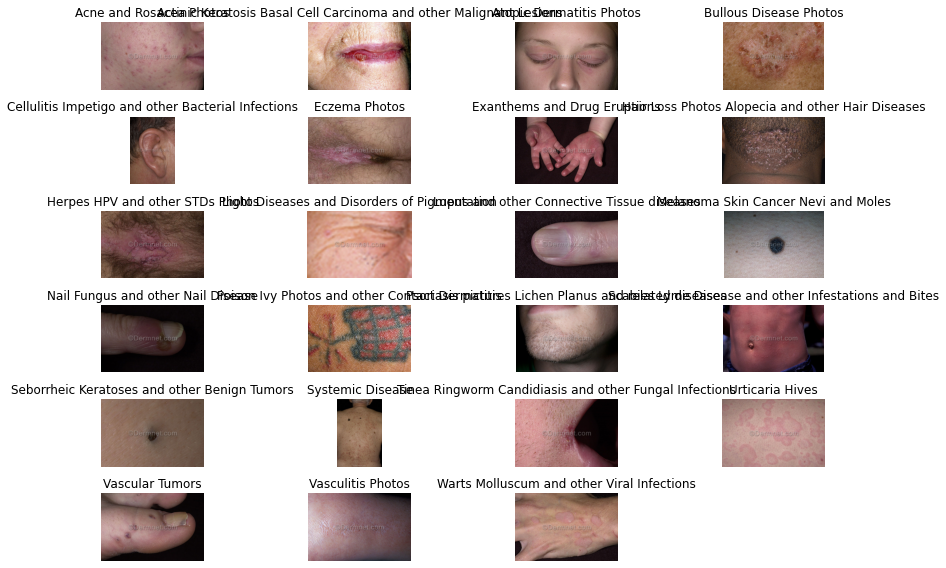

In [40]:
# Calculate the number of rows and columns dynamically based on the number of unique labels
num_labels = len(df['label'].unique())
num_rows = math.ceil(num_labels / 4)
num_cols = min(num_labels, 4)

# Sample image visualization
plt.figure(figsize=(12, 8))
for i, class_label in enumerate(df['label'].unique()):
    sample_image_path = df[df['label'] == class_label]['image_path'].iloc[0]
    sample_image = Image.open(sample_image_path)
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(sample_image)
    plt.title(class_label)
    plt.axis('off')
plt.tight_layout()
plt.show()

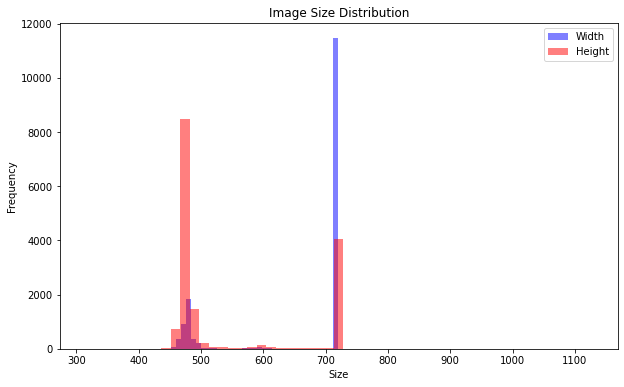

In [30]:
# Image size distribution
image_sizes = []
for image_path in df['image_path']:
    with Image.open(image_path) as img:
        width, height = img.size
        image_sizes.append((width, height))
image_widths, image_heights = zip(*image_sizes)
plt.figure(figsize=(10, 6))
plt.hist(image_widths, bins=50, alpha=0.5, color='blue', label='Width')
plt.hist(image_heights, bins=50, alpha=0.5, color='red', label='Height')
plt.title('Image Size Distribution')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.legend()
plt.show()

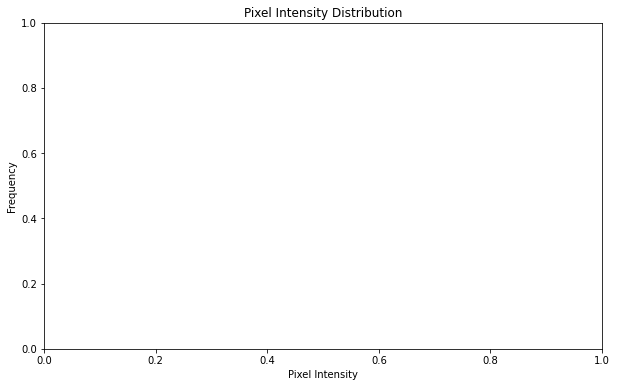

In [51]:
# Image pixel intensity distribution (for grayscale images)
plt.figure(figsize=(10, 6))
for image_path in df['image_path'].sample(100):
    with Image.open(image_path) as img:
        if img.mode == 'L':  # Check if the image is grayscale
            img_rgb = img.convert('RGB')  # Convert grayscale to RGB
            pixel_values = list(img_rgb.getdata())  # Get pixel values from the converted RGB image
            # Plot histogram
            plt.hist(pixel_values, bins=256, color='black', alpha=0.5)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

    Check class distribution: You can visualize the distribution of classes to ensure that your dataset is balanced or identify any class imbalances.
    
    Sample image visualization: Display a few sample images from each class to get a visual understanding of the data.
    
    Image size distribution: Check the distribution of image sizes (height and width) to understand the variability in your dataset. 
    
    Image pixel intensity distribution: Visualize the distribution of pixel intensities to understand the range of values in your images.
    
        Image augmentation visualization: Visualize a few examples of augmented images to understand how data augmentation techniques (such as rotation, zoom, etc.) affect the appearance of images.

    Color channel distribution: For color images, visualize the distribution of pixel intensities for each color channel (red, green, blue) to understand the color distribution in your dataset.

    Image aspect ratio distribution: Check the distribution of aspect ratios (width/height) of images to understand the aspect ratio variability.

    Correlation between image properties and labels: Explore whether there's any correlation between certain image properties (e.g., size, aspect ratio) and the corresponding labels.

In [34]:
# Image augmentation visualization (assuming you're using ImageDataGenerator)
plt.figure(figsize=(12, 8))
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

<Figure size 864x576 with 0 Axes>

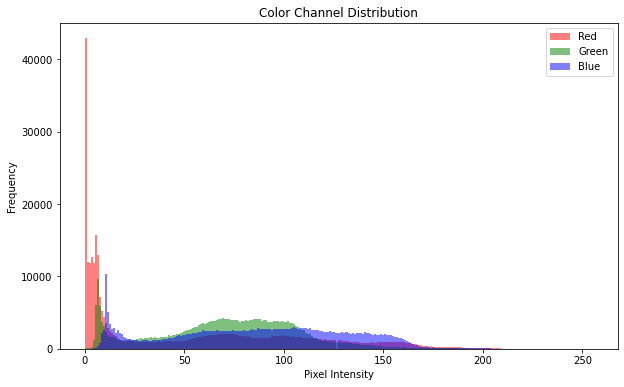

In [36]:
# Color channel distribution
plt.figure(figsize=(10, 6))
for image_path in df['image_path'].sample(100):
    with Image.open(image_path) as img:
        if img.mode == 'RGB':  # Check if the image is RGB
            r, g, b = img.split()
            r_vals = list(r.getdata())
            g_vals = list(g.getdata())
            b_vals = list(b.getdata())
            plt.hist(r_vals, bins=256, color='red', alpha=0.5, label='Red')
            plt.hist(g_vals, bins=256, color='green', alpha=0.5, label='Green')
            plt.hist(b_vals, bins=256, color='blue', alpha=0.5, label='Blue')
            break  # Display color channel distribution for only one image
plt.title('Color Channel Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()


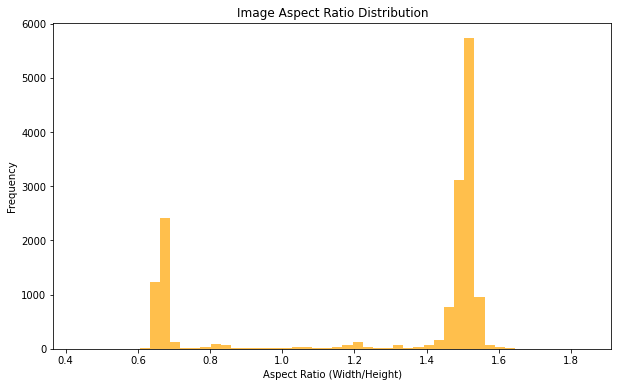

In [37]:
# Image aspect ratio distribution
aspect_ratios = [width / height for width, height in image_sizes]
plt.figure(figsize=(10, 6))
plt.hist(aspect_ratios, bins=50, color='orange', alpha=0.7)
plt.title('Image Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio (Width/Height)')
plt.ylabel('Frequency')
plt.show()

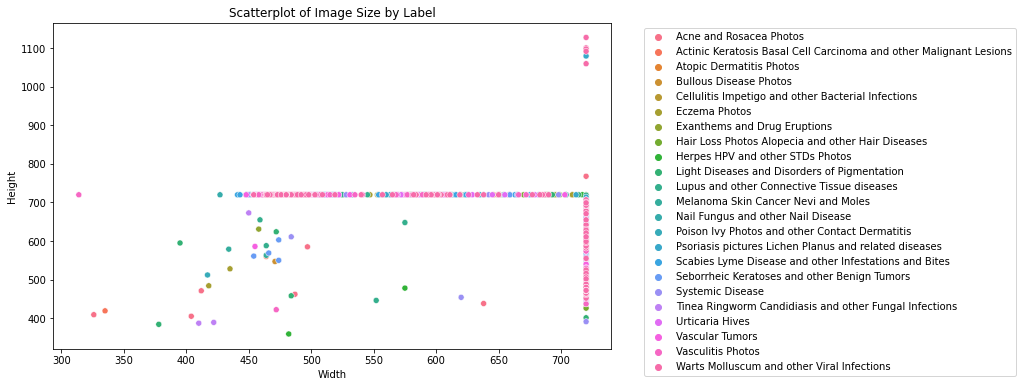

In [38]:
# Correlation between image properties and labels (e.g., size and label)
df['width'], df['height'] = zip(*image_sizes)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='width', y='height', hue='label')
plt.title('Scatterplot of Image Size by Label')
plt.xlabel('Width')
plt.ylabel('Height')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

    Check class distribution:
        Insights: By visualizing the distribution of skin disease classes, you can identify whether certain diseases are overrepresented or underrepresented in the dataset. This insight is crucial for understanding the dataset's balance and ensuring that the model is trained on a representative sample of all disease types.
        Implications: Class imbalances can lead to biased model predictions, where the model performs well on dominant classes but poorly on minority classes. Addressing imbalances through techniques like oversampling, undersampling, or class weighting can help mitigate this issue and improve model performance.

    Sample image visualization:
        Insights: Examining sample images from each skin disease class allows for qualitative assessment of the dataset's diversity and complexity. You can observe variations in lesion appearance, size, texture, and location across different diseases.
        Implications: Understanding the visual characteristics of each disease type helps in building intuition about the challenges faced by the model during classification. It also assists in identifying potential mislabeled or ambiguous images that may require further investigation or manual verification.

    Image size distribution:
        Insights: Analyzing the distribution of image sizes (width and height) provides insights into the variability of lesion sizes within the dataset. It helps identify whether there are consistent size patterns or if lesion sizes vary widely across different diseases.
        Implications: Standardizing image sizes is important for ensuring consistency in model inputs. If there is significant variability in image sizes, resizing or cropping techniques may be necessary to normalize inputs and facilitate model training.

    Image pixel intensity distribution:
        Insights: Examining the distribution of pixel intensities across images reveals information about the overall brightness, contrast, and color distribution within the dataset. It helps identify potential outliers or anomalies in pixel values.
        Implications: Understanding pixel intensity distributions guides preprocessing steps such as normalization or histogram equalization, which can enhance model performance by standardizing pixel values across images and improving contrast.

    Image augmentation visualization:
        Insights: Visualizing augmented images demonstrates how data augmentation techniques alter the appearance of skin disease images. It allows assessment of the effectiveness of augmentation strategies in increasing dataset diversity and model robustness.
        Implications: Augmentation techniques like rotation, flipping, and zooming help improve model generalization by exposing it to variations in image appearance. Effective augmentation strategies can reduce overfitting and improve model performance on unseen data.

    Color channel distribution:
        Insights: Analyzing the distribution of pixel intensities across color channels (red, green, blue) reveals insights into the color composition and variations in skin disease images.
        Implications: Understanding color channel distributions helps in identifying color-related characteristics specific to certain diseases. It guides preprocessing steps such as color normalization or channel-wise augmentation, which can enhance model sensitivity to color-based features.

    Image aspect ratio distribution:
        Insights: Exploring the distribution of aspect ratios provides insights into how images are proportioned within the dataset. It helps identify trends or patterns related to image aspect ratios and their association with specific skin disease categories.
        Implications: Aspect ratio distributions inform decisions regarding image resizing or cropping techniques. Standardizing aspect ratios ensures consistency in model inputs and helps preserve important spatial information in images.

    Correlation between image properties and labels:
        Insights: Investigating the relationship between image properties (e.g., size, aspect ratio) and skin disease labels reveals whether certain diseases exhibit characteristic image properties. It helps identify potential correlations between image features and disease types.
        Implications: Understanding these correlations assists in feature selection and model design. Features that are highly correlated with disease labels can be prioritized during model training, leading to more accurate and interpretable classification results.

By conducting detailed EDA on the skin disease image dataset, you gain valuable insights that inform various aspects of model development, from data preprocessing and augmentation to model architecture design and training strategies. These insights enable you to build robust and effective skin disease classification models that generalize well to unseen data.


## Data Preprocessing

In [ ]:
# ImageDataGenerator is used to perform real-time data augmentation and preprocessing.
# For training data (train_datagen), we apply various augmentation techniques such as rotation,
# width and height shifting, shear, zoom, and horizontal flipping to increase dataset diversity.
# For validation data (validation_datagen), we only rescale pixel values to match the range [0, 1].
# flow_from_directory method is used to generate batches of augmented data from the directory structure.

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters for image preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Rescale pixel values to [0, 1]
    rotation_range=20,          # Randomly rotate images by 20 degrees
    width_shift_range=0.2,      # Randomly shift images horizontally by 20% of the width
    height_shift_range=0.2,     # Randomly shift images vertically by 20% of the height
    shear_range=0.2,            # Shear intensity (shear angle in radians)
    zoom_range=0.2,             # Randomly zoom images by 20%
    horizontal_flip=True,       # Randomly flip images horizontally
    fill_mode='nearest')        # Fill mode for filling in newly created pixels

validation_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale validation data

# Define batch size and image dimensions
batch_size = 32
img_height = 224
img_width = 224

# Generate batches of augmented data
train_generator = train_datagen.flow_from_directory(
    root_dir,  # Path to training data directory
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    test_dir,  # Path to validation data directory
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 15557 images belonging to 23 classes.
Found 4002 images belonging to 23 classes.


## Model building
This CNN model consists of convolutional layers followed by max-pooling layers for feature extraction and downsampling, followed by dense (fully connected) layers for classification. Here's a breakdown of the architecture:

    Convolutional Layers: These layers apply a set of filters to the input image to extract features such as edges, textures, and patterns. Increasing the number of filters allows the model to learn more complex features.

    MaxPooling Layers: Max-pooling layers downsample the feature maps generated by the convolutional layers, reducing the spatial dimensions and extracting the most important features.

    Flatten Layer: This layer flattens the output of the last convolutional layer into a 1D vector, preparing it for input into the dense layers.

    Dense Layers: Dense layers perform classification based on the features extracted by the convolutional layers. The number of neurons in the output layer corresponds to the number of classes in the dataset, and the softmax activation function ensures that the output represents class probabilities.

In [24]:
train_img=preprocess_input(x_train)
test_img=preprocess_input(x_test)

## New Model

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, \
                             accuracy_score)
import cv2

In [3]:
train_data_gen  = ImageDataGenerator(
                                    rescale=1 / 255.0,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    validation_split=0.2,
                                    fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale=1 / 255.0)

In [18]:
batch_size = 8
train_generator = train_data_gen.flow_from_dataframe(
    dataframe=df,
    x_col="image_path",
    y_col="label",
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode="categorical",#sparse
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_data_gen.flow_from_dataframe(
    dataframe=df,
    x_col="image_path",
    y_col="label",
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode="categorical", #sparse
    subset='validation',
    shuffle=True,
    seed=42 
)
test_generator = test_data_gen.flow_from_dataframe(
    dataframe=df_test,
    x_col="image_path",
    y_col="label",
    target_size=(256, 256),
    batch_size=1,
    class_mode='categorical',
    shuffle=False,
)

Found 12446 validated image filenames belonging to 23 classes.
Found 3111 validated image filenames belonging to 23 classes.
Found 4002 validated image filenames belonging to 23 classes.


In [24]:
# VGG16 with Input shape of our Images
# Include Top is set to false to allow us to add more layers

res = VGG16(weights ='imagenet', include_top = False, 
               input_shape = (256, 256, 3)) 
               
# Setting the trainable to false
res.trainable = False


x= res.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
# x = Dropout(0.5)(x) 
x = Dense(512, activation ='relu')(x)
x = BatchNormalization()(x)
# x = Dropout(0.5)(x)

x = Dense(256, activation ='relu')(x)
x = BatchNormalization()(x)

x = Dense(23, activation ='softmax')(x)
model = Model(res.input, x)

model.compile(optimizer =tf.keras.optimizers.RMSprop(learning_rate=0.0001),  #'Adam'
              loss ="categorical_crossentropy",  #sparse_categorical_crossentropy
              metrics =["categorical_accuracy"])  #sparse_categorical_accuracy

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [25]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [26]:
custom_early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    min_delta=0.001, 
    mode='min'
)

In [29]:


history = model.fit(train_generator, 
                    epochs=30, 
                    validation_data=valid_generator)



Epoch 1/30
1556/1556 [==============================] - 2015s 1s/step - loss: 2.1835 - categorical_accuracy: 0.3297 - val_loss: 10.8660 - val_categorical_accuracy: 3.2144e-04
Epoch 2/30
1556/1556 [==============================] - 1906s 1s/step - loss: 2.2023 - categorical_accuracy: 0.3223 - val_loss: 10.6350 - val_categorical_accuracy: 0.0019
Epoch 3/30
1556/1556 [==============================] - 1927s 1s/step - loss: 2.1950 - categorical_accuracy: 0.3179 - val_loss: 10.7756 - val_categorical_accuracy: 0.0026
Epoch 4/30
1556/1556 [==============================] - 1966s 1s/step - loss: 2.1871 - categorical_accuracy: 0.3246 - val_loss: 10.8646 - val_categorical_accuracy: 0.0035
Epoch 5/30
1556/1556 [==============================] - 1950s 1s/step - loss: 2.1713 - categorical_accuracy: 0.3311 - val_loss: 11.0375 - val_categorical_accuracy: 0.0042
Epoch 6/30
1556/1556 [==============================] - 1969s 1s/step - loss: 2.1642 - categorical_accuracy: 0.3287 - val_loss: 10.7382 - val

In [30]:
model.save('model2Vgg16added.keras')

In [19]:
from tensorflow.keras.models import load_model
ModelVgg=load_model('model2Vgg16added.keras')

In [20]:
#plot accuracy vs epoch
plt.plot(history.history['categorical_accuracy']) #sparse_categorical_accuracy
plt.plot(history.history['val_categorical_accuracy']) #val_sparse_categorical_accuracy
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

4002/4002 [==============================] - 591s 147ms/step


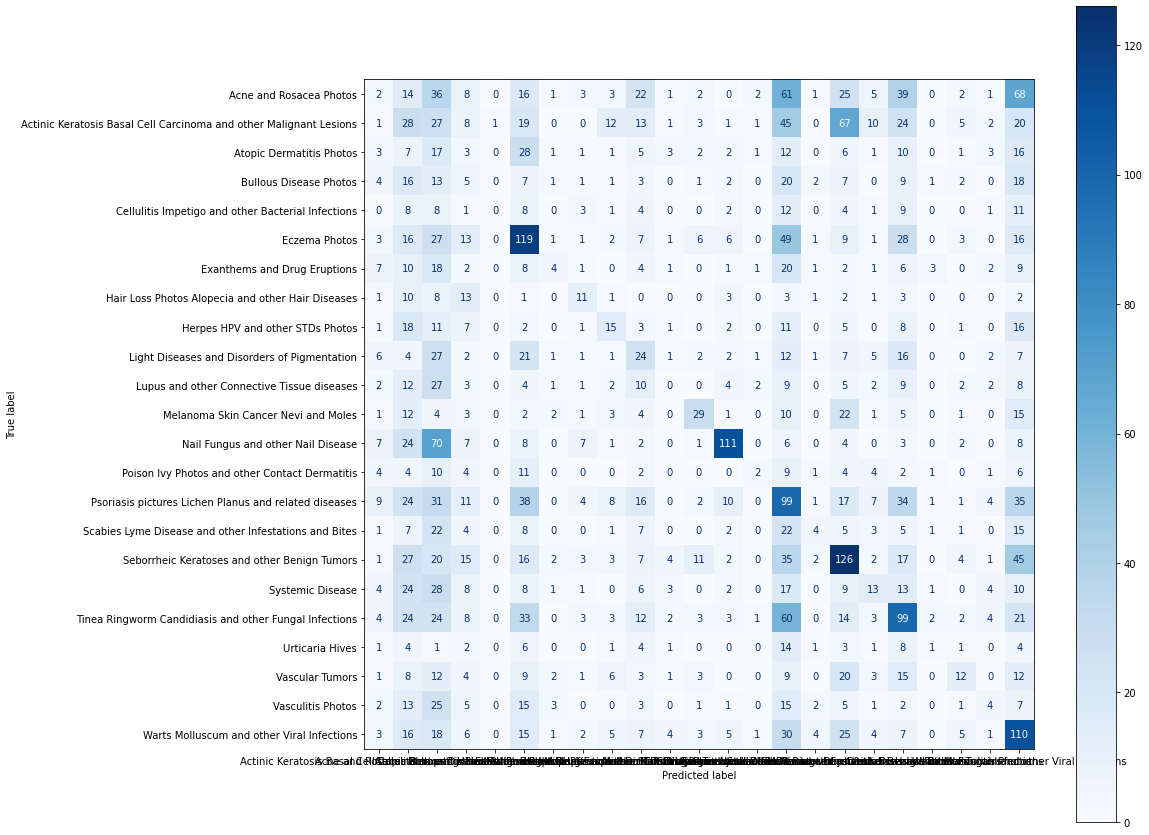

In [25]:
test_true=test_generator.classes
test_pred_raw = ModelVgg.predict(test_generator)
test_pred = np.argmax(test_pred_raw, axis=1)

cm = confusion_matrix(test_true, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train2)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.show()

In [24]:
result = ModelVgg.evaluate(test_generator,batch_size=32)
print("test_loss, test accuracy",result)

4002/4002 [==============================] - 624s 156ms/step - loss: 8.2257 - categorical_accuracy: 0.2086
test_loss, test accuracy [8.225676536560059, 0.20864567160606384]
